In [1]:
# Run this cell for the rest of the notebook to work. You don't need to understand its content at this point

import numpy as np
npstring = np.dtypes.StringDType()
import pandas
pandas.set_option('display.max_rows', 30)
np.set_printoptions(threshold=50)

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# Pour éviter les problèmes de chemin de ficher
import os
notebook_path = os.path.abspath('')

path_data = os.path.join('.', 'assets', 'data')

# Pour télécharger les données et les images du notebook
!curl -O https://amubox.univ-amu.fr/s/NFHRSGQpZnp6zwF/download/data_CM2.zip

!unzip -o data_CM2.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  344k  100  344k    0     0   728k      0 --:--:-- --:--:-- --:--:--  727k
Archive:  data_CM2.zip
  inflating: assets/data/united_summer2015.csv  
  inflating: assets/data/actors.csv  
  inflating: assets/data/baby.csv    
  inflating: assets/data/bta.csv     
  inflating: assets/data/observed_outcomes.csv  
  inflating: assets/data/deflategate.csv  
  inflating: assets/data/top_movies_2017.csv  
  inflating: images/causality1.png   
  inflating: images/causality2.png   
  inflating: images/causalité_et_démarche_scientifique.jpg  


# Cours 2 : « Causalité et démarche scientifique »

Sommaire

1. Causalité et expériences
2. Hasard et simulations
3. (optionnel) Probabilités
4. Echantillonnage et distributions empiriques
5. Test d'hypothèses : premier contact
6. (optionnel) Test d'hypothèses : test par permutation sur la base de deux échantillons

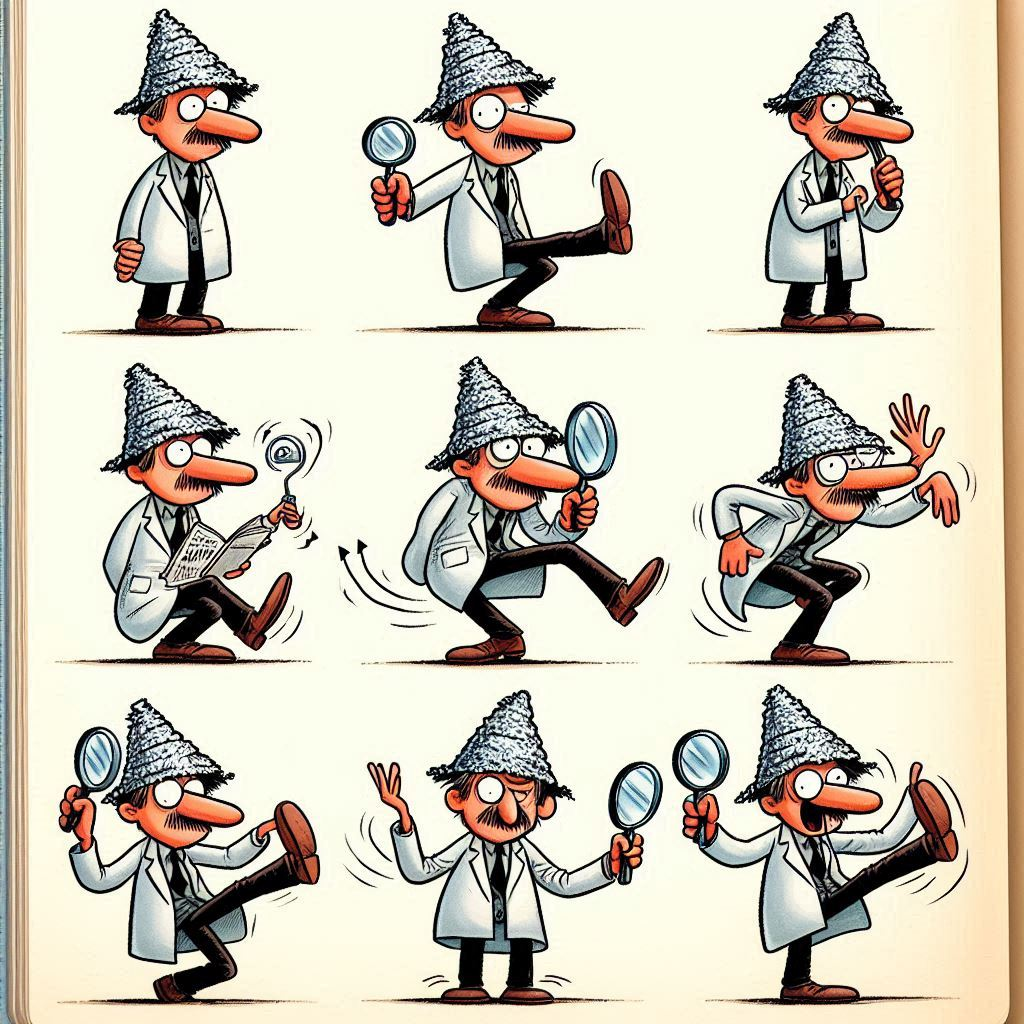

In [2]:
from IPython.display import Image
Image(filename=notebook_path + '/images/causalité_et_démarche_scientifique.jpg', width=500)

(Image générée avec DALL.E 3)

## 1. Causalité et expériences

*« Ces problèmes sont, et resteront probablement toujours, parmi les secrets impénétrables de la nature. Ils appartiennent à une classe de questions radicalement inaccessibles à l'intelligence humaine. »*—The Times of London, septembre 1849, sur la façon dont le choléra se contracte et se propage (traduit par deepl.com).

La peine de mort a-t-elle un effet dissuasif ? Le chocolat est-il bon pour la santé ? Qu'est-ce qui
cause le cancer du sein ?

Toutes ces questions tentent d'attribuer une cause à un effet. Un examen
examen minutieux des données peut contribuer à éclaircir ce type de questions. Dans cette section
vous apprendrez certains des concepts fondamentaux impliqués dans l'établissement de la
causalité.

L'observation est la clé d'une bonne science. Une *étude observationnelle* est une étude dans laquelle les scientifiques tirent des conclusions basées sur des données qu'ils ont observées mais qu'ils n'ont pas contribué à générer. Dans la science des données, de nombreuses études de ce type impliquent des observations sur un groupe d'individus, un facteur d'intérêt appelé *traitement*. et un *résultat* mesuré sur chaque individu.

Il est plus facile de considérer les individus comme des personnes. Dans une étude visant à déterminer si
si le chocolat est bon pour la santé, les individus seraient en effet des personnes, le traitement serait de manger du chocolat et le résultat serait mesuré sur chaque individu.
Le traitement consisterait à manger du chocolat et le résultat pourrait être une mesure des maladies cardiaques. Mais dans les études observationnelles, les individus ne sont pas nécessairement des personnes.
Dans une étude visant à déterminer si la peine de mort a un effet dissuasif, les individus pourraient être les 50 États des États-Unis. La loi d'un État autorisant la peine de mort serait le traitement, et le résultat pourrait être le taux d'homicide de l'État.

La question fondamentale est de savoir si le traitement a un effet sur le résultat.
Toute relation entre le traitement et le résultat est appelée *association*.
Si le traitement provoque l'apparition du résultat, l'association est *causale*.
La *causalité* est au cœur des trois questions posées au début de cette
section. Par exemple, l'une des questions était de savoir si le chocolat provoque directement
l'amélioration de la santé, et pas seulement s'il existe une relation entre le chocolat et la santé.

L'établissement de la causalité se fait souvent en deux étapes. Tout d'abord, une
association est observée. Ensuite, une analyse plus approfondie permet de décider de la causalité.

### Observation et visualisation : John Snow et la pompe de Broad Street

L'un des exemples les plus frappants d'observation astucieuse aboutissant à l'établissement d'une causalité remonte à plus de 150 ans.
l'établissement d'un lien de causalité remonte à plus de 150 ans. Pour vous mettre dans l'ambiance, essayez d'imaginer Londres dans les années 1850.
 C'est la ville la plus riche du monde, mais beaucoup de ses habitants sont désespérément pauvres. Charles Dickens,
alors au sommet de sa gloire, écrivait sur leur sort. La maladie sévit
dans les quartiers pauvres de la ville, et le choléra était l'une des maladies les plus redoutées.
On ne savait pas encore que les germes étaient à l'origine des maladies ; la théorie la plus répandue était celle des 'miasmes'.
Les miasmes se manifestent par de mauvaises odeurs, et l'on pensait qu'il s'agissait de particules toxiques invisibles provenant de matières en décomposition.
Certains quartiers de Londres sentaient effectivement très mauvais, surtout par temps chaud.
Pour se protéger des infections, ceux qui en avaient les moyens portaient des
à leur nez des objets à l'odeur agréable.

Depuis plusieurs années, un médecin du nom de John Snow suivait les vagues dévastatrices de choléra qui frappaient l'Angleterre. La maladie
arrivait soudainement et était presque immédiatement mortelle : les gens mouraient en un jour ou deux après l'avoir contractée, des centaines de personnes pouvaient mourir en une semaine, et le nombre total de morts au cours d'une seule vague pouvait atteindre des dizaines de milliers de personnes. Snow était sceptique quant à la théorie des miasmes. Il avait remarqué que si des foyers entiers étaient décimés par le choléra,
les habitants des maisons voisines restaient parfois totalement indemnes.
Comme ils respiraient le même air - et les mêmes miasmes - que leurs voisins, il n'y avait pas de lien évident entre les mauvaises odeurs et l'incidence du choléra.

Snow avait également remarqué que l'apparition de la maladie s'accompagnait presque toujours de vomissements et de diarrhées. Il pensait donc que l'infection était transmise par
quelque chose que les gens mangeaient ou buvaient, et non par l'air qu'ils respiraient. Son principal était l'eau contaminée par les égouts.

Fin août 1854, le choléra a frappé dans le quartier surpeuplé de Soho à
Londres. Au fur et à mesure que les décès s'accumulaient, Snow les a enregistrés avec diligence, en utilisant une méthode qui est devenue la norme dans l'étude de la propagation des maladies : *il a dessiné une
carte*. Sur un plan des rues du quartier, il note l'emplacement de chaque décès.

Voici la carte originale de Snow. Chaque barre noire représente un décès. Lorsqu'il y a plusieurs décès à la même adresse, les barres correspondant à ces décès sont empilées les unes sur les autres. Les disques noirs indiquent l'emplacement des pompes à eau. La carte fait apparaître une révélation frappante : les décès sont grossièrement regroupés autour de la pompe de Broad Street.
![Carte du choléra de Snow](images/snow_map.jpg)

Snow étudie attentivement sa carte et examine les anomalies apparentes.
Toutes impliquent la pompe de Broad Street. Par exemple :
- Il y a eu des décès dans des maisons qui étaient plus proches de la pompe de Rupert Street que de celle de Broad Street.
  Bien que la pompe de la rue Rupert soit plus proche à vol d'oiseau,
  moins facile d'accès à cause des impasses et de la disposition des rues.
  Les habitants de ces maisons utilisaient donc la pompe de Broad Street.
- Il n'y a pas eu de décès dans les deux pâtés de maisons situés à l'est de la pompe. C'était
  l'emplacement de la brasserie Lion, où les ouvriers buvaient ce qu'ils brassaient.
  S'ils voulaient de l'eau, la brasserie avait son propre puits.
- Il y a eu des décès dispersés dans des maisons situées à plusieurs pâtés de maisons de la pompe de Broad Street.
  Il s'agissait d'enfants qui buvaient l'eau de la pompe de Broad Street sur le chemin de l'école.
  L'eau de la pompe était réputée fraîche et rafraîchissante.

Le dernier élément de preuve à l'appui de la théorie de Snow a été fourni par deux
décès isolés dans le quartier verdoyant et cossu de Hampstead, assez loin de Soho.
Ces décès laissèrent Snow perplexe jusqu'à ce qu'il apprenne qu'il s'agissait de Mme Susannah Eley, qui avait vécu à Broad Street, et sa nièce. Mme Eley se faisait livrer de l'eau
de la pompe de Broad Street lui était livrée à Hampstead tous les jours. Elle aimait son goût.

Plus tard, on découvrit qu'une fosse d'aisance située à quelques mètres du puits de la pompe de Broad Street s'écoulait dans le puits. Ainsi, l'eau de la pompe était contaminée par les eaux usées des maisons des victimes du choléra.

Snow utilisa sa carte pour convaincre les autorités locales d'enlever la poignée de la pompe de Broad Street.
Broad Street. Bien que l'épidémie de choléra soit déjà sur le déclin lorsqu'il l'a fait, il est possible que la mise hors service de la pompe ait eu un effet positif sur la santé des habitants.
Il est possible que la mise hors service de la pompe ait permis d'éviter de nombreux décès dus à de futures vagues de la maladie.

L'enlèvement de la poignée de la pompe de Broad Street est entré dans la légende. Au
aux Centers for Disease Control (CDC) d'Atlanta, lorsque les scientifiques cherchent des
des réponses simples à des questions sur les épidémies, ils se posent parfois la question entre eux,
'Où est la poignée de cette pompe ?'

La carte de M. Snow est l'une des premières et des plus puissantes utilisations de la visualisation de données.
Les cartes des maladies de toutes sortes sont désormais un outil standard pour le suivi des épidémies.

## Vers la causalité

Bien que la carte ait donné à Snow une forte indication que la propreté de l'eau était la clé de la lutte contre le choléra, il était encore loin
d'un argument scientifique convaincant selon lequel l'eau contaminée était à l'origine de la propagation de la maladie.
Pour présenter un argument plus convaincant, il a dû utiliser la méthode de la
*comparaison*.

Les scientifiques utilisent la comparaison pour identifier une association entre un traitement et un résultat. Ils comparent les résultats d'un groupe d'individus ayant reçu le traitement (le *groupe traitement*) aux résultats d'un groupe qui n'en a pas bénéficié (le *groupe contrôle* ou *groupe témoin*). Par exemple, les chercheurs d'aujourd'hui pourraient comparer le
le taux moyen de meurtres dans les États qui appliquent la peine de mort et le taux moyen de meurtres dans les États qui ne l'appliquent pas.

Si les résultats sont différents, cela prouve l'existence d'une association.
Pour déterminer le lien de causalité, cependant, il faut être encore plus prudent.


### La 'grande expérience' de Snow

Encouragé par ce qu'il avait appris à Soho, Snow a réalisé une analyse plus approfondie. Depuis un certain temps, il recueillait des données sur les décès dus au choléra dans un quartier de Londres desservi par deux compagnies des eaux.
La compagnie des eaux de Lambeth puisait son eau en amont, là où les eaux usées étaient déversées dans la Tamise. Son eau était relativement propre. En revanche, la compagnie Southwark and Vauxhall
(S&V) puisait son eau en dessous du point de rejet des eaux usées, et son approvisionnement était donc contaminé.

La carte ci-dessous montre les zones desservies par les deux compagnies. Snow s'est concentré sur la région où les deux zones de service se chevauchent.
![Autre carte de Snow](images/snow_map2.jpg)

Snow a remarqué qu'il n'y avait pas de différence systématique entre les personnes qui étaient
fournies par S&V et celles fournies par Lambeth. 'Chaque société approvisionne à la fois les riches et les pauvres, les grandes maisons et les petites ; il n'y a aucune différence dans les maisons ou les personnes qui reçoivent l'eau des deux compagnies d'eau, ni dans les conditions physiques qui les entourent...'

La seule différence se situe au niveau de l'approvisionnement en eau, 'un groupe étant alimenté par de l'eau contenant les eaux usées de Londres et, parmi elles, tout ce qui pouvait provenir des malades du choléra, l'autre groupe ayant de l'eau tout à fait exempte d'impureté.'.

Confiant dans sa capacité à parvenir à une conclusion claire, Snow a résumé ses données dans le tableau ci-dessous.

| Zone de ravitaillement | Nombre de maisons | Décès dus au choléra | Décès pour 10 000 maisons |   
|:----------------------:|:-----------------:|:--------------------:|:------------------------:|
| S&V                    | 40 046            | 1 263                | 315                      |   
| Lambeth                | 26 107            | 98                   | 37                       |   
| Reste de Londres      | 256 423           | 1 422                | 59                       |   


Les chiffres accusent S&V. Le taux de mortalité dû au choléra dans les maisons de S&V
était presque dix fois supérieur à celui des maisons desservies par Lambeth.


### Établissement de la causalité

Dans la terminologie développée plus tôt dans la section, vous pouvez considérer les personnes dans les maisons S&V comme le groupe traitement, et celles dans les maisons Lambeth comme le groupe contrôle.
Un élément crucial de l'analyse de Snow était que les deux groupes étaient comparables l'un à l'autre, à l'exception du traitement.

Afin de déterminer si l'approvisionnement en eau était à l'origine du choléra,
Snow a dû comparer deux groupes qui se ressemblaient sur tous les points, sauf un, leur approvisionnement en eau.
Ce n'est qu'à cette condition qu'il a été en mesure d'attribuer les différences de résultats à l'approvisionnement en eau.
Si les deux groupes avaient été différents sur
d'autres aspects, il aurait été difficile d'accuser l'approvisionnement en eau d'être à l'origine de la maladie.
Par exemple, si le groupe traitement
avait été composé d'ouvriers d'usine, mais pas le groupe contrôle, les différences entre les résultats des deux groupes auraient pu être dues à l'approvisionnement en eau, ou au travail en usine, ou aux deux. Le tableau final aurait été beaucoup plus flou.

L'idée brillante de Snow a consisté à identifier deux groupes qui rendraient sa comparaison claire. Il avait entrepris d'établir une relation de cause à effet entre l'eau contaminée et l'infection par le choléra, et il y est parvenu dans une large mesure, même si les partisans de la théorie des miasmes l'ont ignoré et même ridiculisé. Bien entendu, Snow ne comprenait pas
le mécanisme détaillé par lequel les humains contractent le choléra. Cette découverte a été faite
en 1883, lorsque le scientifique allemand Robert Koch a isolé le *Vibrio cholerae*,
la bactérie qui pénètre dans l'intestin grêle humain et provoque le choléra.

En fait, le *Vibrio cholerae* avait été identifié en 1854 par Filippo Pacini en
Italie, à peu près au moment où Snow analysait ses données à Londres. En raison de la
dominance des partisans de la théorie des miasmes en Italie, la découverte de Pacini est restée inconnue.
Mais à la fin du XIXe siècle, la brigade des miasmes battait en retraite.
L'histoire ultérieure a donné raison à Pacini et à John Snow. Les méthodes de Snow ont conduit au développement du domaine de *l'épidémiologie*, qui est l'étude de la propagation des maladies.

**Facteurs confondants**

Revenons maintenant à des temps plus modernes, riches d'une leçon importante que nous avons apprise en cours de route :

**Dans une étude observationnelle, si le groupe traitement et le groupe contrôle diffèrent d'une manière autre que le traitement, il est difficile de tirer des conclusions sur la causalité.**.

Une différence sous-jacente entre les deux groupes (autre que le traitement) est
est appelée *facteur confondant*, car elle peut créer de la confusion (c'est-à-dire qu'elle vous perturbe) lorsque vous essayez de parvenir à une conclusion.

**Exemple : Café et cancer du poumon.**
Des études menées dans les années 1960 ont montré que les buveurs de café présentaient des taux de cancer du poumon plus élevés que ceux qui ne buvaient pas de café.
Pour cette raison, certaines personnes ont identifié le café à une cause de cancer du poumon. Or, le café n'est pas à l'origine du cancer du poumon. L'analyse contenait un facteur confondant : le tabagisme. À l'époque, les buveurs de café étaient également susceptibles d'être des fumeurs,
et le tabagisme est à l'origine du cancer du poumon. La consommation de café était associée au cancer du poumon, mais elle n'est pas à l'origine de la maladie.

Les facteurs confondants sont fréquents dans les études observationnelles.
Les bonnes études prennent grand soin de réduire les facteurs de confondants et de tenir compte de leurs effets.

### Randomisation

Un excellent moyen d'éviter les confusions est de répartir les individus dans les groupes traitement et contrôle *au hasard*, puis d'administrer le traitement à ceux qui ont été assignés au groupe traitement. La randomisation permet aux deux groupes de rester similaires
en dehors du traitement.

Si vous êtes en mesure de répartir les individus de manière aléatoire dans les groupes de traitement et de contrôle, vous réalisez une *expérience aléatoire contrôlée*, également connue sous le nom d'*essai contrôlé randomisé* (ECR). Parfois, les réponses des personnes dans une
expérience sont influencées par le fait qu'ils savent dans quel groupe ils se trouvent. Il peut donc être utile de réaliser une expérience en *aveugle* dans laquelle les individus ne savent pas s'ils font partie du groupe traitement ou du groupe contrôle.
Pour que cela fonctionne, vous devrez donner au groupe contrôle un *placebo*, c'est-à-dire quelque chose qui ressemble
exactement au traitement, mais qui n'a en fait aucun effet.

Les expériences aléatoires contrôlées sont depuis longtemps une référence dans le domaine
médical, par exemple pour déterminer si un nouveau médicament est efficace.
Elles sont également de plus en plus utilisées dans d'autres domaines tels que l'économie.

**Exemple :**
Dans les villages mexicains des années 1990, les enfants des familles pauvres n'étaient souvent pas scolarisés. L'une des raisons était que les enfants plus âgés pouvaient aller travailler et ainsi contribuer à la survie de la famille.
Santiago Levy, ministre du ministère mexicain des finances, a entrepris de déterminer si les programmes d'aide sociale pouvaient être utilisés pour améliorer le taux de scolarisation et améliorer les conditions de santé des enfants. Il a mené un essai contrôlé randomisé sur un ensemble de villages, en sélectionnant certains d'entre eux au hasard pour qu'ils bénéficient d'un nouveau programme d'aide sociale appelé
PROGRESA. Ce programme donnait de l'argent aux familles pauvres si leurs enfants allaient régulièrement à l'école et si la famille avait recours à des soins de santé préventifs.
Plus d'argent était donné si les enfants allaient à l'école secondaire plutôt qu'à l'école primaire, afin de compenser la perte de salaire des enfants, et plus d'argent était donné pour les filles scolarisées que pour les garçons.
Les villages restants n'ont pas bénéficié de ce traitement et ont constitué le groupe contrôle. Grâce à la randomisation, il n'y a pas eu de
de confusion et il a été possible d'établir que PROGRESA a augmenté le taux de scolarisation. Pour les garçons, il est passé de 73 % dans le groupe contrôle à 77 % dans le groupe PROGRESA. Pour les filles, l'augmentation a été encore plus importante, passant de
de 67 % dans le groupe contrôle à près de 75 % dans le groupe PROGRESA. En raison du
succès de cette expérience, le gouvernement mexicain a soutenu le programme
sous le nouveau nom d'OPORTUNIDADES, en tant qu'investissement pour aller vers une population en bonne santé et éduquée.

**Avantages de la randomisation**

Selon la terminologie que nous avons développée, John Snow a mené une
une étude observationnelle, et non une expérience randomisée. Mais il a qualifié son étude de 'grande expérience' car, comme il l'a écrit, 'pas moins de trois cent mille
personnes ... ont été divisées en deux groupes sans qu'elles choisissent leur groupe, et, dans la plupart des cas, à leur insu...'

Des études comme celle de Snow sont parfois appelées 'expériences naturelles'.
Cependant, une véritable randomisation ne signifie pas simplement que les groupes traitement et contrôle sont sélectionnés 'sans qu'elles choisissent leur groupe'. La randomisation doit être effectuée avec beaucoup de soin,
en suivant les lois de la probabilité.

La méthode de randomisation peut être aussi simple que de tirer à pile ou face.
Elle peut aussi être beaucoup plus complexe. Mais chaque méthode de randomisation consiste en une
séquence d'étapes soigneusement définies qui permettent de spécifier mathématiquement les chances de chaque résultat. Cela a deux conséquences importantes.

1. Elle nous permet de tenir compte - mathématiquement - de la possibilité que la randomisation produise des groupes traitement et contrôle très différents l'un de l'autre.

2. Elle nous permet de faire des déclarations mathématiques précises sur les différences entre les groupes traitement et les groupes contrôle. Cela nous aide à tirer des conclusions justifiables sur l'effet du traitement.


**Et si vous ne pouvez pas faire de randomisation ?**

Dans certaines situations, il peut s'avérer impossible de réaliser une expérience
contrôlée randomisée, même lorsque l'objectif est d'étudier la causalité. Par exemple, supposons que
vous voulez étudier les effets de la consommation d'alcool pendant la grossesse et que vous
et que vous affectiez au hasard certaines femmes enceintes à votre groupe 'alcool'.
Vous ne devez pas vous attendre à ce qu'elles coopèrent si vous voulez leur faire boire de l'alcool pendant la grossesse.
Dans de telles situations, vous mènerez presque invariablement une étude observationnelles, et non une expérience.
une expérience.

Dans ce cours, vous apprendrez à mener et à analyser vos propres expériences randomisées. Cela nécessitera plus de détails que ce qui a été présenté dans ce chapitre. Pour l'instant, concentrez-vous sur l'idée principale : pour essayer d'établir la causalité, il faut, si possible, mener une expérience aléatoire contrôlée.
Si vous menez une étude observationnelle, vous pourrez peut-être établir une association, mais il sera plus difficile d'établir un lien de causalité. Soyez extrêmement attentif aux facteurs de confusion avant de tirer des conclusions sur la causalité à partir d'une étude observationnelle.


### Terminologie et lectures complémentaires

**Terminologie dans ce chapitre**

* étude observationnelle
* traitement
* résultat
* association
* association causale
* causalité
* comparaison
* groupe traitement
* groupe contrôle
* épidémiologie
* facteur confondant
* randomisation
* expérience aléatoire contrôlée
* essai contrôlé randomisé (ECR)
* expérience en aveugle
* placebo

**Fun facts**

1. John Snow est parfois appelé le père de l'épidémiologie, mais il était anesthésiste de profession. L'une de ses patientes était la reine Victoria, qui
   a été l'une des premières à bénéficier d'una anesthésie lors de l'accouchement.

2. Florence Nightingale, à l'origine des pratiques modernes de soins infirmiers et célèbre pour son travail lors de la guerre de Crimée, était une partisane de la théorie des miasmes convaincue. Elle n'avait que faire des théories sur la contagion et les germes, et ne mâchait pas ses mots. D'après elle, 'La liste d'absurdités liées à cette doctrine est sans fin', et ''Il suffit de dire que, dans le sens ordinaire du terme, il n'y a pas de preuve telle qu'on l'admettrait dans une enquête scientifique, de l'existence de la contagion'.

3. Un essai contrôlé randomisé ultérieur a établi que les conditions sur lesquelles PROGRESA insistait - le fait que les enfants aillent à l'école, les soins de santé préventifs - n'étaient pas nécessaires pour obtenir une augmentation des inscriptions. Le simple coup de pouce financier des prestations sociales suffisait.


**Bonnes lectures**

*The Strange Case of the Broad Street Pump: John Snow and the Mystery of Cholera* par Sandra Hempel,
publié par les Presses de l'Université de Californie, se lit comme un roman policier.
l'une des principales sources de cette section sur John Snow et son travail.
son travail. Un mot d'avertissement : certains passages de ce livre retournent l'estomac.

[*Poor Economics*] (http://www.pooreconomics.com), le best-seller d'Abhijit Banerjee et d'Esther Duflo du MIT, est un récit accessible et vivant sur les moyens de lutter contre la pauvreté dans le monde. Il comprend de nombreux exemples d'essais contrôlés randomisés, dont l'exemple de PROGRESA présenté dans ce chapitre. En 2019, Banerjee, Duflo et Michael Kremer ont reçu le Prix Nobel d'économie (https://www.nobelprize.org/prizes/economic-sciences/2019/press-release/), en partie pour avoir montré que 'les questions trouvent souvent une meilleure réponse grâce à des expériences soigneusement conçues'.  


## 2. Aléatoire et simulation


Dans les chapitres précédents, nous avons développé les compétences nécessaires pour faire des descriptions intéressantes des données. Les data sceintists doivent également être en mesure de comprendre l'aléatoire. Par exemple, ils doivent être en mesure d'affecter des individus à des groupes traitement et contrôle de manière aléatoire, puis d'essayer de dire si les différences observées dans les résultats des deux groupes sont simplement dues à l'affectation aléatoire ou véritablement dues au traitement.

Dans ce chapitre, nous commençons notre analyse de l'aléatoire. Pour commencer, nous utiliserons Python pour faire des choix au hasard. Dans `numpy`, il y a un sous-module appelé `random` qui contient de nombreuses fonctions qui impliquent une sélection aléatoire. L'une de ces fonctions s'appelle `choice`. Elle choisit un élément au hasard dans un tableau, et il est tout aussi probable qu'elle choisisse n'importe lequel des éléments. L'appel de la fonction est `np.random.choice(nom_du_tableau)`, où `nom_du_tableau` est le nom du tableau dans lequel le choix doit être fait.

Ainsi, le code suivant évalue `traitement` avec une probabilité de 50%, et `contrôle` avec une probabilité de 50%.

In [3]:
two_groups = np.array(['treatment', 'control'], dtype=npstring)
np.random.choice(two_groups)

'control'

La grande différence entre le code ci-dessus et tous les autres codes que nous avons exécutés jusqu'à présent est que le code ci-dessus ne renvoie pas toujours la même valeur. Il peut retourner soit `traitement` soit `contrôle`, et nous ne savons pas à l'avance laquelle il choisira. Nous pouvons répéter le processus en fournissant un second argument, le nombre de fois qu'il faut répéter le processus.

In [4]:
np.random.choice(two_groups, 10)

array(['control', 'control', 'treatment', 'control', 'control', 'control',
       'control', 'treatment', 'treatment', 'control'],
      dtype=StringDType())

Une question fondamentale concernant les événements aléatoires est de savoir s'ils se produisent ou non. Par exemple :

- Une personne a-t-elle été assignée au groupe traitement ou non ?
- Un joueur va-t-il gagner de l'argent ou non ?
- Un sondage a-t-il fait une prédiction exacte ou non ?

Une fois que l'événement s'est produit, vous pouvez répondre par 'oui' ou par 'non' à toutes ces questions. En programmation, il est d'usage d'étiqueter les énoncés comme Vrai ou Faux. Par exemple, si un individu a été assigné au groupe traitement, l'énoncé 'L'individu a été assigné au groupe traitement' sera 'Vrai'. Dans le cas contraire, elle serait 'Faux'.

### Comparaisons et conditionnelles

#### Booléens et comparaisons

En Python, les variables de type booléens, nommées d'après le logicien George Boole (https://en.wikipedia.org/wiki/George_Boole), représentent la vérité et ne prennent que deux valeurs possibles : `Vrai` et `Faux`. Que les problèmes impliquent le hasard ou non, les valeurs booléennes proviennent le plus souvent d'opérateurs de comparaison. Python inclut une variété d'opérateurs qui comparent des valeurs. Par exemple, `3` est plus grand que `1 + 1`.

In [5]:
3 > 1 + 1

True

La valeur `True` indique que la comparaison est valide ; Python a confirmé ce simple fait sur la relation entre `3` et `1+1`. L'ensemble des opérateurs de comparaison courants est listé ci-dessous.

| Comparaison | Opérateur | Exemple valant Vrai | Exemple valant Faux |
|--------------------|----------|--------------|---------------|
| Moins que | < | 2 < 3 | 2 < 2 |
| Plus grand que | > | 3 > 2 | 3 > 3 |
| Moins que ou égal | <= | 2 <= 2 | 3 <= 2 |
| Plus grand ou égal | >= | 3 >= 3 | 2 >= 3 |
| Egal à | == | 3 == 3 | 3 == 2 | == 3
| Non égal à | != | 3 != 2 | 2 != 2 |

Remarquez les deux signes égaux `==` dans la comparaison pour déterminer l'égalité. C'est nécessaire parce que Python utilise déjà `=` pour signifier l'affectation à une variable, comme nous l'avons vu. Il ne peut pas utiliser le même symbole pour un usage différent. Ainsi, si vous voulez vérifier si 5 est égal à 10/2, vous devez être prudent : `5 = 10/2` renvoie un message d'erreur car Python suppose que vous essayez d'assigner la valeur de l'expression 10/2 à un nom qui est le chiffre 5. Au lieu de cela, vous devez utiliser `5 == 10/2`, qui renvoie `Vrai`.

In [6]:
5 = 10/2

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1531505505.py, line 1)

In [7]:
5 == 10/2

True

Une expression peut contenir plusieurs comparaisons, et elles doivent toutes être valides pour que l'expression entière soit 'vraie'. Par exemple, nous pouvons exprimer que `1+1` est compris entre `1` et `3` en utilisant l'expression suivante.

In [8]:
1 < 1 + 1 < 3

True

La moyenne de deux nombres est toujours comprise entre le plus petit et le plus grand. Nous exprimons cette relation pour les nombres `x` et `y` ci-dessous. Vous pouvez essayer différentes valeurs de `x` et `y` pour confirmer cette relation.

In [9]:
x = 12
y = 5
min(x, y) <= (x+y)/2 <= max(x, y)

True

#### Comparaison de chaînes de caractères

Les chaînes de caractères peuvent également être comparées et leur ordre est alphabétique. Une chaîne plus courte est plus petite qu'une chaîne plus longue qui commence par la chaîne la plus courte.

In [10]:
'Dog' > 'Catastrophe' > 'Cat'

True

Revenons à la sélection aléatoire. Rappelons le tableau `two_groups` qui consiste en seulement deux éléments, `treatment` et `control`. Pour savoir si un individu assigné au hasard a été placé dans le groupe traitement, vous pouvez utiliser une comparaison :

In [11]:
np.random.choice(two_groups) == 'treatment'

False

Comme précédemment, le choix aléatoire ne sera pas toujours le même, de sorte que le résultat de la comparaison ne sera pas toujours le même non plus. Il dépendra du choix de `traitement` ou de `témoin`. Pour toute cellule impliquant un choix aléatoire, il est conseillé d'exécuter la cellule plusieurs fois afin de se faire une idée de la variabilité du résultat.

#### Comparaison d'un tableau et d'une valeur

Rappelons que nous pouvons effectuer des opérations arithmétiques sur plusieurs nombres d'un tableau à la fois.  Par exemple, `np.array([0, 5, 2])*2` est équivalent à `np.array([0, 10, 4])`.  De la même manière, si nous comparons un tableau à une valeur, chaque élément du tableau est comparé à cette valeur, et la comparaison est évaluée comme un tableau de booléens.

NB : dans le contexte d'un lancer de pièce pile ou face, en anglais 'tails' signifie 'pile' et 'heads' signifie 'face'.

In [12]:
tosses = np.array(['Tails', 'Heads', 'Tails', 'Heads', 'Heads'], dtype=npstring)
tosses == 'Heads'

array([False,  True, False,  True,  True])

La méthode `numpy` `count_nonzero` évalue le nombre d'éléments non nuls (c'est-à-dire `True`) du tableau.

In [13]:
np.count_nonzero(tosses == 'Heads')

3

#### Exemple : Parier sur un dé
Supposons que je parie sur le résultat d'un dé juste. Voici les règles du jeu :

- Si le dé indique 1 ou 2 points, je perds un dollar.
- Si le dé indique 3 ou 4 points, je ne perds ni ne gagne d'argent.
- Si le dé indique 5 points ou 6 points, je gagne un dollar.

Nous allons maintenant utiliser des instructions conditionnelles pour définir une fonction `one_bet` qui prend le nombre de points sur le dé et retourne mon gain net.

Pour rappel, le format général d'une déclaration conditionnelle à plusieurs clauses est présenté ci-dessous.

    if <if expression>:
        <if body>
    elif <elif expression 0>:
        <elif body 0>
    elif <elif expression 1>:
        <elif body 1>
    ...
    else:
        <else body>

Il y a toujours exactement un `if`, mais il peut y avoir n'importe quel nombre de `elif`. Python évalue les expressions `if` et `elif` dans les en-têtes dans l'ordre jusqu'à ce qu'il en trouve une qui soit une valeur vraie, puis exécute le corps correspondant. La clause `else` est optionnelle. Lorsqu'un `else` est présent, son corps *else* n'est exécuté que si aucune des expressions if ou elif précédentes n'est vraie. La clause `else` doit toujours se trouver à la fin (ou être absent).

Utilisons une instruction conditionnelle pour définir notre fonction `one_bet`.

In [14]:
def one_bet(x):
    '''Returns my net gain if the die shows x spots'''
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

Vérifions que la fonction fait ce qu'il faut pour chaque nombre différent de points sur le dé.

In [15]:
one_bet(1), one_bet(2), one_bet(3), one_bet (4), one_bet(5), one_bet(6)

(-1, -1, 0, 0, 1, 1)

Pour revoir le fonctionnement des instructions conditionnelles, voyons ce que fait `one_bet` lorsque l'entrée est 3.

- D'abord, il évalue l'expression `if`, qui est `3 <= 2`, ce qui est `False`. Donc `one_bet` n'exécute pas le corps de `if`.
- Ensuite, il évalue la première expression `elif`, qui est `3 <= 4`, qui est `True`. Donc `one_bet` exécute le premier corps `elif` et retourne 0.
- Une fois que le corps a été exécuté, le processus est terminé. L'expression `elif` suivante n'est pas évaluée.

Si, pour une raison quelconque, nous utilisons une entrée supérieure à 6, alors l'expression `if` est évaluée à `False`, tout comme les deux expressions `elif`. Donc `one_bet` n'exécute pas le corps `if` ni les deux corps `elif`, et il n'y a pas de valeur renvoyée quand vous faites l'appel ci-dessous.

In [16]:
one_bet(17)

Pour jouer le jeu sur la base d'un seul jet de dé, vous pouvez utiliser `np.random.choice` pour générer le nombre de places et l'utiliser comme argument de `one_bet`. Exécutez la cellule plusieurs fois pour voir comment la sortie change.

In [17]:
one_bet(np.random.choice(np.arange(1, 7)))

-1

À ce stade, il est naturel de vouloir collecter les résultats de tous les paris afin de pouvoir les analyser. Dans la section suivante, nous développons un moyen de le faire sans avoir à exécuter la cellule à plusieurs reprises.

### Itération
En programmation, il arrive souvent - surtout lorsqu'il s'agit d'aléatoire - que l'on veuille répéter un processus plusieurs fois. Par exemple, rappelons le jeu qui consiste à parier sur un lancer de dé avec les règles suivantes :

- Si le dé indique 1 ou 2 points, mon gain net est de -1 dollar.
- Si le dé indique 3 ou 4 points, mon gain net est de 0 dollar.
- Si le dé indique 5 ou 6 points, mon gain net est de 1 dollar.

La fonction `bet_on_one_roll` ne prend aucun argument. Chaque fois qu'elle est appelée, elle simule un lancer de dé équitable et renvoie le gain net en dollars.

In [18]:
def bet_on_one_roll():
    '''Returns my net gain on one bet'''
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

Il est facile de jouer une fois à ce jeu :

In [19]:
bet_on_one_roll()

1

Pour avoir une idée de la variabilité des résultats, nous devons jouer le jeu encore et encore. Nous pourrions exécuter la cellule à plusieurs reprises, mais c'est fastidieux, et si nous voulions le faire un millier ou un million de fois, oublions-le.  

Une solution plus automatisée consiste à utiliser une instruction `for` pour boucler sur le contenu d'une séquence. C'est ce qu'on appelle l'itération. Une instruction `for` commence par le mot `for`, suivi du nom que nous voulons donner à chaque élément de la séquence, suivi du mot `in`, et se termine par une expression qui évalue une séquence. Le corps indenté de l'instruction `for` est exécuté une fois *pour chaque élément de cette séquence*.

In [20]:
for animal in np.array(['cat', 'dog', 'rabbit'], dtype=npstring):
    print(animal)

cat
dog
rabbit


Il est utile d'écrire un code qui reproduit exactement une instruction `for`, sans utiliser l'instruction `for`.  C'est ce qu'on appelle *dérouler* la boucle.  

Une instruction `for` réplique simplement le code qu'elle contient, mais avant chaque itération, elle assigne une nouvelle valeur de la séquence donnée au nom que nous avons choisi.  Par exemple, voici une version déroulée de la boucle ci-dessus.

In [21]:
animal = np.array(['cat', 'dog', 'rabbit'], dtype=npstring)[0]
print(animal)
animal = np.array(['cat', 'dog', 'rabbit'], dtype=npstring)[1]
print(animal)
animal = np.array(['cat', 'dog', 'rabbit'], dtype=npstring)[2]
print(animal)

cat
dog
rabbit


Notez que le nom `animal` est arbitraire, tout comme n'importe quel nom que nous assignons avec `=`.

Ici, nous utilisons une instruction `for` d'une manière plus réaliste : nous imprimons les résultats de cinq paris sur le dé comme décrit précédemment. C'est ce qu'on appelle *simuler* les résultats de cinq paris. Nous utilisons le mot *simulation* pour nous rappeler que nous ne lançons pas physiquement des dés et n'échangeons pas d'argent, mais que nous utilisons Python pour imiter le processus.

Pour répéter un processus `n` fois, il est courant d'utiliser la séquence `np.arange(n)` dans l'instruction `for`. Il est également courant d'utiliser un nom très court pour chaque élément. Dans notre code, nous utiliserons le nom `i` pour nous rappeler qu'il s'agit d'un élément de la liste (*item* en anglais).

In [22]:
for i in np.arange(5):
    print(bet_on_one_roll())

1
-1
0
-1
0


Dans ce cas, nous effectuons simplement la même action (aléatoire) plusieurs fois, donc le code dans le corps de notre déclaration `for` ne fait pas réellement référence à `i`.

#### Ajouter des éléments à un tableau

Bien que l'instruction `for` ci-dessus simule les résultats de cinq paris, les résultats sont simplement imprimés et ne sont pas sous une forme que nous pouvons utiliser pour le calcul. Un tableau de résultats serait plus utile. Ainsi, une utilisation typique d'une instruction `for` est de créer un tableau de résultats, en agrandissant le tableau à chaque fois.

La méthode `append` de `NumPy` nous aide à faire cela. L'appel `np.append(nom_du_tableau, valeur)` évalue un nouveau tableau qui est `nom_du_tableau` augmenté de `valeur`. Quand vous utilisez `append`, gardez à l'esprit que toutes les entrées d'un tableau doivent avoir le même type.

In [23]:
pets = np.array(['Cat', 'Dog'], dtype=npstring)
np.append(pets, 'Another Pet')

array(['Cat', 'Dog', 'Another Pet'], dtype=StringDType())

Le tableau `pets` reste ainsi inchangé :

In [24]:
pets

array(['Cat', 'Dog'], dtype=StringDType())

Mais souvent, lors de l'utilisation de boucles `for`, il sera pratique de muter un tableau - c'est-à-dire de le modifier - lors de son augmentation. Cela se fait en assignant au tableau augmenté le même nom que l'original.

In [25]:
pets = np.append(pets, 'Another Pet')
pets

array(['Cat', 'Dog', 'Another Pet'], dtype=StringDType())

#### Exemple : Parier sur 5 lancers
Nous pouvons maintenant simuler cinq paris sur le dé et rassembler les résultats dans un tableau que nous appellerons *tableau de collecte*. Nous commencerons par créer un tableau vide pour cela, puis nous y ajouterons le résultat de chaque pari. Remarquez que le corps de la boucle `for` contient deux instructions. Ces deux instructions sont exécutées pour chaque élément de la séquence donnée.

In [26]:
outcomes = np.array([])

for i in np.arange(5):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
outcomes

array([ 0., -1.,  1., -1.,  0.])

Réécrivons la cellule avec l'instruction `for` déroulée :

In [27]:
outcomes = np.array([])

i = np.arange(5)[0]
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5)[1]
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5)[2]
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5)[3]
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

i = np.arange(5)[4]
outcome_of_bet = bet_on_one_roll()
outcomes = np.append(outcomes, outcome_of_bet)

outcomes

array([ 1.,  1., -1.,  1.,  1.])

Le contenu du tableau sera probablement différent de celui que nous avons obtenu en exécutant la cellule précédente, mais cela est dû au caractère aléatoire du lancer de dé. Le processus de création du tableau est exactement le même.

En capturant les résultats dans un tableau, nous nous sommes donné la possibilité d'utiliser des méthodes de tableau pour effectuer des calculs. Par exemple, nous pouvons utiliser `np.count_nonzero` pour compter le nombre de fois où l'argent a changé de main.

In [28]:
np.count_nonzero(outcomes)

5

#### Exemple : Parier sur 300 lancers
L'itération est une technique puissante. Par exemple, nous pouvons voir la variation des résultats de 300 paris en exécutant exactement le même code pour 300 paris au lieu de cinq.

In [29]:
outcomes = np.array([])

for i in np.arange(300):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)

Le tableau `outcomes` contient les résultats des 300 paris.

In [30]:
len(outcomes)

300

Pour connaître la fréquence d'apparition des trois résultats possibles, nous pouvons utiliser les méthodes array `outcomes` et `Table`.

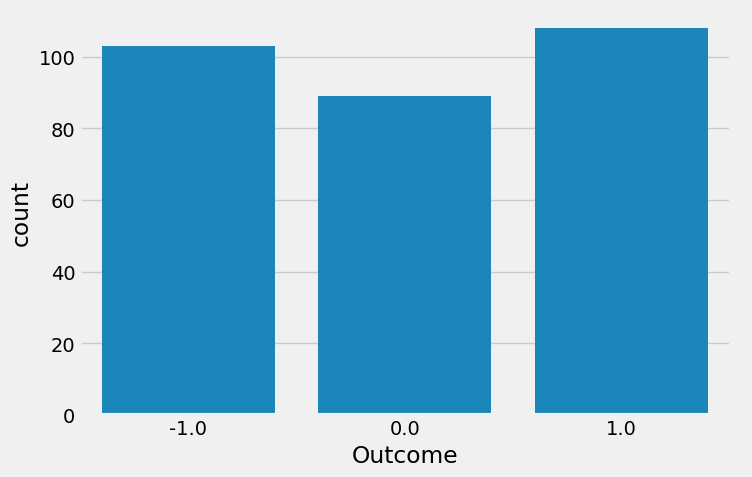

In [31]:
outcome_table = pandas.DataFrame({'Outcome': outcomes})
group = outcome_table.groupby('Outcome').agg(count=('Outcome', 'count')).reset_index()
fig = seaborn.catplot(data=group, x='Outcome', y='count', kind='bar', aspect=1.5)

Il n'est pas surprenant de constater que chacune des trois issues -1, 0 et 1 est apparue environ 100 fois sur 300, à peu de chose près. Nous examinerons de plus près les quantités 'à prendre ou à laisser' dans les chapitres suivants.

### Simulation
La simulation consiste à utiliser un ordinateur pour reproduire une expérience physique. Dans ce cours, ces expériences impliqueront presque invariablement le hasard.

Nous avons vu comment simuler les résultats d'un jeu de pile ou face. Les étapes de cette simulation étaient des exemples des étapes qui constitueront toutes les simulations que nous ferons dans ce cours. Dans cette section, nous allons définir ces étapes et les suivre dans des exemples.

#### Le processus

**Étape 1 : Que simuler ?**

Décidez de la quantité que vous souhaitez simuler. Par exemple, vous pouvez décider de simuler les résultats du lancer d'une pièce de monnaie. Chaque valeur simulée correspondra à pile ou à face.

**Étape 2 : Simulation d'une valeur**

Déterminez comment simuler *une* valeur de la quantité spécifiée à l'étape 1. Dans notre exemple, vous devez déterminer comment simuler le résultat d'*un seul* jeu de pile ou face. Si votre quantité est plus complexe, vous aurez peut-être besoin de plusieurs lignes de code pour obtenir une valeur simulée. Généralement, nous définissons une fonction qui renvoie la valeur simulée.

**Étape 3 : Nombre de répétitions**

Déterminez le nombre de fois que vous souhaitez simuler la quantité. Vous devrez répéter la simulation de l'étape 2 autant de fois. Dans l'un de nos exemples précédents, nous avions décidé de simuler les résultats de 1000 lancers d'une pièce de monnaie, et nous avions donc besoin de 1000 répétitions pour générer le résultat d'un seul lancer.

**Étape 4 : Simulation de valeurs multiples**

Enfin, il faut regrouper le tout de la manière suivante.

- Créez un tableau vide dans lequel vous rassemblerez toutes les valeurs simulées. Nous l'appellerons le tableau de collecte.
- Créez une 'séquence de répétitions', c'est-à-dire une séquence dont la longueur correspond au nombre de répétitions que vous avez spécifié à l'étape 3. Pour `n` répétitions, nous utiliserons presque toujours la séquence `np.arange(n)`.
- Créez une boucle `for`. Pour chaque élément de la séquence de répétitions :
    - Simulez *une* valeur en utilisant la fonction que vous avez écrite à l'étape 2.
    - Augmentez le tableau de la collection avec cette valeur simulée.
    
Et voilà ! Une fois que vous avez effectué les étapes ci-dessus, votre simulation est terminée. Le tableau de collection contient toutes les valeurs simulées.

À ce stade, vous pouvez utiliser le tableau de collection comme n'importe quel autre tableau. Vous pouvez compter combien de valeurs simulées appartiennent à une catégorie particulière, placer le tableau dans la colonne d'un tableau et visualiser la distribution des valeurs simulées, etc.

#### Exemple : Nombre de face sur 100 lancers
Il est naturel de s'attendre à ce que, sur 100 lancers d'une pièce de monnaie, il y ait 50 faces, à quelques exceptions près.

Mais à combien s'élèvent ces 'quelques' ? Quelle est la probabilité d'obtenir exactement 50 faces ? Les questions de ce type sont importantes en science des données, non seulement parce qu'elles portent sur des aspects intéressants du hasard, mais aussi parce qu'elles peuvent être utilisées pour analyser des expériences dans lesquelles les assignations aux groupes de traitement et de contrôle sont décidées à pile ou face.

Dans cet exemple, nous simulerons le nombre de têtes sur 100 lancers d'une pièce de monnaie. L'histogramme de nos résultats nous donnera une idée du nombre de faces probable.

Commençons la simulation en suivant les étapes ci-dessus.

**Étape 1 : Que simuler ?**

La quantité que nous allons simuler est le nombre de face sur 100 lancers.

**Étape 2 : Simulation d'une valeur**

Nous devons trouver un moyen d'effectuer une série de 100 lancers et de compter le nombre de face. Commençons par créer une pièce de monnaie.

In [32]:
coin = np.array(['Heads', 'Tails'], dtype=npstring)

Dans notre exemple précédent, nous avons utilisé `np.random.choice` et une boucle `for` pour générer plusieurs lancers. Mais les jeux de pile ou face sont si souvent nécessaires en science des données que `np.random.choice` les simule pour nous si nous incluons un second argument qui est le nombre de fois qu'il faut lancer.

Voici les résultats de 10 lancers.

In [33]:
ten_tosses = np.random.choice(coin, 10)
ten_tosses

array(['Tails', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails'], dtype=StringDType())

Nous pouvons compter le nombre de faces en utilisant `np.count_nonzero` comme précédemment :

In [34]:
np.count_nonzero(ten_tosses == 'Heads')

4

Notre objectif est de simuler le nombre de faces sur 100 lancers, et non sur 10. Pour ce faire, nous pouvons simplement répéter le même code, en remplaçant 10 par 100.

In [35]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

55

Étant donné que nous devrons effectuer cette opération plusieurs fois, définissons une fonction qui renvoie la valeur simulée du nombre de faces. Nous pouvons le faire en utilisant le code développé dans la cellule ci-dessus.

In [36]:
def one_simulated_value():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'Heads')

**Étape 3 : Nombre de répétitions**

Le nombre de répétitions est laissé à notre discrétion. Plus nous en utiliserons, plus nos simulations seront fiables, mais plus il faudra de temps pour exécuter le code. Python est assez rapide pour jouer à pile ou face, alors optons pour 20 000 répétitions. Cela signifie que nous allons effectuer les opérations suivantes 20 000 fois :
- Lancer une pièce 100 fois et compter le nombre de têtes.

Cela fait beaucoup de lancers ! C'est une bonne chose que Python le fasse pour nous.

**Étape 4 : Simuler plusieurs valeurs**

Nous sommes prêts à créer un tableau de 20 000 valeurs simulées du nombre de faces sur 100 lancers d'une pièce de monnaie.

In [37]:
num_repetitions = 20000   # number of repetitions

heads = np.array([]) # empty collection array

for i in np.arange(num_repetitions):   # repeat the process num_repetitions times
    new_value = one_simulated_value()  # simulate one value using the function defined
    heads = np.append(heads, new_value) # augment the collection array with the simulated value

# That's it! The simulation is done.

Vérifiez que le tableau `heads` contient 20 000 entrées, une pour chaque répétition de l'expérience.

In [38]:
len(heads)

20000

Pour avoir une idée de la variabilité du nombre de têtes sur 100 lancers, nous pouvons rassembler les résultats dans un tableau et dessiner un histogramme.

In [39]:
simulation_results = pandas.DataFrame({
    'Repetition': np.arange(1, num_repetitions + 1),
    'Number of Heads': heads
})

In [40]:
simulation_results.head(3)

,Repetition,Number of Heads
0,1,57.0
1,2,42.0
2,3,46.0


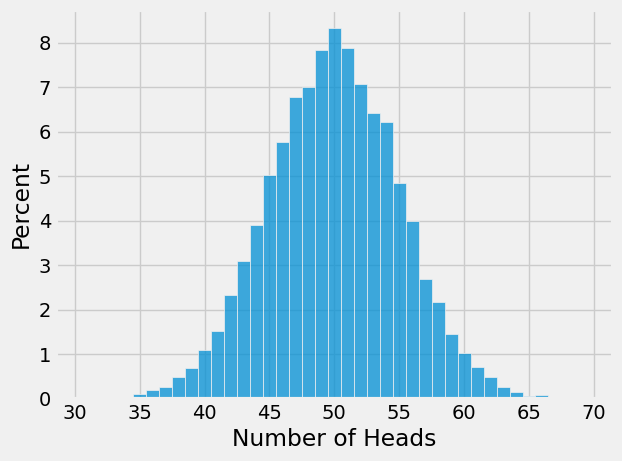

In [41]:
fig=seaborn.histplot(data=simulation_results, x='Number of Heads', bins = np.arange(30.5, 69.6, 1), stat='percent')

Chaque case a une largeur de 1 et est centrée sur chaque valeur du nombre de têtes.

Il n'est pas surprenant que l'histogramme soit à peu près symétrique autour de 50 têtes. La hauteur de la barre à 50 têtes est d'environ 8 % par unité. Étant donné que chaque case a une largeur d'une unité, cela revient à dire qu'environ 8 % des répétitions ont produit exactement 50 têtes. Ce n'est pas un pourcentage énorme, mais c'est le plus important comparé au pourcentage pour tous les autres nombres de têtes.

L'histogramme montre également que dans la quasi-totalité des répétitions, le nombre de face sur 100 lancers se situe entre 35 et 65. En effet, la plupart des répétitions ont produit des nombres de face compris entre 45 et 55.

Si, en théorie, il est *possible* que le nombre de face soit compris entre 0 et 100, la simulation montre que l'éventail des valeurs *probables* est beaucoup plus restreint.

Il s'agit d'un exemple d'un phénomène plus général concernant la variabilité du jeu de pile ou face, comme nous le verrons plus tard dans le cours.

#### Exemple : Les coups au Monopoly

Dans le jeu du Monopoly, chaque coup est déterminé par le nombre total de points des deux lancers d'un dé. Si vous jouez au Monopoly, à quoi devez-vous vous attendre lorsque vous lancez le dé deux fois ?

Nous pouvons étudier cette question en simulant la somme de deux lancers de dé. Nous allons effectuer la simulation 10 000 fois. Notez que dans ce paragraphe, nous avons terminé les étapes 1 et 3 de notre processus de simulation.

L'étape 2 est celle où nous écrivons une fonction pour simuler le nombre total de points dans une paire de lancers. Commençons par planifier notre code. Nous allons créer un tableau contenant les nombres 1 à 6, tirer deux fois au hasard dans le tableau avec remplacement, et additionner les deux nombres tirés.

In [42]:
die = np.arange(1, 7)
sum(np.random.choice(die, 2))

np.int64(11)

Nous pouvons utiliser le tableau `die` et l'expression ci-dessus pour définir une fonction qui simule un coup au Monopoly.

In [43]:
def one_simulated_move():
    return sum(np.random.choice(die, 2))

Nous pouvons maintenant créer un tableau de 10000 coups de Monopoly simulés, en commençant par un tableau de collection vide et en l'augmentant de chaque nouveau coup simulé.

In [44]:
num_repetitions = 10000

moves = np.array([])
for i in np.arange(num_repetitions):
    new_move = one_simulated_move()
    moves = np.append(moves, new_move)

Voici un histogramme des résultats.

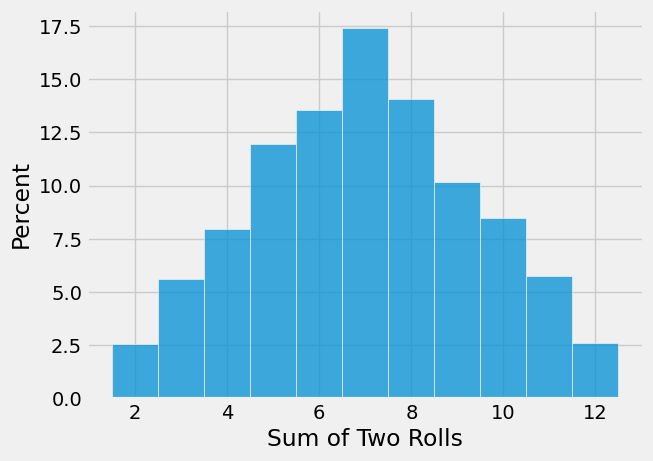

In [45]:
results = pandas.DataFrame({
    'Repetition': np.arange(1, num_repetitions + 1),
    'Sum of Two Rolls': moves
})

fig = seaborn.histplot(data=results, x='Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1), stat='percent')

Sept est la valeur la plus courante, les fréquences diminuant symétriquement de part et d'autre.

## 3. Probabilité (facultatif)

### Trouver des probabilités par simulation : Le problème de Monty Hall

Ce [problème](https://en.wikipedia.org/wiki/Monty_Hall_problem) a déconcerté de nombreuses personnes au fil des ans, [y compris les mathématiciens](https://web.archive.org/web/20140413131827/http://www.decisionsciences.org/DecisionLine/Vol30/30_1/vazs30_1.pdf). Voyons si nous pouvons le résoudre par simulation.

Le cadre est dérivé d'un jeu télévisé appelé 'Let's Make a Deal'. Monty Hall a animé cette émission dans les années 1960, et elle a depuis donné lieu à un certain nombre d'émissions dérivées. L'un des aspects passionnants de l'émission était que les candidats avaient la possibilité de gagner des prix importants, mais qu'ils pouvaient aussi se retrouver avec des prix sans valeurs ou indésirables. C'est la base de ce que l'on appelle aujourd'hui 'le problème de Monty Hall'.

Il s'agit d'un jeu télévisé dans lequel le candidat est confronté à trois portes fermées. Derrière l'une des portes se trouve une voiture de luxe, et derrière chacune des deux autres se trouve une chèvre. Le candidat ne sait pas où se trouve la voiture et doit essayer de la trouver en suivant les règles suivantes.

- Le candidat fait un premier choix, mais cette porte n'est pas ouverte.
- Au moins une des deux autres portes doit avoir une chèvre derrière elle. Monty ouvre l'une de ces portes pour révéler une chèvre, exposée dans toute sa gloire dans [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem) :

![Chèvre de Monty Hall](images/monty_hall_goat.png)

- Il reste deux portes, dont l'une était le choix initial du candidat. L'une des portes a la voiture derrière elle, et l'autre a une chèvre. Le candidat doit maintenant choisir laquelle des deux portes il veut ouvrir.

Le candidat doit prendre une décision. Quelle porte doit-elle choisir d'ouvrir si elle veut la voiture ? Doit-elle s'en tenir à son choix initial ou passer à l'autre porte ? C'est le problème de Monty Hall.

#### La solution

Dans tout problème impliquant des chances, les hypothèses sur le hasard sont importantes. Il est raisonnable de supposer qu'il y a un tiers de chances que le choix initial du candidat soit la porte derrière laquelle se trouve la voiture.

La solution du problème est assez simple sous cette hypothèse, même si elle ne convainc pas tout le monde. La voici tout de même.

- La probabilité que la voiture se trouve derrière la porte initialement choisie est de 1/3.
- La voiture se trouve soit derrière la porte initialement choisie, soit derrière la porte restante. Elle ne peut pas être ailleurs.
- Par conséquent, la probabilité que la voiture soit derrière la porte restante est de 2/3.
- Par conséquent, le candidat doit changer de porte.

C'est tout. Fin de l'histoire.

Vous n'êtes pas convaincu ? Alors simulons le jeu et voyons ce que cela donne.

#### Simulation
La simulation sera plus complexe que celles que nous avons réalisées jusqu'à présent. Décomposons-la.

**Étape 1 : Que simuler ?

Pour chaque jeu, nous simulerons ce qui se trouve derrière les trois portes :
- celle que le candidat choisit en premier
- celle que Monty ouvre
- la porte restante

Nous suivrons donc trois quantités, et non une seule.

**Étape 2 : Simulation d'un jeu**

Comme c'est souvent le cas dans la simulation d'un jeu, le gros du travail consiste à simuler une partie du jeu. Cela implique plusieurs éléments.

**Nous commençons par mettre en place un tableau `goats` qui contient des noms peu imaginatifs pour les deux chèvres.**

In [46]:
goats = np.array(['first goat', 'second goat'], dtype=npstring)

Pour aider Monty à mener le jeu, nous allons devoir identifier quelle chèvre est sélectionnée et laquelle est révélée derrière la porte ouverte. La fonction `autre_chèvre` prend une chèvre et renvoie l'autre.

In [47]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [48]:
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

La chaîne `watermelon` n'est pas le nom d'une des chèvres, donc quand `watermelon` est l'entrée, alors `other_goat` ne fait rien.

**Les options:** Le tableau `hidden_behind_doors` contient les trois choses qui sont
derrière les portes.

In [49]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'], dtype=StringDType())

Nous sommes maintenant prêts à simuler une partie. Pour ce faire, nous allons définir une fonction `monty_hall_game` qui ne prend aucun argument. Lorsque la fonction est appelée, elle joue le jeu de Monty une fois et retourne une liste composée de :

- la supposition du candidat
- ce que Monty révèle lorsqu'il ouvre une porte
- ce qui reste derrière l'autre porte

Le jeu commence par le choix d'une porte au hasard par le participant. Ce faisant, il fait un choix aléatoire parmi la première chèvre, la deuxième chèvre et la voiture.

Si le participant choisit l'une des chèvres, l'autre chèvre est révélée et la voiture se trouve derrière la porte restante.

Si le participant choisit la voiture, Monty révèle l'une des chèvres et l'autre chèvre se trouve derrière la porte restante.

In [50]:
def monty_hall_game():
    '''Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]'''
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

Jouons ! Exécutez la cellule plusieurs fois et voyez comment les résultats changent.

In [51]:
monty_hall_game()

['car', 'first goat', 'second goat']

**Étape 3 : Nombre de répétitions**

Pour évaluer la fréquence à laquelle les différents résultats se produisent, nous devons jouer le jeu plusieurs fois et collecter les résultats. Effectuons 10 000 répétitions.

**Étape 4 : Simulation de plusieurs répétitions**

Il est temps d'effectuer la simulation complète. Mais contrairement à nos simulations précédentes dans lesquelles chaque simulation produisait une seule valeur, dans cet exemple, nous simulons une liste de trois valeurs à chaque fois.

Nous traiterons cette liste simulée comme une ligne d'un tableau. Ainsi, au lieu de commencer par un array numpy vide et de l'enrichir à chaque nouvelle valeur simulée, nous commencerons par un tableau vide et l'enrichirons à chaque nouvelle valeur simulée. Chaque ligne contiendra le résultat complet d'une partie.

Une façon d'augmenter un tableau en ajoutant une nouvelle ligne est d'utiliser la méthode `append`. Si `my_table` est une table et que `new_row` est une liste contenant les entrées d'une nouvelle ligne, alors `my_table.append(new_row)` ajoute la nouvelle ligne au bas de `my_table`.

Notez que `append` ne crée pas une nouvelle table. Il modifie `my_table` pour qu'il ait une ligne de plus qu'auparavant.

Nous allons commencer avec une table de collection `games` qui a trois colonnes vides. Nous pouvons le faire en spécifiant simplement une liste de libellés de colonnes dans le même ordre que celui dans lequel `monty_hall_game` renvoie le résultat d'un jeu.

Maintenant, nous pouvons ajouter 10 000 lignes à `games`. Chaque ligne représentera le résultat d'une partie du jeu de Monty.

In [52]:
# Play the game 10000 times and 
rows = []
for i in np.arange(10000):
    rows.append(monty_hall_game())

# record the results in the table games
games = pandas.DataFrame(rows, columns=['Guess', 'Revealed', 'Remaining'])


La simulation est terminée. Remarquez la brièveté du code. La majeure partie du travail a consisté à simuler le résultat d'un seul match.

In [53]:
games.head(3)

,Guess,Revealed,Remaining
0,first goat,second goat,car
1,second goat,first goat,car
2,first goat,second goat,car


#### Visualisation

Pour savoir si le/la candidat(e) doit s'en tenir à son choix initial ou changer, voyons à quelle fréquence la voiture se trouve derrière chacune de ses deux options.

Il n'est pas surprenant que les trois portes apparaissent à peu près aussi souvent que le choix initial de le/la candidat(e).

In [54]:
original_choice = games.groupby('Guess').agg(count=('Guess', 'count')).reset_index()
original_choice

,Guess,count
0,car,3300
1,first goat,3379
2,second goat,3321


Une fois que Monty a éliminé une chèvre, combien de fois la voiture se trouve-t-elle derrière la porte restante ?

In [55]:
remaining_door = games.groupby('Remaining').agg(count=('Remaining', 'count')).reset_index()
remaining_door

,Remaining,count
0,car,6700
1,first goat,1667
2,second goat,1633


Comme l'indiquait notre solution précédente, la voiture se trouve derrière la porte restante les deux tiers du temps, ce qui constitue une bonne approximation. Le/la candidat(e) a deux fois plus de chances d'obtenir la voiture s'il change de porte que s'il s'en tient à son choix initial.

Pour visualiser ce phénomène graphiquement, nous pouvons joindre les deux tableaux ci-dessus et tracer des diagrammes à barres superposés.

In [56]:
joined = original_choice.merge(remaining_door, left_on='Guess', right_on='Remaining')
joined

,Guess,count_x,Remaining,count_y
0,car,3300,car,6700
1,first goat,3379,first goat,1667
2,second goat,3321,second goat,1633


On peut supprimer la colonne en doublon, puis on renomme les colonnes avec les comptes.

In [57]:
combined = joined.drop(columns='Remaining').rename(
    columns={'Guess': 'Item', 'count_x': 'Original Door', 'count_y': 'Remaining Door'})
combined

,Item,Original Door,Remaining Door
0,car,3300,6700
1,first goat,3379,1667
2,second goat,3321,1633


Pour afficher les deux même temps, on a besoin de la méthode `melt`.

In [58]:
combined_melted = pandas.melt(combined, id_vars='Item', var_name='Door', value_name='count')
combined_melted

,Item,Door,count
0,car,Original Door,3300
1,first goat,Original Door,3379
2,second goat,Original Door,3321
3,car,Remaining Door,6700
4,first goat,Remaining Door,1667
5,second goat,Remaining Door,1633


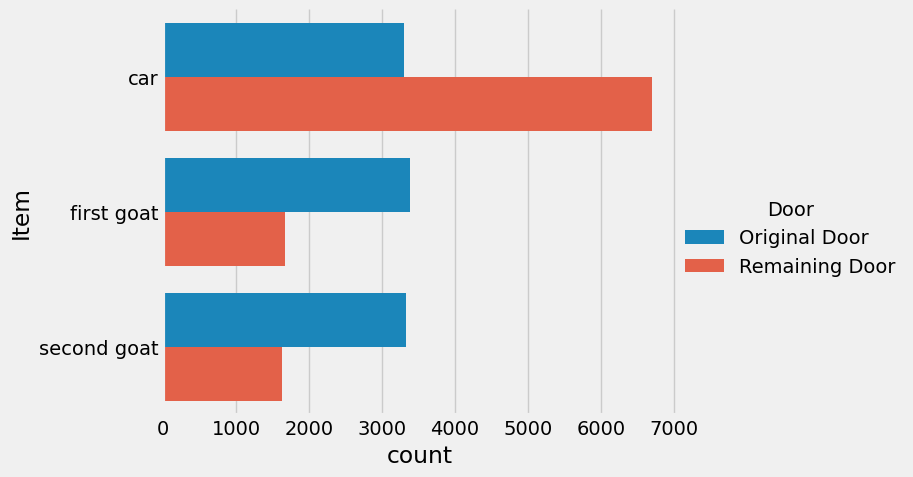

In [59]:
fig = seaborn.catplot(data=combined_melted, y='Item', x='count', hue='Door', kind='bar', aspect=1.5)

Remarquez que les trois barres bleues sont presque égales - le choix initial a la même probabilité d'être n'importe lequel des trois éléments disponibles. Mais la barre dorée correspondant à la 'voiture' est deux fois plus longue que la barre bleue.

La simulation confirme que la candidate a deux fois plus de chances de gagner si elle change de choix.

### Trouver des probabilités grâce aux mathématiques
Au cours des siècles, la définition des probabilités a fait l'objet d'un débat philosophique considérable. Certains pensent que les probabilités sont des fréquences relatives ; d'autres pensent qu'il s'agit de fréquences relatives à long terme ; d'autres encore pensent que les probabilités sont une mesure subjective de leur propre degré d'incertitude.

Dans ce cours, la plupart des probabilités seront des fréquences relatives, même si beaucoup d'entre elles auront des interprétations subjectives. Quoi qu'il en soit, les méthodes de calcul et de combinaison des probabilités sont cohérentes entre les différentes interprétations.

Par convention, les probabilités sont des nombres compris entre 0 et 1, ou, de manière équivalente, entre 0 et 100 %. Les événements impossibles ont une probabilité de 0. Les événements certains ont une probabilité de 1.

Les mathématiques sont le principal outil permettant de déterminer les probabilités avec précision, bien que les ordinateurs soient également utiles à cette fin. La simulation peut fournir d'excellentes approximations, avec une probabilité élevée. Dans cette section, nous développerons de manière informelle quelques règles simples qui régissent le calcul des probabilités. Dans les sections suivantes, nous reviendrons aux simulations pour calculer approximativement les probabilités d'événements complexes.

Nous utiliserons la notation standard $P(\mbox{événement})$ pour désigner la probabilité que 'l'événement' se produise, et nous utiliserons indifféremment les mots 'hasard' et 'probabilité'.

#### Lorsqu'un événement ne se produit pas
Si la probabilité qu'un événement se produise est de 40 %, alors la probabilité qu'il ne se produise pas est de 60 %. Ce calcul naturel peut être décrit de manière générale comme suit :

$$
P(\mbox{un événement ne se produit pas}) ~=~ 1 - P(\mbox{l'événement se produit})
$$

#### Lorsque tous les résultats sont également probables
Si vous lancez un dé ordinaire, l'hypothèse naturelle est que les six faces ont la même probabilité. Dans cette hypothèse, les probabilités de résultat d'un lancer peuvent être facilement calculées sous forme de ratio. Par exemple, la probabilité que le dé donne un nombre pair est de

$$
\frac{\mbox{nombre de faces paires}}{\mbox{nombre de toutes les faces}}
~=~ \frac{\#\{2, 4, 6\}}{\#\{1, 2, 3, 4, 5, 6\}}
~=~ \frac{3}{6}
$$

De même,

$$
P(\mbox{le dé montre un multiple de 3}) ~=~
\frac{\#\{3, 6\}}{\#\{1, 2, 3, 4, 5, 6\}}
~=~ \frac{2}{6}
$$

En général, **si tous les résultats sont également probables**,

$$
P(\mbox{un événement se produit}) ~=~
\frac{\#\{\mbox{résultats qui permettent à l'événement d'avoir lieu}\}}
{\#\{\mbox{tous les résultats}\}}
$$

Tous les phénomènes aléatoires ne sont pas aussi simples qu'un lancer de dé. Les deux principales règles de probabilité, développées ci-dessous, permettent aux mathématiciens de trouver des probabilités même dans des situations complexes.

#### Lorsque deux événements doivent se produire tous les deux
Supposons que vous disposiez d'une boîte contenant trois billets : un rouge, un bleu et un vert. Supposons que vous tiriez deux billets au hasard sans remplacement, c'est-à-dire que vous mélangez les trois billets, en tiriez un, mélangiez les deux restants et en tiriez un autre parmi ces deux billets. Quelle est la probabilité que vous obteniez d'abord le billet vert, puis le billet rouge ?

Il y a six paires de couleurs possibles : RB, BR, RV, VR, BV, VB (nous avons abrégé le nom de chaque couleur à sa première lettre). Toutes ces paires sont également probables d'après le plan d'échantillonnage, et seule l'une d'entre elles (VR) permet à l'événement de se produire. En d'autres termes

$$
P(\mbox{vert d'abord, puis rouge}) ~=~
\frac{\#\{\mbox{VR}\}}{\#\{\mbox{RB, BR, RV, VR, BV, VB}\}} ~=~ \frac{1}{6}
$$

Mais il y a une autre façon d'arriver à la réponse, en pensant à l'événement en deux étapes. Tout d'abord, le billet vert doit être tiré au sort. Cette chance est de $1/3$, ce qui signifie que le billet vert est tiré en premier dans environ $1/3$ de toutes les répétitions de l'expérience. Mais l'événement n'est pas terminé pour autant. *Parmi le tiers des répétitions où le billet vert est tiré en premier*, le billet rouge doit être tiré ensuite. Cela se produit dans environ $1/2$ de ces répétitions, et ainsi de suite :

$$
P(\mbox{vert d'abord, puis rouge}) ~=~ \frac{1}{2} ~\mbox{de}~ \frac{1}{3}
~=~ \frac{1}{6}
$$

Ce calcul est généralement écrit 'dans l'ordre chronologique', comme suit.

$$
P(\mbox{vert d'abord, puis rouge}) ~=~ \frac{1}{3} ~\times~ \frac{1}{2}
~=~ \frac{1}{6}
$$

Le facteur $1/2$ est appelé 'la probabilité conditionnelle que le ticket rouge apparaisse en second, étant donné que le ticket vert est apparu en premier'.

En général, nous avons la **règle de multiplication** :

$$
P(\mbox{deux événements se produisent tous les deux})
~=~ P(\mbox{un événement se produit}) \times
P(\mbox{l'autre événement se produit, étant donné que le premier s'est produit})
$$

Ainsi, lorsqu'il y a deux conditions - un événement doit se produire, ainsi qu'un autre - la probabilité est *une fraction d'une fraction*, qui est plus petite que l'une ou l'autre des deux fractions composantes. Plus il y a de conditions à remplir, moins il y a de chances qu'elles soient toutes remplies.

#### Lorsqu'un événement peut se produire de deux manières différentes
Supposons plutôt que nous voulions connaître la probabilité que l'un des deux billets soit vert et l'autre rouge. Cet événement ne précise pas l'ordre dans lequel les couleurs doivent apparaître. Elles peuvent donc apparaître dans n'importe quel ordre.

Une bonne façon d'aborder ce genre de problème est de *partitionner* l'événement de façon à ce qu'il puisse se produire exactement de l'une des différentes façons. La partition naturelle de 'un vert et un rouge' est : VR, RV.

Chacune de ces deux possibilités a une chance de $1/6$ selon le calcul ci-dessus. Vous pouvez donc calculer la probabilité de 'un vert et un rouge' en les additionnant.

$$
P(\mbox{un vert et un rouge}) ~=~ P(\mbox{VR}) + P(\mbox{RV}) ~=~
\frac{1}{6} + \frac{1}{6} ~=~ \frac{2}{6}
$$

En général, nous avons la **règle de l'addition** :

$$
P(\mbox{un événement se produit}) ~=~
P(\mbox{première façon dont il peut se produire}) + P(\mbox{deuxième façon dont il peut se produire}) ~~~
\mbox{}
$$

à condition que l'événement se produise exactement de l'une des deux façons.

Ainsi, lorsqu'un événement peut se produire de deux manières différentes, la chance qu'il se produise est une somme de chances, et donc plus grande que la chance de l'une ou l'autre des manières individuelles.

La règle de multiplication s'étend naturellement à plus de deux événements, comme nous le verrons plus loin. De même, la règle de l'addition s'étend naturellement aux événements qui peuvent se produire de plusieurs manières différentes.

Nous terminons cette section par des exemples qui utilisent des combinaisons de toutes ces règles.

#### Au moins une réussite
Les scientifiques des données travaillent souvent avec des échantillons aléatoires de populations. Une question qui se pose parfois concerne la probabilité qu'un individu particulier de la population soit sélectionné pour faire partie de l'échantillon. Pour calculer cette probabilité, cet individu est appelé 'succès' et le problème consiste à trouver la probabilité que l'échantillon contienne un succès.

Pour voir comment ces chances peuvent être calculées, nous commençons par une situation plus simple : tirer deux fois à pile ou face.

Si vous jouez deux fois à pile ou face, il y a quatre résultats également probables : PP, PF, FP et FF. Nous avons abrégé 'Pile' en P et 'Face' en F. La probabilité d'obtenir au moins un face en deux lancers est donc de 3/4.

Une autre façon d'obtenir cette réponse est de déterminer ce qui se passe si vous n'obtenez pas au moins un face. C'est le cas lorsque les deux lancers aboutissent à pile ou face. Dans ce cas

$$
P(\mbox{au moins une face sur deux lancers}) ~=~ 1 - P(\mbox{deux piles}) ~=~ 1 - \frac{1}{4}
~=~ \frac{3}{4}
$$

Remarquez également que

$$
P(\mbox{deux piles}) ~=~ \frac{1}{4} ~=~ \frac{1}{2} \cdot \frac{1}{2} ~=~ \left(\frac{1}{2}\right)^2
$$
par la règle de multiplication.

Ces deux observations nous permettent de déterminer la probabilité qu'il y ait au moins une face pour un nombre donné de lancers. Par exemple,

$$
P(\mbox{au moins une face sur 17 lancers}) ~=~ 1 - P(\mbox{les 17 lancers sont des piles})
~=~ 1 - \left(\frac{1}{2}\right)^{17}
$$

Nous sommes maintenant en mesure de déterminer la probabilité que la face à six points apparaisse au moins une fois lors d'un lancer de dé.

Par exemple,

$$
P(\mbox{un seul lancer n'est pas 6}) ~=~ 1 - P(6)
~=~ \frac{5}{6}
$$

Donc,

$$
P(\mbox{au moins un 6 dans deux lancers}) ~=~ 1 - P(\mbox{les deux lancers ne sont pas 6})
~=~ 1 - \left(\frac{5}{6}\right)^2
$$

et

$$
P(\mbox{au moins un 6 sur 17 lancers})
~=~ 1 - \left(\frac{5}{6}\right)^{17}
$$

Le tableau ci-dessous présente ces probabilités lorsque le nombre de lancers augmente de 1 à 50.

In [60]:
rolls = np.arange(1, 51, 1)
results = pandas.DataFrame({
    'Rolls': rolls,
    'Chance of at least one 6': 1 - (5/6)**rolls
})
results

,Rolls,Chance of at least one 6
0,1,0.166667
1,2,0.305556
2,3,0.421296
3,4,0.517747
4,5,0.598122
...,...,...
45,46,0.999772
46,47,0.999810
47,48,0.999842
48,49,0.999868


La probabilité qu'un 6 apparaisse au moins une fois augmente rapidement au fur et à mesure que le nombre de lancers augmente.

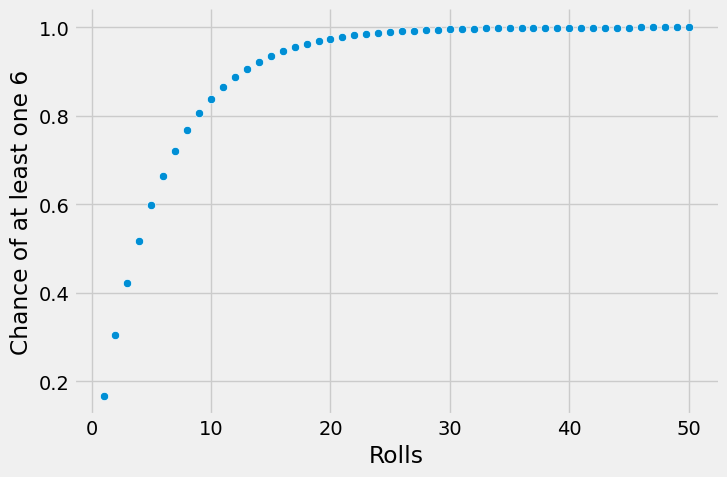

In [61]:
fig=seaborn.relplot(data=results, x='Rolls', y='Chance of at least one 6', aspect=1.5)

En 50 lancers, vous êtes presque certain d'obtenir au moins un 6.

In [62]:
results[results['Rolls'] == 50]

,Rolls,Chance of at least one 6
49,50,0.99989


Des calculs de ce type peuvent être utilisés pour déterminer la probabilité qu'un individu particulier soit sélectionné dans un échantillon aléatoire. Le calcul exact dépend du plan d'échantillonnage. Mais ce que nous avons observé ci-dessus peut généralement être généralisé : l'augmentation de la taille de l'échantillon aléatoire augmente la probabilité qu'un individu soit sélectionné.

## 4. Échantillonnage et distributions empiriques

Une partie importante de la science des données consiste à tirer des conclusions basées sur les données des échantillons aléatoires. Afin d'interpréter correctement leurs résultats, les scientifiques des données doivent d'abord comprendre exactement ce que sont les échantillons aléatoires.

Dans ce chapitre, nous examinerons plus attentivement l'échantillonnage, en accordant une attention particulière aux propriétés des grands échantillons aléatoires.

Commençons par tirer quelques échantillons. Nos exemples sont basés sur l'ensemble de données [`top_movies_2017.csv`] (https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html#grouping-categorical-data).

### Échantillonnage

In [63]:
top = pandas.read_csv(path_data + '/top_movies_2017.csv')
top


,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


#### Échantillonnage des lignes d'un tableau

Chaque ligne d'un tableau de données représente un individu ; dans `top`, chaque individu est un film. L'échantillonnage des individus peut donc être réalisé en échantillonnant les lignes d'un tableau.

Le contenu d'une ligne correspond aux valeurs de différentes variables mesurées sur le même individu. Le contenu des lignes échantillonnées forme donc des échantillons de valeurs de chacune des variables.

#### Échantillons déterministes

Lorsque vous spécifiez simplement les éléments d'un ensemble que vous souhaitez choisir, sans aucun hasard, vous créez un *échantillon déterministe*.

Vous avez fait cela de nombreuses fois, par exemple en utilisant `iloc` :

In [64]:
top.iloc[[3, 18, 100]]

,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
18,The Lion King,Buena Vista,422783777,792511700,1994
100,The Hunger Games,Lionsgate,408010692,452174400,2012


Vous avez également utilisé `str.contains` :

In [65]:
top[top['Title'].str.contains('Harry Potter')]

,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,317575550,497066400,2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,381011219,426630300,2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,290013036,401608200,2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,261988482,399302200,2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,292004738,377314200,2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,301959197,359788300,2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,249541069,357233500,2004


Bien qu'il s'agisse d'échantillons, il ne s'agit pas d'échantillons aléatoires. Ils ne sont pas le fruit du hasard.

#### Échantillons de probabilité

Pour décrire les échantillons aléatoires, une certaine terminologie est utile.

Une *population* est l'ensemble de tous les éléments à partir desquels un échantillon sera tiré.

Un *échantillon probabiliste* est un échantillon pour lequel il est possible de calculer, avant le tirage, la probabilité qu'un sous-ensemble d'éléments entre dans l'échantillon.

Dans un échantillon probabiliste, tous les éléments n'ont pas nécessairement la même chance d'être choisis.

#### Un plan d'échantillonnage aléatoire

Par exemple, supposons que vous choisissiez deux personnes dans une population composée de trois personnes A, B et C, selon le schéma suivant :

- La personne A est choisie avec une probabilité de 1.
- L'une des personnes B ou C est choisie à pile ou face : si la pièce tombe sur pile, vous choisissez B, et si elle tombe sur face, vous choisissez C.

Il s'agit d'un échantillon de probabilité de taille 2. Voici les chances de participation pour tous les sous-ensembles non vides :

    A : 1
    B : 1/2
    C : 1/2
    AB : 1/2
    AC : 1/2
    BC : 0
    ABC : 0

La personne A a plus de chances d'être sélectionnée que les personnes B ou C ; en effet, la personne A est certaine d'être sélectionnée. Ces différences étant connues et quantifiées, elles peuvent être prises en compte lors de l'exploitation de l'échantillon.

#### Un échantillon systématique

Imaginez que tous les éléments de la population soient énumérés dans une séquence. Une méthode d'échantillonnage consiste à choisir une position aléatoire au début de la liste, puis des positions régulièrement espacées. L'échantillon est constitué des éléments situés à ces positions. Un tel échantillon est appelé 'échantillon systématique'.

Ici, nous allons choisir un échantillon systématique des lignes de `top`. Nous commencerons par prendre au hasard l'une des 10 premières lignes, puis nous prendrons toutes les 10 lignes suivantes.

In [66]:
'''Choose a random start among rows 0 through 9;
then take every 10th row.'''

start = np.random.choice(np.arange(10))
top.iloc[np.arange(start, len(top), 10)]

,Title,Studio,Gross,Gross (Adjusted),Year
7,Doctor Zhivago,MGM,111721910,1103564200,1965
17,Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999
27,Grease,Paramount,188755690,684256200,1978
37,Spider-Man,Sony,403706375,617719400,2002
47,Pirates of the Caribbean: Dead Man's Chest,Buena Vista,423315812,574546200,2006
57,Cinderella (1950),Disney,93141149,536079700,1950
67,The Sixth Sense,Buena Vista,293506292,511878400,1999
77,Lawrence of Arabia,Columbia,44824144,492359800,1962
87,"It's a Mad, Mad, Mad, Mad World",MGM,46332858,478952400,1963
97,Ghost,Paramount,217631306,457525800,1990


Faites fonctionner la cellule plusieurs fois pour voir comment la sortie varie.

Cet échantillon systématique est un échantillon de probabilité. Dans ce schéma, toutes les lignes ont une chance de $1/10$ d'être choisies. Par exemple, la ligne 23 est choisie si et seulement si la ligne 3 est choisie, et la probabilité est de $1/10$.

Mais tous les sous-ensembles n'ont pas la même chance d'être choisis. Étant donné que les rangs sélectionnés sont régulièrement espacés, la plupart des sous-ensembles de rangs n'ont aucune chance d'être choisis. Les seuls sous-ensembles possibles sont ceux composés de lignes toutes séparées par des multiples de 10. Chacun de ces sous-ensembles est choisi avec une chance de 1/10.  D'autres sous-ensembles, tels qu'un sous-ensemble contenant à la fois les 15e et 16e lignes du tableau, ou tout sous-ensemble de taille supérieure à 10, sont sélectionnés avec une chance 0.

#### Échantillons aléatoires tirés avec ou sans remplacement
 
Dans ce cours, nous traiterons principalement des deux méthodes d'échantillonnage les plus simples.

La première est l'échantillonnage aléatoire avec remplacement, qui (comme nous l'avons vu précédemment) est le comportement par défaut de `np.random.choice` lorsqu'il échantillonne à partir d'un tableau.

L'autre, appelée 'échantillon aléatoire simple', est un échantillon tiré au hasard *sans* remplacement. Les individus échantillonnés ne sont pas remplacés dans la population avant que l'individu suivant ne soit tiré. C'est le type d'échantillonnage qui se produit lorsque vous tirez une main d'un jeu de cartes, par exemple. Pour utiliser `np.random.choice` pour un échantillonnage aléatoire simple, vous devez inclure l'argument `replace=False`.

Dans ce chapitre, nous utiliserons la simulation pour étudier le comportement de grands échantillons tirés au hasard avec ou sans remplacement.

#### Échantillons de commodité
Le tirage d'un échantillon aléatoire exige soin et précision. Il ne s'agit pas d'un échantillonnage choisi n'importe comment, même si c'est le sens que l'on donne au mot 'aléatoire' dans le langage courant. Si vous vous tenez au coin d'une rue et que vous prenez comme échantillon les dix premières personnes qui passent, vous pourriez penser que vous échantillonnez au hasard parce que vous n'avez pas choisi les personnes qui passent. Mais il ne s'agit pas d'un échantillon aléatoire, mais d'un *échantillon de commodité*. Vous ne connaissiez pas à l'avance la probabilité que chaque personne entre dans l'échantillon ; vous n'aviez peut-être même pas spécifié exactement qui faisait partie de la population.

### Distributions empiriques

En science des données, le mot 'empirique' signifie 'observé'. Les distributions empiriques sont des distributions de données observées, telles que les données d'échantillons aléatoires.

Dans cette section, nous allons générer des données et voir à quoi ressemble la distribution empirique.

Notre cadre est une expérience simple : lancer un dé plusieurs fois et noter la face qui apparaît. Le tableau `die` contient les nombres de points sur les faces d'un dé. Tous les nombres apparaissent exactement une fois, car nous supposons que le dé n'est pas pipé.

In [67]:
die = pandas.DataFrame({'Face': np.arange(1, 7, 1)})
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


#### Une distribution de probabilité

L'histogramme ci-dessous nous aide à visualiser le fait que chaque face du dé apparaît avec une probabilité de 1/6. On dit que l'histogramme montre la *distribution* des probabilités sur toutes les faces possibles. Comme toutes les barres représentent le même pourcentage de chance, la distribution est dite *uniforme sur les nombres entiers de 1 à 6.*

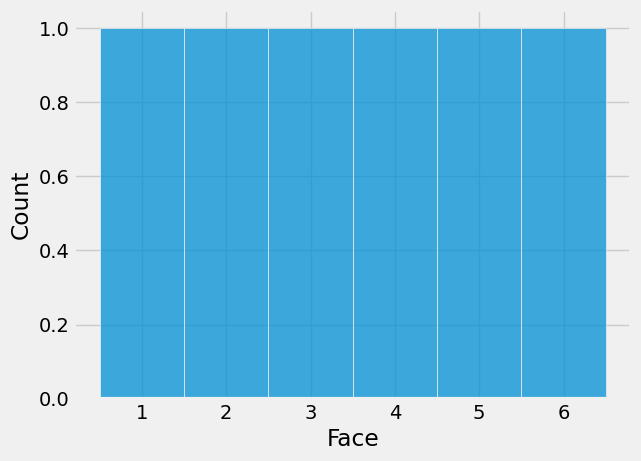

In [68]:
die_bins = np.arange(0.5, 6.6, 1)
fig=seaborn.histplot(data=die, x='Face', bins = die_bins)

Les variables dont les valeurs successives sont séparées par la même quantité fixe, telles que les valeurs des lancers de dé (valeurs successives séparées par 1), appartiennent à une classe de variables appelées *discrètes*. L'histogramme ci-dessus est un histogramme *discret*. Ses bins sont spécifiés par le tableau `die_bins` et garantissent que chaque barre est centrée sur la valeur entière correspondante.

Il est important de se rappeler que le dé ne peut pas afficher 1,3 points ou 5,2 points - il affiche toujours un nombre entier de points. Mais notre visualisation répartit la probabilité de chaque valeur sur la surface d'une barre. Bien que cela puisse sembler un peu arbitraire à ce stade du cours, cela deviendra important plus tard lorsque nous superposerons des courbes lisses à des histogrammes discrets.

Avant d'aller plus loin, assurons-nous que les nombres sur les axes ont un sens. La probabilité de chaque face est de 1/6, soit 16,67 % après arrondi à deux décimales. La largeur de chaque case est de 1 unité. La hauteur de chaque barre est donc de 16,67 % par unité. Cela correspond aux échelles horizontale et verticale du graphique.

#### Distributions empiriques
La distribution ci-dessus correspond à la probabilité théorique de chaque visage. Elle est appelée *distribution de probabilité* et n'est pas basée sur des données observées. Elle peut être étudiée et comprise sans qu'aucun dé ne soit lancé.

Les *distributions empiriques*, en revanche, sont des distributions de données observées. Elles peuvent être visualisées par des *histogrammes empiriques*.

Obtenons des données en simulant des lancers de dé. Cela peut être fait en échantillonnant au hasard avec remplacement les nombres entiers de 1 à 6. Nous avons déjà utilisé `np.random.choice` pour de telles simulations. Mais nous allons maintenant introduire une méthode de pandas pour faire cela. Cela nous permettra d'utiliser plus facilement nos méthodes familières de tableau pour la visualisation.

La méthode pandas est appelée `sample`. Elle tire au hasard avec remplacement dans les lignes d'un tableau. Son argument est la taille de l'échantillon, et elle renvoie un tableau composé des lignes qui ont été sélectionnées. L'argument optionnel `replace=True` spécifie que l'échantillon doit être tiré avec remplacement. Cela ne s'applique au lancer de dé.

Voici les résultats de 10 lancers de dé.

In [69]:
die.sample(10, replace=True)

,Face
4,5
5,6
0,1
2,3
5,6
4,5
0,1
1,2
2,3
1,2


Nous pouvons utiliser la même méthode pour simuler autant de lancers que nous le souhaitons, puis tracer des histogrammes empiriques des résultats. Comme nous allons faire cela de façon répétée, nous définissons une fonction `empirical_hist_die` qui prend la taille de l'échantillon comme argument, lance un dé autant de fois que l'argument, et dessine ensuite un histogramme des résultats observés.

In [70]:
def empirical_hist_die(n):
    seaborn.histplot(data=die.sample(n, replace=True), x='Face', bins = die_bins, stat='percent')

#### Histogrammes empiriques

Voici un histogramme empirique de 10 lancers. Il ne ressemble pas vraiment à l'histogramme de probabilité ci-dessus. Lancez la cellule plusieurs fois pour voir comment elle varie.

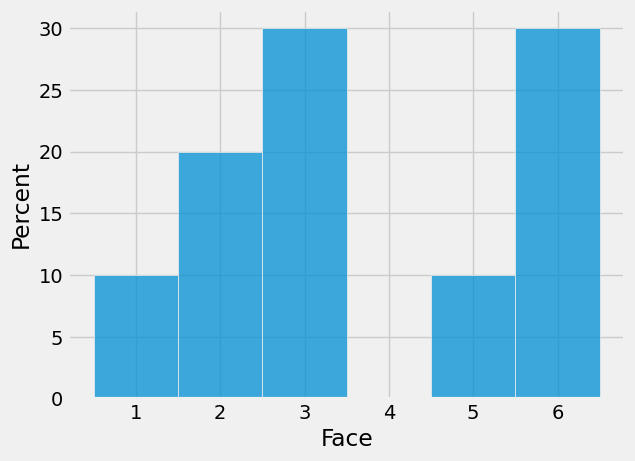

In [71]:
empirical_hist_die(10)

Lorsque la taille de l'échantillon augmente, l'histogramme empirique commence à ressembler davantage à l'histogramme des probabilités théoriques.

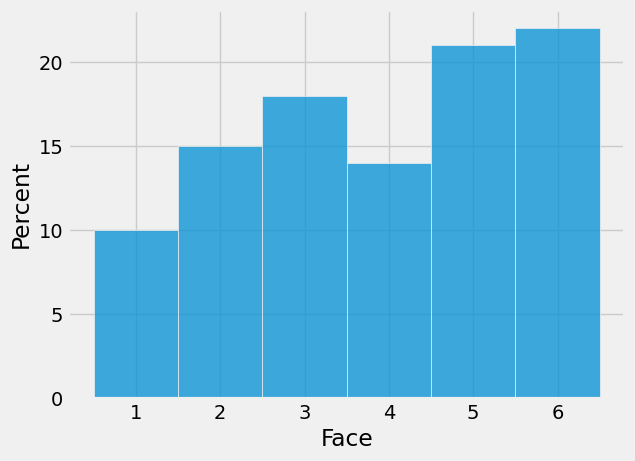

In [72]:
empirical_hist_die(100)

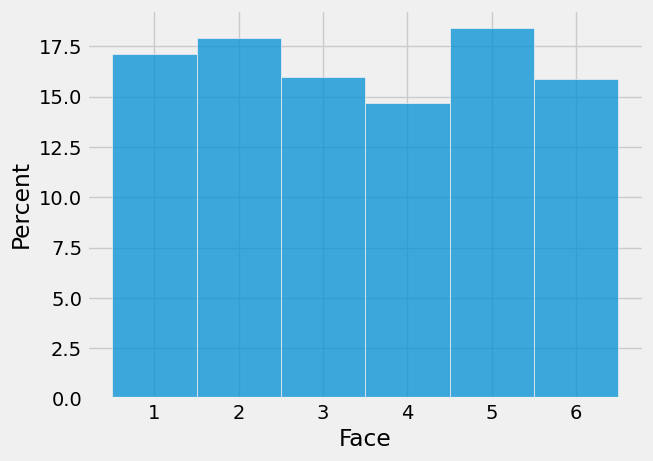

In [73]:
empirical_hist_die(1000)

Au fur et à mesure que nous augmentons le nombre de rouleaux dans la simulation, la surface de chaque barre se rapproche de 16,67 %, ce qui correspond à la surface de chaque barre dans l'histogramme des probabilités.

#### La loi des grands nombres

Ce que nous avons observé ci-dessus est un exemple d'une règle générale appelée 'loi des grands nombres' :

Si une expérience aléatoire est répétée indépendamment et dans des conditions identiques, alors, à long terme, la proportion de fois qu'un événement se produit se rapproche de plus en plus de la probabilité théorique de l'événement.

Par exemple, à long terme, la proportion de fois où la face à quatre points du dé apparaît se rapproche de plus en plus de 1/6.

Ici, 'indépendamment et dans des conditions identiques' signifie que chaque répétition est effectuée de la même manière, quels que soient les résultats de toutes les autres répétitions.

Dans ces conditions, la loi ci-dessus implique que si l'expérience aléatoire est répétée un grand nombre de fois, la proportion de fois qu'un événement se produit a de fortes chances d'être proche de la probabilité théorique de l'événement.

Nous reviendrons sur la loi des grands nombres dans le troisième cours.

#### Distribution empirique d'une statistique

##### Paramètre
On s'intéresse souvent à des quantités numériques associées à une population.
- Dans une population d'électeurs, quel pourcentage votera pour le candidat A ?
- Dans une population d'utilisateurs de Facebook, quel est le plus grand nombre d'amis Facebook que les utilisateurs ont ?
- Dans une population de vols United, quel est le retard médian au départ ?

Les quantités numériques associées à une population sont appelées *paramètres*. À titre d'exemple, nous allons étudier une population de retards de vols. La table `united` contient les données des vols domestiques de United Airlines au départ de San Francisco durant l'été 2015. Les données sont rendues publiques par le [Bureau of Transportation Statistics] (http://www.transtats.bts.gov/Fields.asp?Table_ID=293) du Département des transports des États-Unis.

Il y a 13 825 lignes, chacune correspondant à un vol. Les colonnes sont la date du vol, le numéro du vol, le code de l'aéroport de destination et le temps de retard au départ en minutes. Certains retards sont négatifs : ces vols sont partis plus tôt.

In [74]:
united = pandas.read_csv(path_data + '/united_summer2015.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


Dans ce qui suit, nous traitons les données du tableau uni comme des données provenant d'une population entière et nous supposons que nous n'observons qu'un petit échantillon aléatoire de cette population, disons de taille 1 000. Bien que dans ce cas nous ayons accès à l'ensemble des 13 825 points de données, cela nous permet d'explorer ce qui se passe dans le cas courant où une population est finie mais trop grande pour être entièrement observée. L'échantillon aléatoire est tiré parmi les individus d'une grande population.

Pour la population des vols dans `united`, nous connaissons la valeur du paramètre 'median delay' :

In [75]:
np.median(united['Delay'])

np.float64(2.0)

La fonction `NumPy` `median` renvoie la médiane d'un tableau. Parmi tous les vols de `united`, le retard médian était de 2 minutes. Cela signifie qu'environ 50% des vols de la population ont eu des retards de 2 minutes ou moins :

In [76]:
len(united[united['Delay'] <= 2]) / len(united)

0.5018444846292948

La moitié des vols sont partis au maximum 2 minutes après l'heure de départ prévue. C'est un retard très court !  

**Le pourcentage n'est pas exactement de 50 en raison des 'égalités', c'est-à-dire des vols qui ont eu un retard d'exactement 2 minutes. Il y a eu 480 vols de ce type. Les égalités sont assez courantes dans les ensembles de données et nous ne nous en préoccuperons pas dans ce cours.

In [77]:
len(united[united['Delay'] == 2])

480

##### Statistique
Dans de nombreuses situations, nous souhaitons déterminer la valeur d'un paramètre inconnu. Pour ce faire, nous nous appuierons sur les données d'un grand échantillon aléatoire tiré de la population.

Une *statistique* (notez le singulier !) est un nombre calculé à partir des données d'un échantillon. La médiane de l'échantillon est donc une statistique.

Instaurons une variable `sample_1000` contenant un échantillon aléatoire de 1000 vols de `united`.

In [78]:
sample_1000 = united.sample(1000, replace=True)

La valeur observée de la médiane de l'échantillon pour l'échantillon_1000 est :

In [79]:
np.median(sample_1000['Delay'])

np.float64(2.0)

Notre échantillon - un ensemble de 1 000 vols - nous a donné une valeur observée de la statistique. Cela soulève un important problème d'inférence :

**La statistique aurait pu être différente.**
Une considération fondamentale dans l'utilisation de toute statistique basée sur un échantillon aléatoire est que *l'échantillon aurait pu être différent*, et donc la statistique aurait pu être différente aussi.

In [80]:
np.median(united.sample(1000)['Delay'])

np.float64(3.0)

Exécutez la cellule ci-dessus plusieurs fois pour voir comment la réponse varie. Souvent, elle est égale à 2, soit la même valeur que le paramètre de population. Mais parfois, elle est différente.

**Une façon de répondre à cette question est de simuler la statistique plusieurs fois et de noter les valeurs.** Un histogramme de ces valeurs nous renseignera sur la distribution de la statistique.

Rappelons les principales étapes d'une simulation.

##### Simuler une statistique
Nous allons simuler la médiane de l'échantillon en utilisant les étapes que nous avons définies dans un chapitre précédent lorsque nous avons commencé à étudier la simulation. Vous pouvez remplacer la taille de l'échantillon de 1000 par n'importe quelle autre taille d'échantillon, et la médiane de l'échantillon par n'importe quelle autre statistique.

**Etape 1 : Décider de la statistique à simuler.** Nous avons déjà décidé que nous allions simuler la médiane d'un échantillon aléatoire de taille 1000 tiré de la population des retards de vols.

**Etape 2 : Définir une fonction qui renvoie une valeur simulée de la statistique.** Tirer un échantillon aléatoire de taille 1000 et calculer la médiane de l'échantillon. Nous l'avons fait dans la cellule de code ci-dessus. Le voici à nouveau, encapsulé dans une fonction.

In [81]:
def random_sample_median():
    return np.median(united.sample(1000, replace=True)['Delay'])

**Étape 3 : Déterminer le nombre de valeurs simulées à générer** Faisons 5 000 répétitions.

**Etape 4 : Utiliser une boucle `for` pour générer un tableau de valeurs simulées.** Comme d'habitude, nous commencerons par créer un tableau vide dans lequel nous collecterons nos résultats. Nous allons ensuite mettre en place une boucle `for` pour générer toutes les valeurs simulées. Le corps de la boucle consistera à générer une valeur simulée de la médiane de l'échantillon et à l'ajouter à notre tableau de collecte.

L'exécution de la simulation prend un temps considérable. En effet, elle effectue 5000 répétitions du processus de tirage d'un échantillon de taille 1000 et de calcul de sa médiane. Cela fait beaucoup d'échantillonnages et de répétitions !

In [82]:
medians = np.array([])

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

La simulation est terminée. Les 5 000 médianes des échantillons simulés ont été rassemblées dans le tableau `medians`. Il est maintenant temps de visualiser les résultats.

##### Visualisation

Voici les médianes des échantillons aléatoires simulés affichées dans le tableau `simulated_medians`.

In [83]:
simulated_medians = pandas.DataFrame({'Sample Median': medians})
simulated_medians

,Sample Median
0,3.0
1,4.0
2,2.0
3,3.0
4,3.0
...,...
4995,3.0
4996,2.0
4997,3.0
4998,3.0


Nous pouvons également visualiser les données simulées à l'aide d'un histogramme. L'histogramme est appelé *histogramme empirique de la statistique*. Il affiche la *distribution empirique* de la statistique. N'oubliez pas que *empirique* signifie *observé*.

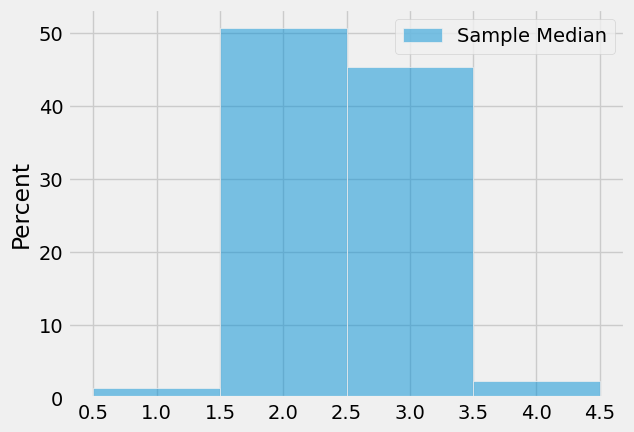

In [84]:
fig = seaborn.histplot(data=simulated_medians, bins=np.arange(0.5, 5, 1), stat='percent')

Vous pouvez constater que la médiane de l'échantillon est très probablement proche de 2, qui était la valeur de la médiane de la population. Étant donné que des échantillons de 1 000 retards de vols sont susceptibles de ressembler à la population des retards, il n'est pas surprenant que les retards médians de ces échantillons soient proches du retard médian de la population.

Cet exemple montre comment une statistique peut fournir une bonne estimation d'un paramètre.

##### Le pouvoir de la simulation

Si nous pouvions générer tous les échantillons aléatoires possibles de taille 1000, nous connaîtrions toutes les valeurs possibles de la statistique (la médiane de l'échantillon), ainsi que les probabilités de toutes ces valeurs. Nous pourrions visualiser toutes les valeurs et probabilités dans l'histogramme de probabilité de la statistique.

Mais dans de nombreuses situations, dont celle-ci, le nombre de tous les échantillons possibles est suffisamment important pour dépasser la capacité de l'ordinateur, et les calculs purement mathématiques des probabilités peuvent s'avérer extrêmement difficiles.

C'est là qu'interviennent les histogrammes empiriques.

Nous savons qu'en vertu de la loi des moyennes, l'histogramme empirique de la statistique est susceptible de ressembler à l'histogramme de probabilité de la statistique, si la taille de l'échantillon est importante et si vous répétez le processus d'échantillonnage aléatoire de nombreuses fois.

Cela signifie que la simulation répétée de processus aléatoires est un moyen d'approcher les distributions de probabilités *sans calculer mathématiquement les probabilités ni générer tous les échantillons aléatoires possibles*. Les simulations informatiques deviennent ainsi un outil puissant dans la science des données. Elles peuvent aider les scientifiques à comprendre les propriétés de quantités aléatoires qu'il serait difficile d'analyser autrement.

### L'échantillonnage aléatoire en Python

Cette section résume les méthodes d'échantillonnage aléatoire que vous avez apprises en utilisant Python et en présente une nouvelle.

#### Révision : Echantillonnage d'une population dans un tableau
Si vous échantillonnez une population d'individus dont les données sont représentées dans les lignes d'un tableau, vous pouvez utiliser la méthode Table `sample` pour [sélectionner aléatoirement des lignes] (https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html#id1) du tableau. En d'autres termes, vous pouvez utiliser `sample` pour sélectionner un échantillon aléatoire d'individus.

Par défaut, `sample` tire uniformément au hasard avec remplacement. Il s'agit d'un modèle naturel pour les expériences aléatoires telles que le lancer d'un dé.

In [85]:
faces = np.arange(1, 7)
die = pandas.DataFrame({'Face': faces})
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


Exécutez la cellule ci-dessous pour simuler 7 lancers de dé.

In [86]:
die.sample(7, replace=True)

,Face
3,4
4,5
3,4
3,4
5,6
2,3
0,1


Il est parfois plus naturel d'échantillonner des individus au hasard sans remplacement. C'est ce qu'on appelle un échantillon aléatoire simple. Ne pas spécifier l'argument `replace=True` vous permet de le faire.

In [87]:
actors = pandas.read_csv(path_data + '/actors.csv')
actors

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
...,...,...,...,...,...,...
45,Jeremy Renner,2500.3,21,119.1,The Avengers,623.4
46,Philip Seymour Hoffman,2463.7,40,61.6,Catching Fire,424.7
47,Sandra Bullock,2462.6,35,70.4,Minions,336.0
48,Chris Evans,2457.8,23,106.9,The Avengers,623.4


In [88]:
# Simple random sample of 5 rows
actors.sample(5)

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
41,Mark Wahlberg,2549.8,36,70.8,Transformers 4,245.4
10,Gary Oldman,3294.0,38,86.7,The Dark Knight,534.9
32,Emma Watson,2681.9,17,157.8,Harry Potter / Deathly Hallows (P2),381.0
23,Don Cheadle,2885.4,34,84.9,Avengers: Age of Ultron,459.0
49,Anne Hathaway,2416.5,25,96.7,The Dark Knight Rises,448.1


Puisque `sample` vous donne l'échantillon entier dans l'ordre dans lequel les lignes ont été sélectionnées, vous pouvez utiliser les méthodes Table sur le tableau échantillonné pour répondre à de nombreuses questions sur l'échantillon. Par exemple, vous pouvez trouver le nombre de fois où le dé a montré six taches, ou le nombre moyen de films dans lesquels les acteurs de l'échantillon sont apparus, ou si un ou deux acteurs spécifiés sont apparus dans l'échantillon. Vous pouvez avoir besoin de plusieurs lignes de code pour obtenir certaines de ces informations.

#### Review : Échantillonnage d'une population dans une matrice

Si vous échantillonnez une population d'individus dont les données sont représentées sous forme de tableau, vous pouvez utiliser la fonction NumPy `np.random.choice` pour [sélectionner aléatoirement des éléments du tableau] (https://inferentialthinking.com/chapters/09/3/Simulation.html#example-number-of-heads-in-100-tosses).

Par défaut, `np.random.choice` échantillonne au hasard avec remplacement.

In [89]:
# The faces of a die, as an array
faces

array([1, 2, 3, 4, 5, 6])

In [90]:
# 7 rolls of the die
np.random.choice(faces, 7)

array([2, 2, 4, 3, 1, 4, 4])

Ne pas spécifier `replace=True` vous permet d'obtenir un échantillon aléatoire simple, c'est-à-dire un échantillon tiré au hasard sans remplacement.

In [91]:
# Array of actor names
actor_names = actors['Actor']

In [92]:
# Simple random sample of 5 actor names
np.random.choice(actor_names, 5)

array(['Harrison Ford', 'Ian McKellen', 'Mark Wahlberg', 'Michael Caine',
       'Tom Cruise'], dtype=object)

Tout comme `sample`, `np.random.choice` vous donne la séquence entière des éléments échantillonnés. Vous pouvez utiliser les opérations sur les tableaux pour répondre à de nombreuses questions sur l'échantillon. Par exemple, vous pouvez trouver quel acteur a été le deuxième à être tiré au sort, ou le nombre de faces du dé qui sont apparues plus d'une fois. Certaines réponses peuvent nécessiter plusieurs lignes de code.

#### Échantillonnage à partir d'une distribution catégorielle
Parfois, nous nous intéressons à un attribut catégorique des individus échantillonnés. Par exemple, nous pouvons chercher à savoir si une pièce de monnaie tombe sur Pile ou Face. Ou nous pouvons nous intéresser aux partis politiques d'électeurs sélectionnés au hasard.

Dans ce cas, nous avons souvent besoin des proportions d'électeurs échantillonnés dans les différentes catégories. Si nous disposons de l'ensemble de l'échantillon, nous pouvons calculer ces proportions. La fonction `sample_proportions` défini ci-dessous fait ce travail pour nous. Elle est conçue pour un échantillonnage aléatoire avec remplacement à partir d'une distribution catégorielle et renvoie les proportions d'éléments échantillonnés dans chaque catégorie. À ce niveau, nous ne vous demandons pas de comprendre comment son code fonctionne. Cela ne vous empêchera pas de l'utiliser.

La fonction `sample_proportions` prend deux arguments :
- la taille de l'échantillon
- la distribution des catégories dans la population, sous la forme d'une liste ou d'un tableau de proportions dont la somme est égale à 1

Elle renvoie un tableau contenant la distribution des catégories dans un échantillon aléatoire de la taille donnée prélevé dans la population. Il s'agit d'un tableau composé des proportions de l'échantillon dans toutes les différentes catégories, dans l'ordre dans lequel elles apparaissent dans la distribution de la population.

Par exemple, supposons que chaque plante d'une espèce soit à fleurs rouges avec une chance de 25 %, à fleurs roses avec une chance de 50 % et à fleurs blanches avec une chance de 25 %, sans tenir compte de la couleur des fleurs de toutes les autres plantes. Vous pouvez utiliser `sample_proportions` pour voir les proportions des différentes couleurs parmi 300 plantes de l'espèce.

In [93]:
def sample_proportions(sample_size, probabilities):
    '''Return the proportion of random draws for each outcome in a distribution.

    This function is similar to np.random.Generator.multinomial, but returns proportions
    instead of counts.

    Args:
        ``sample_size``: The size of the sample to draw from the distribution.

        ``probabilities``: An array of probabilities that forms a distribution.

    Returns:
        An array with the same length as ``probability`` that sums to 1.
    '''
    rng = np.random.default_rng()
    return rng.multinomial(sample_size, probabilities) / sample_size

In [94]:
# Species distribution of flower colors:
# Proportions are in the order Red, Pink, White
species_proportions = [0.25, 0.5, .25]

sample_size = 300

# Distribution of sample
sample_distribution = sample_proportions(sample_size, species_proportions)
sample_distribution

array([0.25333333, 0.50666667, 0.24      ])

Comme vous vous y attendez, la somme des proportions de l'échantillon est égale à 1.

In [95]:
sum(sample_distribution)

np.float64(1.0)

Les catégories de `species_proportions` sont dans l'ordre Rouge, Rose, Blanc. Cet ordre est préservé par `sample_proportions`. Si vous souhaitez simplement connaître la proportion de plantes à fleurs roses dans l'échantillon, vous pouvez utiliser `[1]`, car les fleurs roses sont les deuxièmes dans la liste :

In [96]:
# Sample proportion of Heads
sample_distribution[1]

np.float64(0.5066666666666667)

Vous pouvez utiliser les opérations `sample_proportions` et les tableaux pour répondre à des questions basées uniquement sur les proportions des individus échantillonnés dans les différentes catégories. Vous ne pourrez pas répondre aux questions qui requièrent des informations plus détaillées sur l'échantillon, telles que les plantes échantillonnées qui possédaient chacune des différentes couleurs.

## 5. Test des hypothèses : premier contact

### Première étude de cas

Les scientifiques des données sont souvent confrontés à des questions de type 'oui-non' sur le monde. Vous avez vu quelques exemples de ces questions dans ce cours :

- Le chocolat est-il bon pour la santé ?
- L'eau de la pompe de Broad Street a-t-elle provoqué le choléra ?
- La démographie californienne a-t-elle évolué au cours de la dernière décennie ?

La réponse à ces questions dépend des données dont nous disposons. Les données de recensement concernant la Californie permettent de répondre à des questions démographiques avec pratiquement aucune incertitude quant à la réponse. Nous savons que l'eau de la pompe de Broad Street était contaminée par les déchets des victimes du choléra, et nous pouvons donc supposer qu'elle a causé le choléra.

La question de savoir si le chocolat ou tout autre traitement est bon pour vous devra très certainement être tranchée par des experts médicaux, mais une première étape consiste à utiliser la science des données pour analyser des données provenant d'études et d'expériences randomisées.

Dans ce chapitre, nous tenterons de répondre à des questions de ce type, en basant nos conclusions sur des échantillons aléatoires et des distributions empiriques.

#### Évaluer un modèle
En science des données, un *modèle* est un ensemble d'hypothèses sur les données. Souvent, les modèles comprennent des hypothèses sur les processus aléatoires utilisés pour générer les données.

Parfois, les scientifiques des données doivent décider si un modèle est bon ou non. Dans cette section, nous examinerons un exemple de décision de ce type.

#### Sélection du jury

La science des données peut être un outil puissant pour dénoncer le racisme et les inégalités dans notre société. Cette section traite d'une affaire dans laquelle les données ont fourni des preuves de partialité raciste dans la sélection des jurés.

L'amendement VI de la Constitution des États-Unis stipule que 'dans toutes les poursuites pénales, l'accusé jouira du droit à un procès rapide et public, par un jury impartial de l'État et du district où le crime aura été commis'.

L'une des caractéristiques d'un jury *impartial* est qu'il doit être sélectionné à partir d'un panel de jurés représentatif de la population de la région concernée. Un panel de jurés est un groupe de personnes choisies pour être des jurés potentiels. Le jury final du procès est sélectionné parmi eux par inclusion ou exclusion délibérée, et peut donc avoir n'importe quelle composition. Mais le panel plus large dont sont issus les jurés d'assises doit être représentatif de la population.

La question de savoir si un jury est effectivement représentatif de la population d'une région a une implication juridique importante. Si un groupe de la population était systématiquement sous-représenté au sein du jury, cela pourrait soulever la question de l'impartialité du jury et, partant, de la régularité de la procédure pour l'accusé.

C'est la question qui s'est posée dans l'affaire Robert Swain, un Noir condamné par la Cour suprême dans le comté de Talladega, en Alabama, en 1962. Il a fait appel de son inculpation jusqu'à la Cour suprême des États-Unis au motif que les Noirs étaient systématiquement exclus des jurys dans le comté de Talladega. La Cour suprême a rejeté son appel et Robert Swain a ensuite été condamné à la prison à vie.

Cependant, notre analyse ci-dessous montre que les données ne sont pas en accord avec les conclusions tirées par la Cour. Au contraire, les données indiquent un biais dans le processus de sélection des jurés. Cette partialité du système de justice pénale reflétait les préjugés et l'injustice généralisés à l'encontre des Noirs à l'époque.

Nous commencerons par examiner les détails numériques. Au moment du procès, seuls les hommes âgés de 21 ans ou plus pouvaient faire partie d'un jury dans le comté de Talladega. Dans cette population, 26 % des hommes étaient noirs. Comme c'est souvent le cas dans les procès avec jury, les jurés du procès de Robert Swain ont été sélectionnés à partir d'un panel de personnes censées être représentatives de la population des jurés éligibles. Or, seuls huit hommes parmi le panel de 100 hommes (soit 8 %) étaient noirs.

Dans le cadre de son appel, Robert Swain a remis en question cet écart. En outre, il a souligné que tous les jurys du comté de Talladega, au cours des dix dernières années, n'avaient compté qu'un faible pourcentage de Noirs.

La Cour suprême des États-Unis a examiné l'appel et a conclu que 'la disparité globale en termes de pourcentage était faible'. Mais cette affirmation était-elle raisonnable ? Si les jurés étaient sélectionnés au hasard parmi la population éligible du comté, il y aurait une certaine variation due au hasard. On n'obtiendrait pas exactement 26 jurés noirs sur chaque panel de 100 personnes. Mais s'attendrait-on à ce qu'il y en ait aussi peu que huit ?

La réponse est non. Nous allons l'établir et discuter ensuite de certains des nombreux biais impliqués.

#### Un modèle de sélection aléatoire

Une vision des données - un modèle, en d'autres termes - est que le panel a été sélectionné au hasard et qu'il s'est retrouvé avec un petit nombre de panélistes noirs par le simple fait du hasard.

Étant donné que le jury était censé ressembler à la population de tous les jurés éligibles, il est important d'évaluer le modèle de sélection aléatoire. Voyons s'il résiste à un examen approfondi.

Le modèle précise les détails d'un processus aléatoire. Il indique que les données sont comparables à un échantillon aléatoire d'une population dont 26 % des membres sont noirs. Nous sommes bien placés pour évaluer ce modèle pour les raisons suivantes.

- Nous pouvons simuler des données sur la base du modèle. En d'autres termes, nous pouvons simuler un tirage au sort au sein d'une population dont 26 % des membres sont noirs.
- Notre simulation montrera à quoi ressemblerait un panel ***si*** il était sélectionné au hasard.
- Nous pouvons ensuite comparer les résultats de la simulation avec la composition d'un jury réel.
- Si les résultats de notre simulation ne correspondent pas à la composition du jury lors du procès, cela constituera une preuve contre le modèle de sélection aléatoire. Par conséquent, il s'agira d'une preuve contre l'équité du procès.

Examinons le processus étape par étape.

#### La statistique
Tout d'abord, nous devons choisir une statistique à simuler. La statistique doit pouvoir nous aider à choisir entre le modèle et d'autres points de vue sur les données. Le modèle dit que le panel a été tiré au sort parmi la population éligible. Le point de vue alternatif est le cas de Robert Swain, à savoir que le panel contenait trop peu de panélistes noirs pour avoir été tiré au sort. Une statistique naturelle est donc le nombre de panélistes noirs dans l'échantillon. De petites valeurs de la statistique favoriseront le point de vue de Robert Swain.

#### Simulation de la statistique dans le cadre du modèle
Si le modèle était vrai, quelle serait la taille typique de la statistique ? Pour répondre à cette question, nous allons simuler la statistique sous l'hypothèse d'une sélection aléatoire et examiner la distribution des résultats.

##### Simulation d'une valeur de la statistique

Nous pouvons utiliser `sample_proportions` pour simuler une valeur de la statistique. La taille de l'échantillon est de 100, soit la taille du panel. La distribution à partir de laquelle nous allons échantillonner est la distribution dans la population des jurés éligibles. Puisque 26% d'entre eux étaient noirs, nous échantillonnerons à partir de la distribution spécifiée par les proportions [0.26, 0.74].

In [97]:
sample_size = 100
eligible_population = [0.26, 0.74]

Les catégories dans le tableau de sortie de `sample_proportions` sont dans le même ordre que dans le tableau d'entrée. Ainsi, la proportion de jurés noirs dans l'échantillon aléatoire est `[0]` du tableau de sortie. Exécutez la cellule ci-dessous plusieurs fois pour voir comment la proportion de jurés noirs varie dans un panel sélectionné au hasard. Voyez-vous des valeurs aussi basses que 0,08 ?

In [98]:
sample_proportions(sample_size, eligible_population)[0]

np.float64(0.28)

L'effectif de chaque catégorie est égal à la taille de l'échantillon multipliée par la proportion correspondante. Nous pouvons donc tout aussi bien simuler des effectifs au lieu de proportions.

Définissons une fonction à cet effet. La fonction tirera un panel au hasard et renverra le nombre de panélistes noirs.

In [99]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population)[0]

#### Simulation de plusieurs valeurs de la statistique ###

Notre analyse se concentre sur la variabilité des comptages. Générons 10 000 valeurs simulées de l'effectif et voyons comment elles varient. Comme d'habitude, nous utiliserons une boucle `for` et rassemblerons tous les comptages simulés dans un tableau.

In [100]:
counts = np.array([])
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

#### La prédiction dans le cadre du modèle de sélection aléatoire
Pour interpréter les résultats de notre simulation, nous pouvons les visualiser sous la forme d'un histogramme empirique des effectifs simulés.

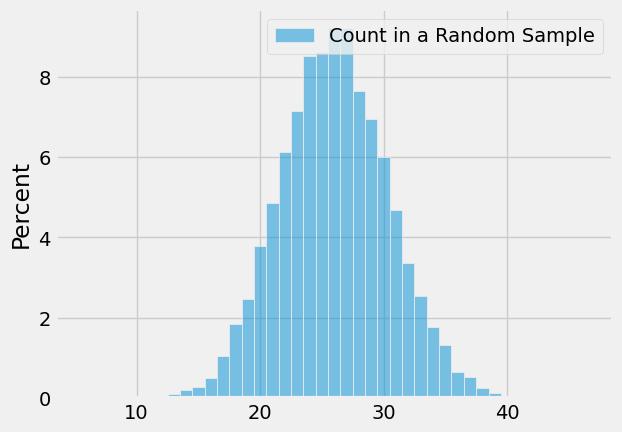

In [101]:
fig = seaborn.histplot(data=pandas.DataFrame({'Count in a Random Sample': counts}),
                       bins = np.arange(5.5, 46.6, 1), stat='percent')

L'histogramme nous montre ce que le modèle de sélection aléatoire prévoit pour notre statistique, le nombre de panélistes noirs dans l'échantillon.

Pour générer chaque nombre simulé, nous avons tiré 100 fois au hasard dans une population dont 26 % des membres sont noirs. Ainsi, comme on peut s'y attendre, la plupart des chiffres simulés se situent autour de 26. Ils ne sont pas exactement 26 : il y a une certaine variation. Les chiffres vont d'environ 15 à environ 40.

#### Comparaison entre la prédiction et les données
Dans le panel sélectionné pour l'essai, il y avait huit panélistes noirs. L'histogramme des nombres simulés est redessiné ci-dessous, la valeur huit étant représentée par un point rouge sur l'axe horizontal. Le point est très éloigné dans la queue gauche de l'histogramme. Sur les 10 000 comptages simulés par sélection aléatoire, très peu se sont révélés être de huit ou moins.

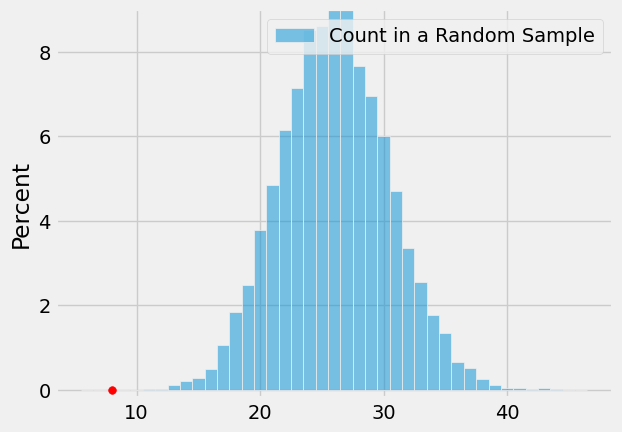

In [102]:
fig = seaborn.histplot(data=pandas.DataFrame({'Count in a Random Sample': counts}),
                       bins = np.arange(5.5, 46.6, 1), stat='percent')
plots.ylim(-0.2, 9)
plots.scatter(8, 0, color='red', s=30);

#### Conclusion de l'analyse des données

Le graphique ci-dessus est une représentation visuelle du biais dans le processus de sélection. Il montre que si nous sélectionnons un panel de 100 personnes au hasard dans la population éligible, il est très peu probable que nous obtenions un nombre de panélistes noirs aussi faible que les huit observés dans le panel lors de l'essai.

Cela prouve que le modèle de sélection aléatoire des jurés dans le panel n'est pas cohérent avec les données du panel. Bien qu'il soit *possible* que le panel ait été généré par hasard, notre simulation démontre que c'est extrêmement improbable.

La réalité du panel du procès ne correspond pas du tout à l'hypothèse du modèle de sélection aléatoire de la population éligible. Lorsque les données et un modèle sont incohérents, le modèle est difficile à justifier. Après tout, les données sont réelles. Le modèle n'est qu'un ensemble d'hypothèses. Lorsque les hypothèses ne correspondent pas à la réalité, nous devons les remettre en question.

Par conséquent, la conclusion la plus raisonnable est que l'hypothèse de la sélection aléatoire n'est pas justifiée pour ce jury. En d'autres termes, la conclusion la plus raisonnable est que le jury n'a pas été sélectionné par échantillonnage aléatoire à partir de la population des jurés éligibles. Nonobstant l'avis de la Cour suprême, la différence entre 26 % et 8 % n'est pas si faible qu'elle puisse être expliquée par le seul hasard.

#### Biais statistique

L'analyse ci-dessus fournit des preuves quantitatives de l'iniquité du procès de Robert Swain. Les données soutiennent sa position selon laquelle il n'a pas pu bénéficier du jury impartial auquel il avait droit en vertu de la Constitution américaine.

D'autres données montrent que l'exclusion des membres noirs du jury était généralisée. L'arrêt de la Cour suprême, rédigé en 1965, inclut des preuves fournies par Robert Swain selon lesquelles 'seuls 10 à 15 % des [...] jurys tirés de l'urne depuis 1953 étaient [noirs], le pourcentage atteignant 23 % dans un seul cas'. Regardez où se situent 10 % et 15 % sur l'axe horizontal de l'histogramme ci-dessus. De telles valeurs sont également très peu probables dans le cadre d'une sélection aléatoire au sein de la population éligible.

Lorsqu'un processus produit des erreurs qui vont systématiquement dans une direction - comme le fait que le pourcentage de panélistes noirs soit toujours plus faible que prévu - les spécialistes des données disent que le processus est *biaisé*. La quantification de ces biais est une responsabilité importante de la science des données.

Des arguments tels que celui présenté dans cette section sont aujourd'hui plus fréquemment présentés devant les tribunaux. Dans les années 1960, la Cour suprême a examiné les données, mais a tiré la conclusion erronée que 'la disparité globale en pourcentage a été faible'. En ce qui concerne le sens du mot 'faible', il était erroné de s'appuyer sur ce qui semblait simplement raisonnable à la majorité de la Cour. Les opinions sur ce qui est raisonnable ne sont pas seulement purement subjectives, elles sont également vulnérables à l'influence des préjugés raciaux omniprésents. Si les arguments dans l'affaire avaient inclus l'analyse quantitative de cette section, la Cour n'aurait peut-être pas conclu que la disparité en pourcentage était faible.

#### Préjugés racistes
Le biais statistique dans le processus de sélection est né des préjugés racistes profondément ancrés dans le système juridique de l'époque.

Par exemple, l'arrêt de la Cour suprême indique que les jurés du comté de Talladega ont été sélectionnés à partir d'une liste de noms que les commissaires au jury ont obtenue à partir 'd'annuaires municipaux, de listes d'inscription, de listes de clubs et d'églises, de conversations avec d'autres personnes de la communauté, blanches et [non blanches], et de connaissances personnelles et professionnelles'. Ce processus était clairement biaisé au détriment des Noirs et en faveur des personnes appartenant aux cercles sociaux et professionnels des commissaires. Cette exclusion systématique des Noirs des listes de jurés a eu pour conséquence que très peu de Noirs ont été sélectionnés pour faire partie des jurys.

Même lorsqu'il y avait des Noirs dans les jurys, ils n'étaient généralement pas retenus dans le jury final. Sur les huit Noirs présents dans le jury de Robert Swain, deux ont été excusés et six ont été éliminés par l'accusation dans le cadre d'une procédure appelée 'récusation péremptoire'. Dans le cadre de cette procédure, les avocats des deux parties pouvaient exclure ou 'rayer' un certain nombre de membres du jury sans donner de raison.

L'argument de l'injustice des récusations péremptoires a constitué une part importante de l'appel de Robert Swain. Il a noté que 'les procureurs ont constamment et systématiquement exercé leurs récusations pour empêcher tous les membres noirs du jury de faire partie du jury lui-même'. La Cour a reconnu qu'il n'y avait jamais eu de juré noir dans une affaire civile ou pénale dans le comté de Talladega. Elle a néanmoins rejeté le recours.

Les préjugés racistes dans le système judiciaire découlent des préjugés de la société. Les préjugés et l'injustice à l'égard des Noirs ont été si répandus pendant si longtemps que, dans de nombreuses parties de la société, ils sont devenus une façon presque normale de penser et d'agir. En tant que membres de la société, les juges de la Cour suprême n'étaient pas à l'abri de ces préjugés. La majorité de la Cour a présenté sa décision comme l'interprétation la plus appropriée et la plus logique de la loi. Mais ce n'est pas le cas. La décision de la Cour sur les récusations péremptoires a finalement été renversée après des batailles juridiques qui ont duré 20 ans.

Robert Swain s'est battu contre un système de justice pénale qui lui était défavorable. Nous avons pu exposer ici un seul aspect des préjugés et du racisme systémiques auxquels il a été confronté et contre lesquels tant d'autres Noirs se sont battus. Pour beaucoup, ce combat se poursuit encore aujourd'hui. Nous pensons que la science des données peut être un allié puissant.

#### Lectures complémentaires

Robert Swain a été représenté devant la Cour suprême des États-Unis par [Constance Baker Motley] (https://en.wikipedia.org/wiki/Constance_Baker_Motley), la première femme afro-américaine à plaider une affaire devant cette Cour. Elle a plaidé 10 affaires devant la Cour suprême et n'en a perdu qu'une seule, celle de Robert Swain en 1965.

[Thurgood Marshall] (https://en.wikipedia.org/wiki/Thurgood_Marshall), qui est devenu en 1967 le premier juge afro-américain de la Cour suprême, avait étudié la décision de la Cour dans l'affaire Robert Swain et insisté sur la nécessité d'éliminer les récusations péremptoires fondées uniquement sur l'ethnie. C'est ce qu'a fait la Cour suprême en 1986 dans l'affaire [Batson v. Kentucky] (https://supreme.justia.com/cases/federal/us/476/79/).

Mais Marshall s'interrogeait sur l'efficacité de la décision Batson. Il s'attendait à ce que certaines équipes juridiques la contournent en trouvant des moyens ostensiblement neutres sur le plan racial d'exclure les jurés noirs. Dans son [avis] (https://supreme.justia.com/cases/federal/us/476/79/#tab-opinion-1956655) concordant avec la majorité de la Cour, il a recommandé d'aller plus loin et d'interdire complètement les récusations péremptoires. Sa conclusion est la suivante : 'J'applaudis la décision de la Cour selon laquelle l'utilisation racialement discriminatoire des récusations péremptoires viole la clause de protection égale, et je me joins à l'avis de la Cour. Toutefois, ce n'est qu'en interdisant totalement les récusations péremptoires que l'on pourra mettre fin à cette discrimination'. Les préoccupations de Thurgood Marshall étaient prémonitoires, comme vous le verrez dans certaines des lectures ci-dessous.

En 2013, Constance Baker Motley a reçu à titre posthume une [médaille d'or du Congrès] (https://www.congress.gov/bill/113th-congress/house-bill/3097/text?r=5&s=1) 'en reconnaissance de ses contributions et services durables aux États-Unis'. À l'appui de cette distinction, les membres de la Chambre des représentants ont écrit : 'La seule défaite de Constance Baker Motley devant la Cour suprême des États-Unis était dans l'affaire Swain v. Alabama, 380 U.S. 202 (1965), une affaire dans laquelle la Cour a refusé d'interdire les récusations péremptoires fondées sur la race dans les affaires impliquant des accusés afro-américains et qui a ensuite été renversée dans l'affaire Batson v. Kentucky, 476 U.S. 79 (1986), pour des motifs qui avaient été largement invoqués par Constance Baker Motley dans l'affaire Swain.'

Thurgood Marshall et Constance Baker Motley avaient d'autres liens. Par exemple, lorsqu'elle était étudiante à la faculté de droit de Columbia, Constance Baker Motley a travaillé comme auxiliaire juridique pour Thurgood Marshall. Quelques années plus tard, elle a rédigé la plainte initiale dans l'affaire Brown v. Board of Education à Topeka, qui a fait date en matière de droits civils et qui a été gagnée par Thurgood Marshall en 1954.

Le [NAACP Legal Defense and Educational Fund] (https://www.naacpldf.org/) a défendu Robert [Swain's case] (https://www.naacpldf.org/press-release/ldf-marks-anniversary-of-batson-decision-reaffirms-importance-of-impartial-jury-selection/) et a ensuite soutenu l'affaire Batson.

Malgré la décision Batson, les préjugés racistes persistent dans la sélection des jurés. Le juriste et ancien élève de la Berkeley Law School [Richard L. Harris Jr.] (https://www.thehistorymakers.org/biography/robert-lewis-harris) a fourni un [compte rendu détaillé] (https://scholarship.law.wm.edu/cgi/viewcontent.cgi?article=1944&context=wmlr) des préjugés perpétués par les récusations péremptoires.  

Dans leur rapport de 2020 [Whitewashing the Jury Box](http://www.clrc.ca.gov/CRPC/Pub/Panelist_Materials/PM-20210325-Semel.pdf) : How California Perpetuates the Discriminatory Exclusion of Black and Latinx Jurors (Comment la Californie perpétue l'exclusion discriminatoire des jurés noirs et latinos),
(https://www.law.berkeley.edu/our-faculty/faculty-profiles/elisabeth-semel/) et ses coauteurs de la Berkeley Law Death Penalty Clinic décrivent comment les préoccupations de Thurgood Marshall concernant l'efficacité de l'arrêt Batson sont justifiées par l'expérience des tribunaux californiens.  

Le [jugement] (https://supreme.justia.com/cases/federal/us/380/202/) de la Cour suprême des États-Unis dans l'affaire Swain v. Alabama peut être pénible à lire. Nous l'avons inclus parce que certains extraits sont cités dans la section.

### Test d'hypothèses avec plus de deux catégories (facultatif)

La question de savoir si les jurys sont représentatifs de la population éligible reste importante. Nous l'aborderons dans le contexte de jurys plus récents que celui de Robert Swain dans les années 1960.

Le processus général d'évaluation sera le même que précédemment. Mais cette fois-ci, nous prendrons en considération des panélistes appartenant à plusieurs catégories raciales et ethniques, et non pas seulement à deux d'entre elles. D'un point de vue technique, cela signifie que nous devrons trouver une nouvelle statistique à simuler. Une fois que nous l'aurons simulée et que nous serons parvenus à une conclusion, nous examinerons certaines des causes sous-jacentes des écarts que nous observons.

#### Sélection du jury dans le comté d'Alameda

En 2010, l'American Civil Liberties Union (ACLU) of Northern California a présenté un [rapport] (https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf 'ACLU_NC report') sur la sélection des jurés dans le comté d'Alameda, en Californie. Ce rapport conclut que certains groupes raciaux et ethniques sont sous-représentés parmi les jurés du comté d'Alameda, et suggère certaines réformes de la procédure d'affectation des jurés éligibles aux jurys. Dans cette section, nous analyserons les données fournies par l'ACLU.

Comme vous l'avez vu dans la section précédente, les jurés d'assises sont sélectionnés à partir d'un panel de jurés plus large. Selon la loi, le panel de jurés est censé être représentatif de la population des jurés éligibles. En Californie, le mot 'représentatif' est clairement défini comme 'sélectionné au hasard'. L'article 197 du code de procédure civile de Californie stipule que 'toutes les personnes sélectionnées pour faire partie d'un jury doivent être choisies au hasard, à partir d'une ou de plusieurs sources comprenant un échantillon représentatif de la population de la région desservie par le tribunal'.

Ici, 'sélectionné pour faire partie d'un jury' signifie être sélectionné pour faire partie du panel de jurés.

#### Composition des panels dans le comté d'Alameda

L'étude menée par l'ACLU de Californie du Nord portait sur la composition raciale et ethnique des jurys dans le comté d'Alameda. L'ACLU a compilé des données sur la composition des jurys dans 11 procès pour crime dans le comté d'Alameda en 2009 et 2010. Dans ces jurys, le nombre total de personnes qui se sont présentées pour faire partie du jury était de 1453. L'ACLU a recueilli des données démographiques sur tous ces jurés prospectifs et les a comparées à la composition de tous les jurés éligibles dans le comté.

Les données sont présentées ci-dessous dans un tableau intitulé `jury`. Dans chaque catégorie, la première valeur numérique est la proportion de tous les candidats jurés éligibles dans cette catégorie. La deuxième valeur est la proportion de personnes appartenant à cette catégorie parmi celles qui se sont présentées au processus de sélection du jury.

Les intitulés des différentes catégories sont tirés du rapport de l'ACLU, qui précise que 'la catégorie 'autre' comprend les personnes qui s'identifient comme des métis sans identifier une identité raciale principale, et les personnes qui n'ont pas identifié de race ou d'ethnicité'. L'étiquette 'Asiatique/PI' signifie 'Asiatique ou insulaire du Pacifique'. L'étiquette 'Noir/AA' signifie 'Noir ou Afro-Américain'.

In [103]:
jury = pandas.DataFrame({
    'Ethnicity': ['Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'],
    'Eligible': [0.15, 0.18, 0.54, 0.12, 0.01],
    'Panels': [0.26, 0.08, 0.54, 0.08, 0.04]
})

jury

,Ethnicity,Eligible,Panels
0,Asian/PI,0.15,0.26
1,Black/AA,0.18,0.08
2,Caucasian,0.54,0.54
3,Hispanic,0.12,0.08
4,Other,0.01,0.04


Certaines ethnies sont surreprésentées et d'autres sont sous-représentées dans les jurys de l'étude. En particulier, les membres des catégories Noirs/AA et Hispaniques sont sous-représentés.

Un diagramme à barres permet de visualiser les différences.

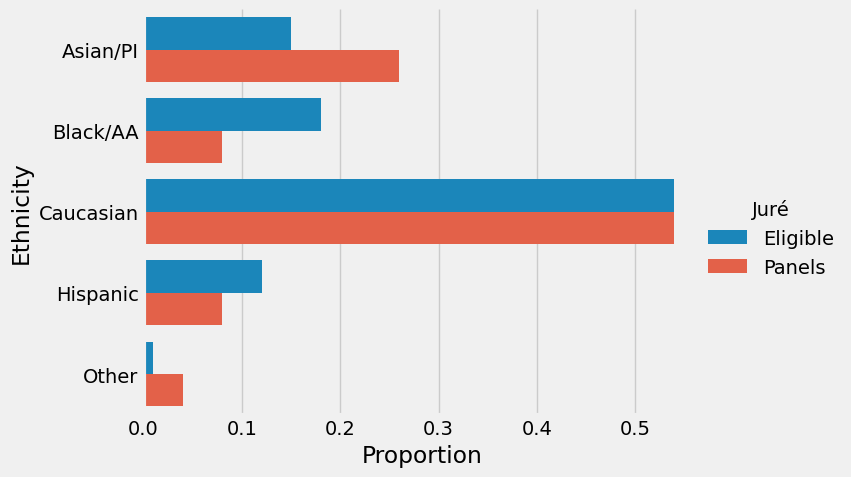

In [104]:
fig = seaborn.catplot(data=pandas.melt(jury, id_vars='Ethnicity', var_name='Juré', value_name='Proportion'), 
                      x='Proportion', y='Ethnicity', hue='Juré', kind='bar', aspect=1.5)

#### Comparaison avec des panels sélectionnés au hasard
Que se passe-t-il si nous sélectionnons un échantillon aléatoire de 1 453 personnes dans la population des jurés éligibles ? La répartition de leurs origines ethniques ressemblera-t-elle à la répartition des panels ci-dessus ?

Nous pouvons répondre à ces questions en utilisant `sample_proportions` et en ajoutant au tableau `jury` une colonne des proportions de notre échantillon.

**Les échantillons aléatoires de jurés potentiels sont sélectionnés sans remplacement. Cependant, lorsque la taille d'un échantillon est petite par rapport à la taille de la population, l'échantillonnage sans remplacement ressemble à l'échantillonnage avec remplacement ; les proportions dans la population ne changent pas beaucoup entre les tirages. La population des jurés éligibles dans le comté d'Alameda s'élève à plus d'un million de personnes et, par rapport à cette population, un échantillon d'environ 1 500 personnes est assez petit. Nous allons donc procéder à un échantillonnage avec remplacement.**

Dans la cellule ci-dessous, nous échantillonnons au hasard 1453 fois la distribution des jurés éligibles et nous affichons la distribution de l'échantillon aléatoire ainsi que les distributions des jurés éligibles et du panel dans les données.

In [105]:
eligible_population = jury['Eligible']
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.assign(Random_Sample=sample_distribution)
panels_and_sample

,Ethnicity,Eligible,Panels,Random_Sample
0,Asian/PI,0.15,0.26,0.144529
1,Black/AA,0.18,0.08,0.176875
2,Caucasian,0.54,0.54,0.555403
3,Hispanic,0.12,0.08,0.112182
4,Other,0.01,0.04,0.011012


La distribution de l'échantillon aléatoire est assez proche de la distribution de la population éligible, contrairement à la distribution des panels. Comme toujours, la visualisation est utile.

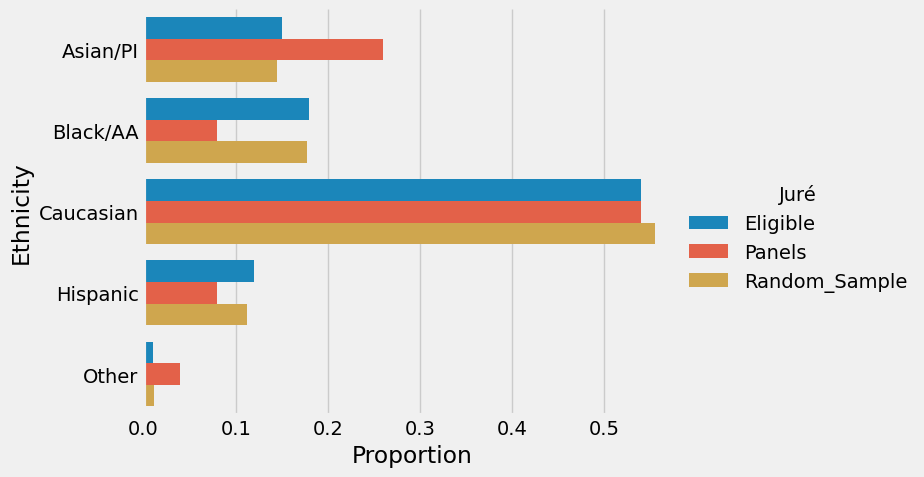

In [106]:
fig = seaborn.catplot(data=pandas.melt(panels_and_sample, id_vars='Ethnicity', var_name='Juré', value_name='Proportion'), 
                      x='Proportion', y='Ethnicity', hue='Juré', kind='bar', aspect=1.5)

Le diagramme à barres montre que la distribution de l'échantillon aléatoire ressemble à la population éligible, mais pas celle des panels.

Pour déterminer si cette observation est propre à un échantillon aléatoire ou si elle est plus générale, nous pouvons simuler plusieurs panels selon le modèle de sélection aléatoire et voir ce que les simulations prédisent. Mais nous ne pourrons pas examiner des milliers de diagrammes à barres comme celui ci-dessus. Nous avons besoin d'une statistique qui nous aidera à évaluer si le modèle de sélection aléatoire est étayé par les données.

#### Une nouvelle statistique : la distance entre deux distributions
Nous savons comment mesurer la différence entre deux nombres : si les nombres sont $x$ et $y$, la distance entre eux est $\vert x-y \vert$. Nous devons maintenant quantifier la distance entre deux distributions. Par exemple, nous devons mesurer la distance entre les distributions bleue et rouge ci-dessous.

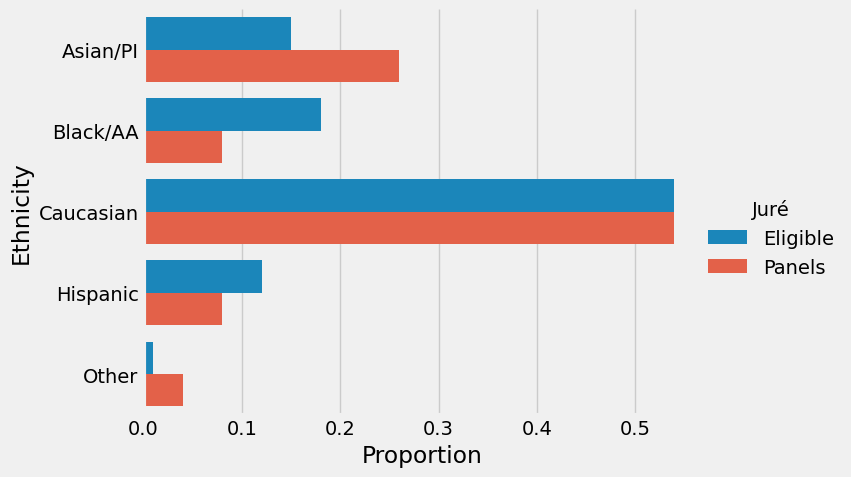

In [107]:
fig = seaborn.catplot(data=pandas.melt(jury, id_vars='Ethnicity', var_name='Juré', value_name='Proportion'), 
                      x='Proportion', y='Ethnicity', hue='Juré', kind='bar', aspect=1.5)

Pour ce faire, nous allons calculer une quantité appelée 'distance de variation totale' entre deux distributions. Le calcul est une extension de la méthode utilisée pour trouver la distance entre deux nombres.

Pour calculer la distance de variation totale, nous commençons par trouver la différence entre les deux proportions dans chaque catégorie.

In [108]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.assign(
    Difference=jury['Panels'] - jury['Eligible']
)
jury_with_diffs

,Ethnicity,Eligible,Panels,Difference
0,Asian/PI,0.15,0.26,0.11
1,Black/AA,0.18,0.08,-0.10
2,Caucasian,0.54,0.54,0.00
3,Hispanic,0.12,0.08,-0.04
4,Other,0.01,0.04,0.03


Examinez la colonne 'Différence' et remarquez que la somme de ses entrées est de 0 : les entrées positives totalisent 0,14, ce qui annule exactement le total des entrées négatives, qui est de -0,14.

Il s'agit d'une preuve numérique du fait que, dans le diagramme à barres, les barres rouges dépassent les barres bleues d'exactement autant que les barres bleues dépassent les barres rouges. La somme des proportions dans chacune des deux colonnes 'Panneaux' et 'Éligibles' est égale à 1, de sorte que la somme de leurs entrées doit être égale à 0.

Pour éviter l'annulation, nous supprimons les signes négatifs et additionnons toutes les entrées. Mais cela nous donne deux fois le total des entrées positives (de manière équivalente, deux fois le total des entrées négatives, avec le signe enlevé). Nous n'avons pas besoin de ce doublement, nous divisons donc la somme par 2.

In [109]:
jury_with_diffs['Absolute Difference'] = np.abs(jury_with_diffs['Difference'])
jury_with_diffs

,Ethnicity,Eligible,Panels,Difference,Absolute Difference
0,Asian/PI,0.15,0.26,0.11,0.11
1,Black/AA,0.18,0.08,-0.10,0.10
2,Caucasian,0.54,0.54,0.00,0.00
3,Hispanic,0.12,0.08,-0.04,0.04
4,Other,0.01,0.04,0.03,0.03


In [110]:
jury_with_diffs['Absolute Difference'].sum() / 2

np.float64(0.14)

Cette quantité de 0,14 est la *distance de variation totale* (DVT) entre la distribution des ethnies dans la population des jurés éligibles et la distribution dans les panels.

En général, la distance de variation totale entre deux distributions mesure à quel point les distributions sont proches. Plus la DVT est grande, plus les deux distributions semblent différentes.

**Nous aurions pu obtenir le même résultat en ajoutant simplement les différences positives. Mais notre méthode, qui consiste à inclure toutes les différences absolues, élimine la nécessité de savoir quelles différences sont positives et lesquelles ne le sont pas.**

Nous utiliserons la distance de variation totale entre les distributions comme statistique à simuler dans l'hypothèse d'une sélection aléatoire. De grandes valeurs de la distance seront la preuve que la sélection aléatoire n'a pas lieu d'être.

#### Simulation de la statistique dans le cadre du modèle
Pour voir comment le DVT varie d'un échantillon aléatoire à l'autre, nous allons le simuler à plusieurs reprises dans le cadre du modèle de sélection aléatoire de la population éligible.

Organisons nos calculs. Puisque nous allons calculer la distance de variation totale de façon répétée, nous allons d'abord écrire une fonction qui la calcule pour deux distributions données.

La fonction `total_variation_distance` prend deux tableaux contenant les distributions à comparer, et renvoie la DVT entre elles.

In [111]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

Cette fonction nous aidera à calculer notre statistique à chaque répétition de la simulation. Mais vérifions d'abord qu'elle donne la bonne réponse lorsque nous l'utilisons pour calculer la distance entre les distributions bleue (éligible) et or (panneaux) ci-dessus. Il s'agit de la distribution de l'étude de l'ACLU.

In [112]:
total_variation_distance(jury['Panels'], jury['Eligible'])

0.14

Cela correspond à la valeur que nous avons calculée directement sans utiliser la fonction.

Dans la cellule ci-dessous, nous utilisons la fonction pour calculer la DVT entre les distributions des jurés éligibles et un échantillon aléatoire. Rappelons que `eligible_population` est le tableau contenant la distribution des jurés éligibles, et que la taille de notre échantillon est de 1453.

Dans la première ligne, nous utilisons `sample_proportions` pour générer un échantillon aléatoire à partir de la population éligible. Dans la ligne suivante, nous utilisons `total_variation_distance` pour calculer la DVT entre les distributions de l'échantillon aléatoire et de la population éligible.

In [113]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.006083964211975181

Exécutez la cellule plusieurs fois et remarquez que les distances sont nettement inférieures à 0,14, la distance entre la distribution des panels et les jurés éligibles.

Nous sommes maintenant prêts à effectuer une simulation pour évaluer le modèle de sélection aléatoire.

#### Simulation d'une valeur de la statistique
De la même manière que nous commençons chaque simulation, définissons une fonction `one_simulated_DVT` qui renvoie une valeur simulée de la distance de variation totale sous l'hypothèse d'une sélection aléatoire.

Le code dans le corps de la définition est basé sur la cellule ci-dessus.

In [114]:
# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_DVT():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)   

#### Simulation de plusieurs valeurs de la statistique
Nous pouvons maintenant appliquer le processus familier d'utilisation d'une boucle `for` pour créer un tableau composé de 5000 distances de ce type.

In [115]:
DVTs = np.array([])
repetitions = 5000
for i in np.arange(repetitions):
    DVTs = np.append(DVTs, one_simulated_DVT())

#### Évaluation du modèle de sélection aléatoire

Voici l'histogramme empirique des distances simulées. Il montre que si vous tirez 1453 panélistes au hasard dans la réserve de candidats éligibles, la distance entre les distributions des panélistes et de la population éligible est rarement supérieure à environ 0,05.

Les panels de l'étude n'étaient toutefois pas aussi semblables à la population éligible. La distance de variation totale entre les panels et la population était de 0,14, représentée par le point rouge sur l'axe horizontal. Elle se situe bien au-delà de la queue de l'histogramme et ne ressemble pas du tout à une distance typique entre les distributions d'un échantillon aléatoire et la population éligible.

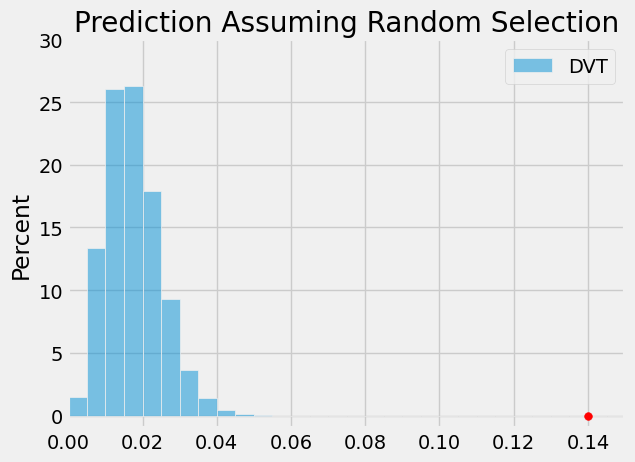

In [116]:
seaborn.histplot(data=pandas.DataFrame({'DVT': DVTs}), bins=np.arange(0, 0.2, 0.005), stat='percent')

# Plotting parameters; you can ignore this code
plots.title('Prediction Assuming Random Selection')
plots.xlim(0, 0.15)
plots.ylim(-1, 30)
plots.scatter(0.14, 0, color='red', s=30);

La simulation montre que la composition des panels dans l'étude de l'ACLU n'est pas cohérente avec le modèle de sélection aléatoire. Notre analyse soutient la conclusion de l'ACLU selon laquelle les panels n'étaient pas représentatifs de la distribution prévue pour les jurés éligibles.

#### Raisons du biais
Comme la plupart des analyses de ce type, la nôtre ne dit pas *pourquoi* les distributions sont différentes. Mais il est important de comprendre ces raisons. Si les jurys ne représentent pas la population des jurés éligibles, cela peut avoir un effet majeur sur les droits de la défense et l'équité des procès devant jury.

Le rapport de l'ACLU examine plusieurs raisons possibles de ces divergences et propose des solutions. Certaines sont purement pratiques mais ont un impact important. Par exemple, alors que nous pouvons considérer comme acquise la qualité de l'échantillonnage aléatoire en Python, la sélection du jury s'est faite à l'aide d'un autre logiciel. L'examen de l'ACLU a révélé que le logiciel ne fonctionnait pas bien, contribuant ainsi à une sélection biaisée. L'utilisation d'un meilleur logiciel est une solution évidente.

Plus important encore, les jurys du comté d'Alameda ne sont pas sélectionnés parmi l'ensemble de la population éligible. Le [site web] (http://www.alameda.courts.ca.gov/pages.aspx/faqs) de la Cour supérieure du comté d'Alameda indique que 'l'objectif de la Cour est de fournir un échantillon représentatif de la population du comté. Les noms des jurés sont choisis au hasard parmi toutes les personnes inscrites sur les listes électorales et/ou possédant un permis de conduire ou une carte d'identité délivrée par le département des véhicules à moteur'.

Ce processus exclut les jurés éligibles qui ne figurent pas sur ces listes. Le fait de posséder une carte d'identité délivrée par l'État ou d'être inscrit sur les listes électorales est très probablement associé au revenu et, par conséquent, à la race et à l'appartenance ethnique, en raison des préjugés historiques à l'encontre des communautés noires et hispaniques. Il en résulte une sous-représentation de ces groupes dans les jurys.

Les personnes figurant sur la liste doivent être contactées pour être informées de leur convocation en tant que juré. Or, les membres des communautés défavorisées n'ont pas toujours d'adresse fixe. Des registres d'adresses obsolètes, l'absence de recoupement avec d'autres listes telles que celles des services publics, etc. peuvent tous contribuer à une sélection biaisée.

Une fois qu'ils ont été sélectionnés, les jurés potentiels doivent encore être en mesure de se présenter. Le premier jour de service en tant que juré n'est pas indemnisé, et l'indemnisation pour les jours suivants est de 15 dollars par jour. Si les employeurs sont tenus par la loi d'excuser les employés qui doivent faire partie d'un jury, ils ne sont pas tenus de les indemniser, et certains d'entre eux ne le font pas. Dans une région aussi chère que la Bay Area, cela peut être une raison pour les jurés de ne pas répondre aux convocations. Bien que les jurés puissent être excusés en cas de graves difficultés économiques, même la procédure de demande d'excuse peut être hors de portée pour certains jurés. De l'autre côté de la baie, les dirigeants de la ville de San Francisco tentent de réduire cette forme de partialité en pilotant un [programme] (https://sftreasurer.org/new-ca-bill-pilots-higher-compensation-low-income-jurors-san-francisco) qui offre une compensation de 100 dollars par jour aux jurés à faibles revenus.

#### Qualité des données
Nous avons mis au point une technique qui nous aide à déterminer si une distribution ressemble à un échantillon aléatoire d'une autre distribution. Mais nous devons examiner nos sources de données pour mieux comprendre ce que nous pouvons conclure de notre analyse. Une bonne science des données comprend un examen approfondi de la manière dont les données ont été recueillies.

**Il est important de garder à l'esprit que tout le monde ne peut pas faire partie d'un jury. Sur son [site web] (http://www.alameda.courts.ca.gov/pages.aspx/jury-duty-overview), la Cour supérieure du comté d'Alameda déclare : 'Vous pouvez être appelé à siéger si vous avez 18 ans, si vous êtes citoyen américain et si vous résidez dans le comté ou le district où vous êtes convoqué. Vous devez comprendre l'anglais et être physiquement et mentalement capable de servir. En outre, vous ne devez pas avoir été juré au cours des 12 derniers mois, ni avoir été condamné pour un crime.**

Bien que le recensement soit une source naturelle d'informations démographiques, il ne recueille pas de données sur toutes ces catégories. L'ACLU a donc dû obtenir les données démographiques des jurés éligibles d'une autre manière.

Elle a utilisé une série d'estimations élaborées par un professeur de l'université d'État de San Diego pour un procès du comté d'Alameda en 2002. Ces estimations étaient basées sur le recensement de 2000 et prenaient également en compte les critères d'éligibilité des jurés.

Nous devons donc garder à l'esprit que la distribution que nous avons utilisée pour la population éligible est elle-même une estimation et qu'elle est donc sujette à erreur. En outre, comme l'a fait remarquer l'ACLU, l'utilisation d'estimations basées sur le recensement de 2000 pour les populations de 2010 pourrait ne pas être exacte en raison de l'évolution démographique en Californie.

Par conséquent, la distribution utilisée pour la population de jurés éligibles pourrait ne pas être exacte.

**Le rapport n'indique pas clairement comment les 1453 membres des panels ont été classés dans les différentes catégories ethniques. Le rapport indique seulement que 'les avocats ... ont coopéré à la collecte des données sur les jurés'.

D'importants facteurs sociaux, culturels et politiques influencent la classification ou l'auto-classification dans chaque catégorie ethnique. On ne sait pas non plus si les définitions de ces catégories dans les panels étaient les mêmes que celles utilisées dans les estimations de la répartition des jurés éligibles. Cela soulève des questions quant à la correspondance entre les deux distributions comparées.

En outre, les données sur les panélistes ont été obtenues à partir de ceux qui se sont présentés pour le service. Comme nous l'avons vu, ce n'est pas le cas de tous les panélistes. Les raisons pour lesquelles ils ne se présentent pas sont liées à la race et à l'appartenance ethnique et affectent de manière disproportionnée les panélistes issus de communautés défavorisées.

La loi impose de répondre aux convocations des jurés. Toutefois, comme l'a noté l'ACLU, à l'époque de l'étude, le comté d'Alameda ne disposait pas d'une procédure efficace de suivi des jurés potentiels qui avaient été convoqués mais ne s'étaient pas présentés. L'ACLU a recommandé la création d'un 'programme de non-comparution qui exige, au minimum, l'envoi d'une deuxième convocation aux jurés potentiels'.

En effet, le suivi des non-répondants permettrait de réduire les biais. Pour notre analyse, nous devons reconnaître que nous ne disposons pas des données nécessaires pour compléter les informations démographiques des jurés sélectionnés qui ne se sont pas présentés.

#### Conclusion

Compte tenu de ce qui précède, il est important de préciser ce que nous pouvons conclure de notre analyse.

- Nous pouvons conclure que la distribution fournie pour les panélistes qui se sont présentés au service ne ressemble pas à un échantillon aléatoire de la distribution estimée dans la population éligible.

Notre analyse, comme celle du rapport de l'ACLU, expose les raisons de certaines des différences observées entre les deux distributions et les raisons pour lesquelles les panélistes convoqués pourraient ne pas se présenter. Presque toutes ces raisons trouvent leur origine dans les préjugés raciaux historiques de la société et sont des exemples des conséquences négatives durables de ces préjugés.

### Décisions et incertitude

La méthodologie statistique et informatique que nous avons développée pour évaluer les modèles de sélection des jurés s'inscrit dans un cadre général de prise de décision appelé *tests statistiques d'hypothèses*. L'utilisation de tests statistiques pour prendre des décisions est courante dans de nombreux domaines et s'accompagne d'une terminologie standard.

Dans cette section, nous décrirons la séquence générale des étapes utilisées dans les tests statistiques, ainsi qu'une partie de la terminologie.

Bien que notre exemple soit tiré des sciences biologiques, vous constaterez que les étapes statistiques et informatiques du processus sont cohérentes avec les étapes correspondantes de nos analyses des données du système juridique. Cependant, les données biologiques concernent des plantes, et non des êtres humains ou des injustices. Le contexte et l'interprétation des calculs ci-dessous sont donc beaucoup plus simples.

[Gregor Mendel] (https://en.wikipedia.org/wiki/Gregor_Mendel) (1822-1884) était un moine autrichien largement reconnu comme le fondateur du domaine moderne de la génétique. Mendel a réalisé des expériences minutieuses et à grande échelle sur des plantes afin d'élaborer les lois fondamentales de la génétique.

La plupart de ses expériences portaient sur des variétés de pois. Il a formulé des séries d'hypothèses sur chaque variété ; ce sont ses modèles. Il a ensuite testé la validité de ses modèles en cultivant les plantes et en recueillant des données.

Pour les plants de pois d'une variété particulière, Mendel a proposé le modèle suivant.

#### Modèle de Mendel
Pour chaque plante, il y a 75 % de chances qu'elle ait des fleurs violettes et 25 % de chances qu'elles soient blanches, quelles que soient les couleurs de toutes les autres plantes.

Pour vérifier la validité de son modèle, Mendel a cultivé 929 plants de pois de cette variété. Parmi ces 929 plantes, 705 avaient des fleurs violettes.

Nous utiliserons ces données pour effectuer un test d'hypothèses et voir si le modèle de Mendel est valable.

#### Étape 1 : Les hypothèses

Tous les tests statistiques tentent de choisir entre deux visions du monde. Plus précisément, il s'agit de choisir entre deux points de vue sur la manière dont les données ont été générées. Ces deux points de vue sont appelés *hypothèses*.

**L'hypothèse nulle est un modèle clairement défini sur les chances. Elle affirme que les données ont été générées au hasard en fonction d'hypothèses clairement spécifiées sur le caractère aléatoire. Le mot 'nul' renforce l'idée que si les données semblent différentes de ce que prévoit l'hypothèse nulle, la différence n'est due à rien d'autre qu'au hasard.**

D'un point de vue pratique, **l'hypothèse nulle est une hypothèse sous laquelle vous pouvez simuler des données**.

Dans l'exemple du modèle de Mendel pour les couleurs des petits pois, l'hypothèse nulle est que les hypothèses de son modèle sont bonnes : chaque plante a 75 % de chances d'avoir des fleurs violettes, indépendamment de toutes les autres plantes.

Sous cette hypothèse, nous pouvons simuler des échantillons aléatoires en utilisant `sample_proportions`.

**L'hypothèse alternative.** Elle indique qu'une raison autre que le hasard a fait que les données diffèrent des prédictions du modèle dans l'hypothèse nulle.

Dans l'exemple des plantes de Mendel, l'hypothèse alternative est simplement que son modèle n'est pas bon.

Gardez à l'esprit que l'hypothèse alternative ne dit pas comment ou pourquoi le modèle n'est pas bon. Elle dit simplement que le modèle n'est pas bon.

#### Étape 2 : La statistique de test

Afin de trancher entre les deux hypothèses, nous devons choisir une statistique que nous utiliserons pour prendre la décision. C'est ce qu'on appelle la **statistique de test**.

Nous allons comparer deux distributions catégorielles : celle du modèle de Mendel et celle que nous obtiendrons dans notre échantillon aléatoire. Nous voulons voir si ces deux distributions sont proches ou éloignées l'une de l'autre. Une statistique de test naturelle est donc la distance de variation totale (DVT) développée dans la section précédente.

Il s'avère qu'avec seulement deux catégories, la DVT est assez simple et facile à interpréter. Prenons un exemple. Le modèle de Mendel indique que la distribution 'violet, blanc' est [0,75, 0,25]. Supposons que la distribution de notre échantillon soit [0,7, 0,3].

Comme il n'y a que deux catégories, il se passe quelque chose d'intéressant lorsque nous calculons la DVT. Remarquez tout d'abord que

$$
\vert 0,7 - 0,75 \vert = 0,05 = \vert 0,3 - 0,25 \vert
$$

La DVT est donc

$$
\frac{1}{2}\big{(} \vert 0.7 - 0.75 \vert + \vert 0.3 - 0.25 \vert \big{)} = 0.05
= \vert 0.7 - 0.75 \vert
$$

C'est juste la distance entre les deux proportions de plantes à fleurs violettes. C'est également la distance entre les deux proportions de plantes à fleurs blanches.

Par un petit calcul que nous ne ferons pas ici, cela est vrai lorsqu'il n'y a que deux catégories : la DVT est égale à la distance entre les deux proportions d'une catégorie.

Ainsi, une statistique de test parfaitement adaptée serait la distance entre la proportion de plantes violettes de l'échantillon et 0,75, qui est la proportion correspondante dans le modèle de Mendel.

Comme les pourcentages sont plus faciles à interpréter que les proportions, nous travaillerons plutôt avec des pourcentages.

Notre statistique de test sera la distance entre le pourcentage de plantes violettes de l'échantillon et 75 %, qui est le pourcentage correspondant dans le modèle de Mendel.

$$
\big{\vert} \text{pourcentage d'échantillons de plantes à fleurs violettes} - 75 \big{\vert}
$$

Cette statistique de test est une *distance* entre les deux distributions. Elle est logique et facile à utiliser. Un pourcentage d'échantillon d'environ 75 % sera compatible avec le modèle, mais des pourcentages beaucoup plus grands ou beaucoup plus petits que 75 vous feront penser que le modèle n'est pas bon. Par conséquent, de petites valeurs de la distance vous feront pencher en faveur de l'hypothèse nulle. Des valeurs élevées de la statistique vous feront pencher pour l'hypothèse alternative.

Pour choisir une statistique de test dans d'autres situations, examinez l'hypothèse alternative. Quelles valeurs de la statistique vous font penser que l'hypothèse alternative est un meilleur choix que l'hypothèse nulle ?
- Si la réponse est 'grandes valeurs', vous avez un bon choix de statistique.
- Il en va de même si la réponse est 'petites valeurs'.
- Mais si la réponse est 'à la fois de grandes et de petites valeurs', nous vous recommandons de réexaminer votre statistique. Voyez si l'utilisation d'une distance au lieu d'une différence peut changer la réponse en 'grandes valeurs'.

#### Valeur observée de la statistique de test
La *valeur observée de la statistique de test* est la valeur de la statistique obtenue à partir des données de l'étude, et non une valeur simulée. Parmi les 929 plantes de Mendel, 705 ont eu des fleurs violettes. La valeur observée de la statistique de test était donc la suivante

In [117]:
observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

#### Étape 3 : Distribution de la statistique de test sous l'hypothèse nulle

Le principal aspect informatique d'un test d'hypothèses consiste à déterminer ce que le modèle de l'hypothèse nulle prédit. Plus précisément, nous devons déterminer *quelles pourraient être les valeurs de la statistique de test si l'hypothèse nulle était vraie*.

La statistique de test est simulée sur la base des hypothèses du modèle de l'hypothèse nulle. Ce modèle implique le hasard, de sorte que la statistique est obtenue différemment lorsque vous la simulez plusieurs fois.

En simulant la statistique à plusieurs reprises, nous avons une bonne idée de ses valeurs possibles et de celles qui sont plus probables que d'autres. En d'autres termes, nous obtenons une bonne approximation de la distribution de probabilité de la statistique, telle que prédite par le modèle de l'hypothèse nulle.

Comme pour toutes les distributions, il est très utile de visualiser cette distribution par un histogramme, comme nous l'avons fait dans nos exemples précédents. Passons en revue l'ensemble du processus.

Nous commencerons par attribuer des noms à certaines quantités connues.

In [118]:
mendel_proportions = np.array([0.75, 0.25])
mendel_proportion_purple = mendel_proportions[0]
sample_size = 929

Ensuite, nous définirons une fonction qui renvoie une valeur simulée de la statistique de test. Nous utiliserons ensuite une boucle 'for' pour collecter 10 000 valeurs simulées dans un tableau.

In [119]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions)[0]
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

In [120]:
repetitions = 10000
distances = np.array([])
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

Nous pouvons maintenant dessiner l'histogramme de ces valeurs. Il s'agit de l'histogramme de la *distribution de la statistique de test prédite par l'hypothèse nulle*.

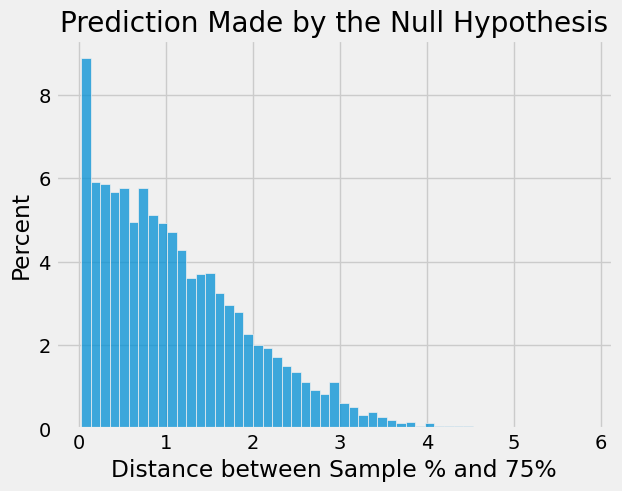

In [121]:
seaborn.histplot(pandas.DataFrame({'Distance between Sample % and 75%': distances}), 
                 x='Distance between Sample % and 75%', stat='percent')
plots.title('Prediction Made by the Null Hypothesis');

Regardez sur l'axe horizontal pour voir les valeurs typiques de la distance, telles que prédites par le modèle. Elles sont plutôt faibles. Par exemple, une grande partie des distances sont comprises entre 0 et 1, ce qui signifie que pour une grande partie des échantillons, le pourcentage de plantes à fleurs violettes est compris entre 75 % et 1 %. En d'autres termes, le pourcentage de l'échantillon est compris entre 74 % et 76 %.

Notez également que cette prédiction a été faite en utilisant uniquement le modèle de Mendel, et non les proportions observées par Mendel dans les plantes qu'il a cultivées. Il est maintenant temps de comparer les prédictions et les observations de Mendel.

#### Étape 4. La conclusion du test

Le choix entre l'hypothèse nulle et l'hypothèse alternative dépend de la comparaison entre ce que vous avez calculé aux étapes 2 et 3 : la valeur observée de la statistique du test et sa distribution telle que prédite par l'hypothèse nulle.

Si les deux ne sont pas cohérentes, les données ne confirment pas l'hypothèse nulle. En d'autres termes, l'hypothèse alternative est mieux étayée par les données. Nous disons que le test *rejette* l'hypothèse nulle.

Si les deux sont cohérentes, la statistique de test observée est conforme à ce que prédit l'hypothèse nulle. En d'autres termes, l'hypothèse nulle est mieux étayée par les données. Nous disons que les données sont *conformes* à l'hypothèse nulle.

Dans notre exemple, la valeur observée de la statistique de test est d'environ 0,89, comme calculé à l'étape 2 ci-dessus. À l'œil nu, repérez approximativement l'emplacement de 0,89 sur l'axe horizontal de l'histogramme. Vous verrez qu'il se situe clairement au cœur de la distribution prédite par le modèle de Mendel.

La cellule ci-dessous redessine l'histogramme avec la valeur observée sur l'axe horizontal.

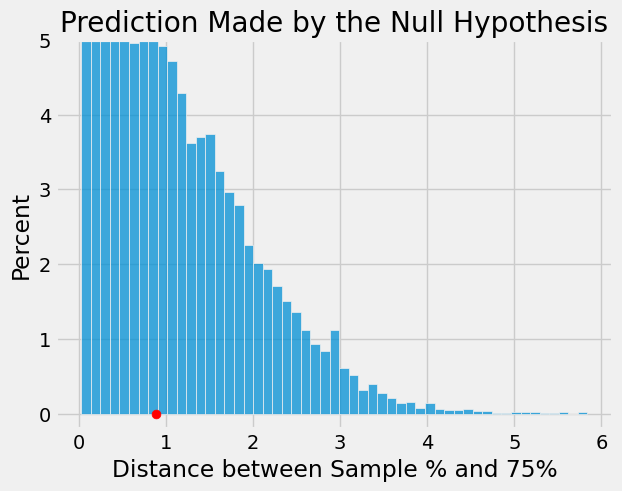

In [122]:
seaborn.histplot(pandas.DataFrame({'Distance between Sample % and 75%': distances}), 
                 x='Distance between Sample % and 75%', stat='percent')
plots.ylim(-0.2, 5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40);

La statistique observée ressemble à une distance typique prédite par l'hypothèse nulle. L'hypothèse nulle est le modèle de Mendel. Notre test conclut donc que les données sont compatibles avec le modèle de Mendel.

Sur la base de nos données, le modèle de Mendel semble bon.

#### Le sens du mot 'cohérent'

Dans tous nos exemples d'évaluation de modèles, il n'y a eu aucun doute quant à la cohérence des données avec les prédictions du modèle. Elles étaient soit très éloignées de ce que le modèle prédisait, comme dans les exemples sur les jurys, soit similaires à ce que le modèle prédisait, comme dans l'exemple sur le modèle de Mendel.

Mais les résultats ne sont pas toujours aussi tranchés. Jusqu'à quel point peut-on parler de 'distance' ? Que signifie exactement 'similaire' ? Bien que ces questions n'aient pas de réponses universelles, il existe des lignes directrices et des conventions que vous pouvez suivre.

Mais tout d'abord, il est important de comprendre que la question de savoir si la statistique de test observée est cohérente avec sa distribution prédite sous l'hypothèse nulle est une question d'opinion et de jugement subjectifs. Nous vous recommandons de fournir votre jugement ainsi que la valeur de la statistique de test et un graphique de sa distribution prédite sous l'hypothèse nulle. Cela permettra à vos lecteurs de se faire leur propre opinion sur la cohérence entre les deux.

Dans l'exemple ci-dessus, le jugement est clair. Mais supposons que quelqu'un cultive 929 autres plantes d'une variété apparentée et veuille voir si le modèle de Mendel fonctionne également pour les plantes de cette variété. Quelle serait votre conclusion si la distance observée était de 3,2 comme indiqué ci-dessous ?

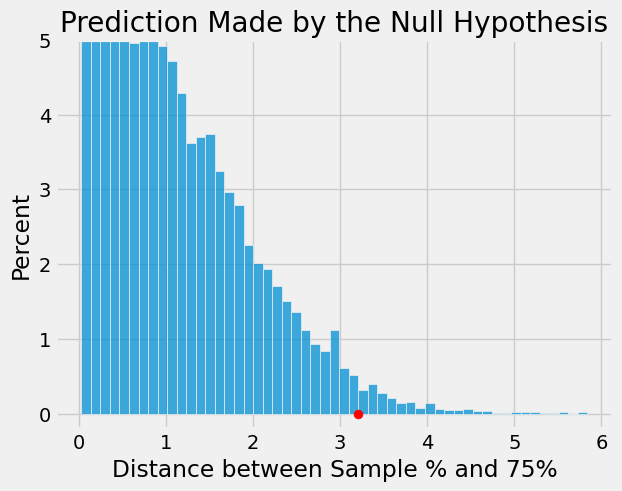

In [123]:
different_observed_statistic = 3.2
seaborn.histplot(pandas.DataFrame({'Distance between Sample % and 75%': distances}), 
                 x='Distance between Sample % and 75%', stat='percent')
plots.ylim(-0.2, 5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(different_observed_statistic, 0, color='red', s=40);

L'observation basée sur la nouvelle variété de plantes est-elle cohérente avec les prédictions de l'histogramme, ou non ?

La réponse n'est pas si claire. Tout dépend si vous pensez que le point rouge est trop éloigné de la majorité des valeurs prédites pour être cohérent avec la prédiction basée sur le modèle de Mendel.

#### Les seuils conventionnels et la p-value
Si vous ne voulez pas faire appel à votre propre jugement, il existe des conventions que vous pouvez suivre. Ces conventions nous indiquent jusqu'où les queues sont considérées comme 'trop éloignées'.

Les conventions sont basées sur la zone de la queue de la distribution, **en partant de la statistique observée (le point rouge) et en regardant dans la direction qui nous fait pencher vers l'alternative.** Dans cet exemple, c'est le côté droit, car les grandes distances favorisent l'alternative qui dit que le modèle n'est pas bon.

Si l'aire de la queue est petite, la statistique observée est très éloignée des valeurs les plus couramment prédites par l'hypothèse nulle.

Rappelez-vous que dans un histogramme, la surface représente le pourcentage. Pour trouver la surface de la queue, nous devons trouver le pourcentage de distances supérieures ou égales à 3,2, là où se trouve le point rouge. Le tableau `distances` contient les moyennes des 10 000 répétitions de l'échantillonnage aléatoire selon le modèle de Mendel, et `different_observed_statistic` est 3,2.

In [124]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0235

Environ 2,4 % des distances simulées selon le modèle de Mendel étaient égales ou supérieures à 3,2. Par la loi des grands nombres, nous pouvons conclure que si le modèle de Mendel était correct pour ces nouvelles plantes, il y a environ 2,4 % de chances que la statistique du test soit égale ou supérieure à 3,2.

Cela ne semble pas être une grande chance. Si le modèle de Mendel est vrai pour ces plantes, quelque chose d'assez improbable s'est produit. Cette idée est à l'origine des conventions.

#### La p-value

Cette chance porte un nom impressionnant. Il s'agit du *niveau de significativité observé* du test. C'est un peu long, et c'est pourquoi on l'appelle communément la *p-value* ou *valeur p* du test.

**Définition:** La valeur p d'un test est la probabilité, basée sur le modèle de l'hypothèse nulle, que la statistique du test soit égale à la valeur observée dans l'échantillon ou même plus loin dans la direction qui soutient l'alternative.

Si une valeur p est petite, cela signifie que la queue au-delà de la statistique observée est petite et que la statistique observée est donc très éloignée de ce que prédit l'hypothèse nulle. Cela implique que les données soutiennent davantage l'hypothèse alternative qu'elles ne soutiennent l'hypothèse nulle.  

Qu'entend-on par 'petit' ? Selon les conventions :

- Si la valeur p est inférieure à 5 %, elle est considérée comme petite et le résultat est dit 'statistiquement significatif'.

- Si la valeur p est encore plus petite - moins de 1 % - le résultat est dit 'hautement significatif sur le plan statistique'.

Selon cette convention, notre valeur p de 2,4 % est considérée comme faible. La conclusion conventionnelle serait donc de rejeter l'hypothèse nulle et de dire que le modèle de Mendel ne semble pas bon pour les nouvelles plantes. Formellement, le résultat du test est statistiquement significatif.

Lorsque vous tirez une conclusion de cette manière, nous vous recommandons de ne pas vous contenter de dire si le résultat est statistiquement significatif ou non. Accompagnez votre conclusion de la statistique observée et de la valeur p, afin que les lecteurs puissent se faire leur propre opinion.

#### Note historique sur les conventions

La détermination de la signification statistique, telle que définie ci-dessus, est devenue la norme dans les analyses statistiques de tous les domaines d'application. Lorsqu'une convention est si universellement suivie, il est intéressant d'examiner comment elle est née.

La méthode des tests statistiques, qui consiste à choisir entre des hypothèses basées sur des données provenant d'échantillons aléatoires, a été mise au point par Sir Ronald Fisher au début du 20e siècle. Sir Ronald a peut-être établi la convention relative à la signification statistique de manière quelque peu involontaire, dans la déclaration suivante de son livre de 1925 intitulé *Statistical Methods for Research Workers* (Méthodes statistiques pour les chercheurs). À propos du seuil de 5 %, il écrit : 'Il est commode de prendre ce point comme limite pour juger si un écart doit être considéré comme significatif ou non'.

Ce qui était 'pratique' pour Sir Ronald est devenu un seuil qui a acquis le statut de constante universelle. Peu importe que Sir Ronald ait lui-même précisé que cette valeur était un choix personnel parmi d'autres : dans un article paru en 1926, il écrivait : 'Si une chance sur vingt ne semble pas assez élevée, nous pouvons, si nous le préférons, fixer la limite à une chance sur cinquante (le point de 2 %), ou une chance sur cent (le point de 1 %)'. Personnellement, l'auteur préfère fixer une norme de signification basse au point 5 pour cent...'

Fisher savait que le terme 'faible' est une question de jugement et n'a pas de définition unique. Nous vous suggérons de garder cela à l'esprit. Fournissez vos données, formulez votre jugement et expliquez pourquoi vous l'avez formulé.

Que vous utilisiez un seuil conventionnel ou votre propre jugement, il est important de garder à l'esprit les points suivants.

- Fournissez toujours la valeur observée de la statistique de test et la valeur p, afin que les lecteurs puissent décider s'ils pensent que la valeur p est petite ou non.
- Ne cherchez pas à défier les conventions uniquement lorsque les résultats obtenus par convention ne vous conviennent pas.
- Même si un test conclut que les données ne soutiennent pas le modèle de hasard dans l'hypothèse nulle, il n'explique généralement pas *pourquoi* le modèle ne fonctionne pas. Ne tirez pas de conclusions causales sans une analyse plus approfondie, à moins que vous ne meniez un essai contrôlé randomisé. Nous analyserons ces derniers dans une section ultérieure.

### Probabilités d'erreur

Dans le processus par lequel nous décidons laquelle des deux hypothèses est la mieux étayée par nos données, la dernière étape implique un jugement sur la cohérence des données et de l'hypothèse nulle. Bien que cette étape aboutisse à une bonne décision la plupart du temps, elle peut parfois nous induire en erreur. La raison en est la variation du hasard. Par exemple, même lorsque l'hypothèse nulle est vraie, une variation fortuite peut faire en sorte que l'échantillon soit très différent de ce que prédit l'hypothèse nulle.

#### Des conclusions erronées

Si vous testez une hypothèse nulle contre l'alternative que l'hypothèse nulle n'est pas vraie, il y a quatre façons de classer la réalité et le résultat du test.

|                             | Le test est favorise l'hypothèse nulle | Le test favorise l'hypothèse alternative |
|----------------------------:|----------------------------------------|------------------------------------------|
| L'hypothèse nulle est vraie | Résultat correct                       | Erreur                                   | 
|     L'alternative est vraie | Erreur                                 | Résultat correct                         |   
                                                                                                                    

Dans deux des quatre cellules de ce tableau, le résultat du test est erroné. Un type d'erreur se produit si le test favorise l'hypothèse alternative alors que l'hypothèse nulle est vraie. L'autre type d'erreur se produit si le test favorise l'hypothèse nulle alors que l'hypothèse alternative est vraie.

Étant donné que l'hypothèse nulle est un modèle aléatoire complètement spécifié, le premier type d'erreur a une chance que nous pouvons estimer. La réponse s'avère être essentiellement le seuil que nous utilisons pour la valeur p. Voyons comment.

#### Le risque d'erreur
Supposons que vous vouliez tester si une pièce de monnaie donne des résultats équitables à pile ou face ou non. Les hypothèses sont alors les suivantes :

**Nulle:** La pièce est juste. C'est-à-dire que les résultats correspondent à des tirages aléatoires avec remplacement de *Pile, Pile*.

**Alternative:** La pièce n'est pas juste.

Supposons que vous souhaitiez tester cette hypothèse sur la base de 2000 tirages à pile ou face. On peut s'attendre à ce qu'une pièce juste tombe sur pile 1000 fois sur 2000, de sorte qu'une statistique de test raisonnable est la suivante

$$
\text{statistique de test} ~ = ~ \big{\vert} ~ \text{nombre de face} - 1000 ~ \big{\vert}
$$

Les petites valeurs de cette statistique favorisent l'hypothèse nulle, et les grandes valeurs favorisent l'hypothèse alternative.

Nous avons simulé cette statistique sous l'hypothèse nulle à de nombreuses reprises et tracé sa distribution empirique.

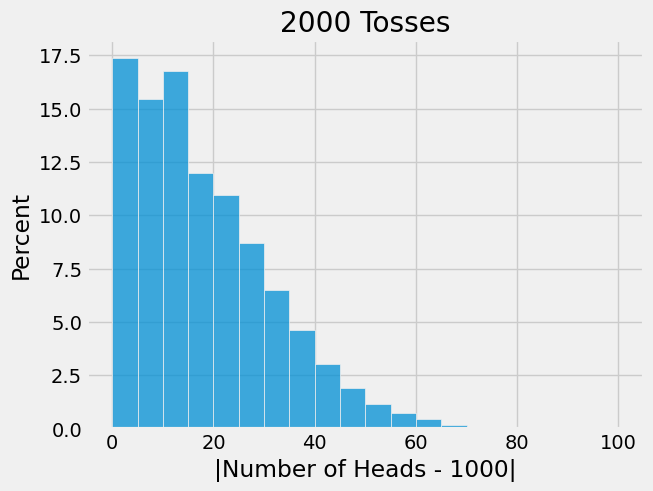

In [125]:
fair_coin = [0.5, 0.5]

def one_simulated_statistic():
    number_of_heads = 2000 * sample_proportions(2000, fair_coin)[0]
    return abs(number_of_heads - 1000)

repetitions = 50000

statistics = np.array([])
for i in np.arange(50000):
    statistics = np.append(statistics, one_simulated_statistic())

results = pandas.DataFrame({'|Number of Heads - 1000|': statistics})
seaborn.histplot(data=results, x='|Number of Heads - 1000|', bins=np.arange(0, 101, 5), stat='percent')
plots.title('2000 Tosses');

La zone située à droite de 45, est légèrement inférieure à 5 %.

In [126]:
np.count_nonzero(statistics >= 45) / repetitions

0.0463

Les valeurs élevées de la statistique de test favorisent l'alternative. Ainsi, si vous souhaitez utiliser un seuil de 5 % pour la valeur p, votre règle de décision consistera à conclure que la pièce est déloyale si la valeur de la statistique de test est égale ou supérieure à 45.

Cependant, comme le montre la figure, une pièce de monnaie équitable peut produire des statistiques de test avec des valeurs de 45 ou plus. En fait, elle le fait avec une chance d'environ 5 %.

Résumé : *Si la pièce est juste* et que notre test utilise un seuil de 5 % pour décider si elle est juste ou non, il y a environ 5 % de chances que le test conclue à tort que la pièce est injuste.

#### Le seuil de la valeur p est une probabilité d'erreur
L'exemple ci-dessus est un cas particulier d'un fait général :

**Si vous utilisez un seuil de $p$% pour la valeur p, et que l'hypothèse nulle est vraie, il y a environ $p$% de chances que votre test conclue que l'alternative est vraie**.

Voici à nouveau le tableau des quatre résultats possibles de la réalité/du test. Les probabilités de la première ligne sont calculées en supposant que l'hypothèse nulle est vraie. La valeur p est la probabilité de l'erreur indiquée en gras.

|                             | Le test est favorise l'hypothèse nulle | Le test favorise l'hypothèse alternative |
|-----------------------------|----------------------------------------|------------------------------------------|
| L'hypothèse nulle est vraie | Résultat correct                       | **Erreur**                               |
| L'alternative est vraie     | Erreur                                 | Résultat correct                         |

#### Contrôle de l'erreur
Le seuil de 1 % est donc plus prudent que celui de 5 %. Avec un seuil de 1 %, il y a moins de chances de conclure à une 'alternative' si l'hypothèse nulle s'avère vraie. C'est pourquoi les essais contrôlés randomisés de traitements médicaux utilisent généralement le seuil de 1 % pour décider entre les deux hypothèses suivantes :

**Le traitement n'a pas d'effet ; les différences observées entre les résultats des groupes de patients traités et des groupes de contrôle sont dues à la randomisation.**

**Alternative:** Le traitement a un effet.

L'idée est de contrôler le risque de conclure que le traitement a un effet alors qu'il n'en a aucun. Cela réduit le risque de donner aux patients un traitement inutile.

Néanmoins, même si vous fixez le seuil à 1 % et que le traitement n'a aucun effet, il y a environ 1 % de chances de conclure que le traitement a un effet. Cela est dû à la variation du hasard. Il y a un faible risque que les données provenant d'échantillons aléatoires finissent par vous induire en erreur. L'avantage de l'échantillonnage aléatoire est que vous pouvez trouver cette chance.

#### Triturage de données et p-hacking
La discussion ci-dessus implique que si chacun des 100 groupes de recherche différents mène une expérience aléatoire contrôlée distincte sur l'effet d'un traitement qui n'a en fait aucun effet, et que chaque expérience utilise un seuil de 1 % pour la valeur p, alors, par variation aléatoire, l'une des expériences devrait conclure de manière erronée que le traitement a un effet.

Malheureusement, c'est cette expérience qui pourrait être publiée. C'est pourquoi il est important que les expériences soient *répliquées*. En d'autres termes, d'autres chercheurs devraient pouvoir réaliser l'expérience et voir s'ils obtiennent des résultats similaires.

Il n'est pas rare que les chercheurs testent plusieurs hypothèses à partir des mêmes données. Par exemple, dans un essai contrôlé randomisé sur l'effet d'un médicament, les chercheurs peuvent tester si le médicament a un effet sur différentes maladies.

Supposons maintenant que le médicament n'ait aucun effet sur quoi que ce soit. Par le simple jeu du hasard, un petit pourcentage des tests pourrait conclure qu'il a un effet. Par conséquent, lorsque vous lisez une étude qui utilise des tests d'hypothèses et conclut qu'un traitement a un effet, demandez toujours combien d'effets différents ont été testés avant que les chercheurs ne trouvent celui qui a été rapporté.

Si les chercheurs ont effectué plusieurs tests différents avant d'en trouver un qui donne un résultat 'hautement significatif sur le plan statistique', utilisez ce résultat avec prudence. L'étude pourrait être entachée de *triturage de données*, qui consiste essentiellement à torturer les données pour obtenir de faux aveux. On parle aussi parfois de *p-hacking*.

Dans une telle situation, une façon de valider le résultat rapporté est de reproduire l'expérience et de tester uniquement cet effet particulier. Si le résultat est à nouveau significatif, la conclusion initiale sera validée.

#### Note technique : L'autre type d'erreur
Il existe bien sûr un autre type d'erreur : conclure que le traitement ne fait rien alors qu'il fait quelque chose. Cette erreur n'est pas abordée dans le cadre de ce cours. Sachez simplement que la vie n'est pas facile : si vous configurez votre test pour réduire l'une des deux erreurs, vous augmentez presque toujours l'autre.

## 6. Tests d'hypothèses : tests de permutation à deux échantillons (facultatif)

Nous avons vu plusieurs exemples permettant d'évaluer si un échantillon unique ressemble à des tirages aléatoires à partir d'un modèle de hasard spécifié.
- Les jurys du comté d'Alameda ressemblaient-ils à un échantillon aléatoire de la population des jurés éligibles ?
- Les pois cultivés par Mendel avaient-ils des couleurs conformes aux chances qu'il avait spécifiées dans son modèle ?

Dans tous ces cas, il n'y avait qu'un seul échantillon aléatoire et nous essayions de déterminer comment il avait été généré. Mais souvent, les scientifiques des données doivent comparer deux échantillons aléatoires l'un avec l'autre. Par exemple, ils peuvent être amenés à comparer les résultats de patients qui ont été assignés au hasard à un groupe traitement et à un groupe contrôle. Ou encore, ils peuvent avoir assigné au hasard des utilisateurs d'Internet à deux versions différentes d'un site web, après quoi ils voudront comparer les actions des deux groupes aléatoires.

Dans ce chapitre, nous développons un moyen d'utiliser Python pour comparer deux échantillons aléatoires et répondre à des questions sur les similitudes et les différences entre eux. Vous verrez que les méthodes que nous développons ont des applications diverses. Nos exemples proviennent de la médecine et de la santé publique ainsi que du football !


### Test A/B
Dans le domaine de l'analyse de données moderne, le fait de décider si deux échantillons numériques proviennent de la même distribution sous-jacente est appelé *test A/B*. Le nom fait référence aux étiquettes des deux échantillons, A et B.

Nous allons développer la méthode dans le contexte d'un exemple. Les données proviennent d'un échantillon de nouveau-nés dans un grand hôpital. Nous les traiterons comme s'il s'agissait d'un échantillon aléatoire simple, bien que l'échantillonnage ait été effectué en plusieurs étapes. Le document [Stat Labs] (https://www.stat.berkeley.edu/~statlabs/) de Deborah Nolan et Terry Speed contient des détails sur un ensemble de données plus large dont cet ensemble est tiré.

#### Fumeuses et non-fumeuses
Le tableau `births` contient les variables suivantes pour 1 174 paires mère-bébé : le poids du bébé à la naissance en onces, le nombre de jours de gestation, l'âge de la mère en années révolues, la taille de la mère en pouces, le poids de la grossesse en livres et le fait que la mère ait fumé ou non pendant la grossesse.

In [127]:
births = pandas.read_csv(path_data + '/baby.csv')
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


Convertissons d'abord les poids en kg et les tailles en cm pour y voir plus clair.

In [128]:
births[['Birth Weight', 'Maternal Pregnancy Weight']] = np.round(
    births[['Birth Weight', 'Maternal Pregnancy Weight']] * 0.035, 3)
births['Maternal Height'] = (births['Maternal Height'] * 2.54).astype(int)
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,4.200,284,27,157,3.500,False
1,3.955,282,33,162,4.725,False
2,4.480,279,28,162,4.025,True
3,3.780,282,23,170,4.375,True
4,4.760,286,25,157,3.255,False
...,...,...,...,...,...,...
1169,3.955,275,27,152,3.500,False
1170,4.480,265,24,170,4.200,False
1171,4.550,291,30,165,5.250,True
1172,4.375,281,21,165,3.850,False


L'un des objectifs de l'étude était de déterminer si le tabagisme maternel était associé au poids à la naissance. Voyons ce que nous pouvons dire sur ces deux variables.

Nous commencerons par sélectionner uniquement `Birth weight` et `Maternal Smoker`. Il y a 715 non-fumeuses parmi les femmes de l'échantillon, et 459 fumeuses.

In [129]:
smoking_and_birthweight = births[['Maternal Smoker', 'Birth Weight']]

In [130]:
smoking_and_birthweight.groupby('Maternal Smoker').agg(count=('Maternal Smoker', 'count'))

,count
Maternal Smoker,
False,715
True,459


Examinons la distribution des poids à la naissance des bébés des mères non fumeuses par rapport à ceux des mères fumeuses. Pour générer deux histogrammes superposés, nous utiliserons `seaborn.histplot` avec l'argument optionnel `hue` qui est un libellé de colonne ou un index. Les lignes du tableau sont d'abord regroupées par cette colonne, puis un histogramme est dessiné pour chacune d'entre elles.

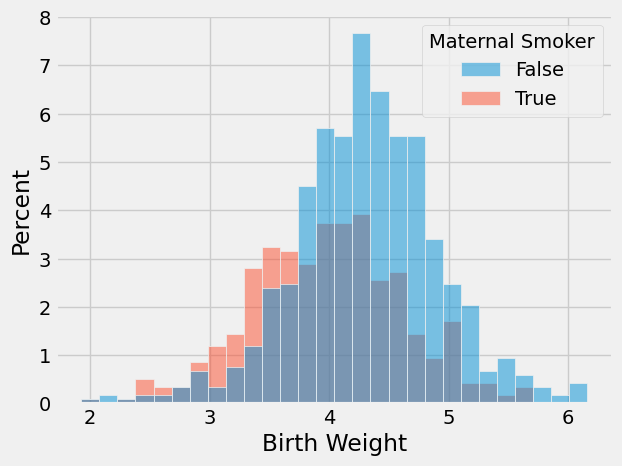

In [131]:
fig=seaborn.histplot(data=smoking_and_birthweight, x='Birth Weight', hue='Maternal Smoker', stat='percent')

La distribution des poids des bébés nés de mères fumeuses semble être basée légèrement à gauche de la distribution correspondant aux mères non fumeuses. Les poids des bébés des mères fumeuses semblent en moyenne plus faibles que les poids des bébés des non-fumeuses.

Cela soulève la question de savoir si la différence reflète une simple variation due au hasard ou une différence dans les distributions au sein de la population plus large. Se pourrait-il qu'il n'y ait pas de différence entre les deux distributions dans la population, mais que nous observions une différence dans les échantillons uniquement en raison des mères qui ont été sélectionnées ?

#### Les hypothèses
Nous pouvons tenter de répondre à cette question par un test d'hypothèses. Le modèle de hasard que nous allons tester affirme qu'il n'y a pas de différence sous-jacente dans les populations ; les distributions dans les échantillons sont différentes uniquement en raison du hasard.

Formellement, il s'agit de l'hypothèse nulle. Nous allons devoir trouver comment simuler une statistique utile sous cette hypothèse. Mais pour commencer, énonçons simplement les deux hypothèses naturelles.

**Hypothèse nulle:** Dans la population, la distribution des poids de naissance des bébés est la même pour les mères qui ne fument pas que pour celles qui fument. La différence dans l'échantillon est due au hasard.

**Hypothèse alternative:** Dans la population, les bébés des mères fumeuses ont en moyenne un poids de naissance inférieur à celui des bébés des mères non fumeuses.

#### Statistique du test
L'hypothèse alternative compare les poids de naissance moyens des deux groupes et affirme que la moyenne des mères fumeuses est plus petite. Il est donc raisonnable d'utiliser la différence entre les moyennes des deux groupes comme statistique.

Nous effectuerons la soustraction dans l'ordre suivant : 'poids moyen du groupe des fumeuses $-$ poids moyen du groupe des non-fumeuses'. De petites valeurs (c'est-à-dire de grandes valeurs négatives) de cette statistique favoriseront l'hypothèse alternative.

La valeur observée de la statistique de test est d'environ $-0.324$ kg.

In [132]:
means_table = smoking_and_birthweight.groupby('Maternal Smoker').agg(mean_birth_weight=('Birth Weight', 'mean')).reset_index()
means_table

,Maternal Smoker,mean_birth_weight
0,False,4.307986
1,True,3.983671


In [133]:
means = means_table['mean_birth_weight']
observed_difference = means[1] - means[0]
observed_difference

np.float64(-0.3243149900208726)

Nous allons calculer ces différences de manière répétée dans nos simulations ci-dessous, et nous allons donc définir une fonction pour faire ce travail. La fonction prend deux arguments :

- le nom du tableau de données
- l'étiquette de la colonne qui contient la variable booléenne pour le regroupement

Elle renvoie la différence entre les moyennes du groupe 'vrai' et du groupe 'faux'.

Vous verrez bientôt pourquoi nous spécifions les deux arguments. Pour l'instant, il suffit de vérifier que la fonction renvoie bien ce qu'elle doit renvoyer.

In [134]:
def difference_of_means(table, group_label):
    '''Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups'''
    reduced = table[['Birth Weight', group_label]]
    means_table = reduced.groupby(group_label).agg(mean_birth_weight=('Birth Weight', 'mean')).reset_index()
    means = means_table['mean_birth_weight']
    return means[1] - means[0]

Pour vérifier que la fonction fonctionne, utilisons-la pour calculer la différence observée entre les poids moyens à la naissance des deux groupes de l'échantillon.

In [135]:
difference_of_means(births, 'Maternal Smoker')

np.float64(-0.3243149900208726)

C'est la même valeur que celle de `observed_difference` calculée précédemment.

#### Prédire la statistique sous l'hypothèse nulle

Pour voir comment la statistique devrait varier sous l'hypothèse nulle, nous devons trouver un moyen de simuler la statistique sous cette hypothèse. Une méthode astucieuse basée sur les *permutations aléatoires* permet justement de le faire.

S'il n'y avait pas de différence entre les deux distributions dans la population sous-jacente, le fait qu'un poids de naissance porte l'étiquette 'vrai' ou 'faux' en ce qui concerne le tabagisme maternel ne devrait pas avoir d'incidence sur la moyenne. L'idée est donc de mélanger toutes les étiquettes au hasard parmi les mères. C'est ce qu'on appelle une *permutation aléatoire*.

La permutation garantit que le nombre d'étiquettes 'Vrai' ne change pas et que le nombre d'étiquettes 'Faux' ne change pas non plus. Ceci est important pour la comparabilité des différences de moyennes simulées et des différences de moyennes originales. Nous verrons plus tard dans ce cours que la taille de l'échantillon affecte la variabilité de la moyenne d'un échantillon.

Prenez la différence des deux nouvelles moyennes de groupe : le poids moyen des bébés dont les mères ont été étiquetées fumeuses au hasard et le poids moyen des bébés des mères restantes qui ont toutes été étiquetées non-fumeuses au hasard. Il s'agit d'une valeur simulée de la statistique de test sous l'hypothèse nulle.

Voyons comment procéder. Il est toujours bon de commencer par les données. Nous avons réduit le tableau pour n'avoir que les colonnes dont nous avons besoin.

In [136]:
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,4.200
1,False,3.955
2,True,4.480
3,True,3.780
4,False,4.760
...,...,...
1169,False,3.955
1170,False,4.480
1171,True,4.550
1172,False,4.375


Le tableau comporte 1 174 lignes. Pour mélanger toutes les étiquettes, nous tirerons un échantillon aléatoire de 1 174 lignes sans remplacement. L'échantillon comprendra alors toutes les lignes du tableau, dans un ordre aléatoire.

Nous pouvons utiliser la méthode `sample` de Table. Nous devons la compléter par la méthode `reset_index` pour éviter de perdre le mélange plus tard.

In [137]:
shuffled_labels = smoking_and_birthweight['Maternal Smoker'].sample(len(smoking_and_birthweight)).reset_index(drop=True)
original_and_shuffled = smoking_and_birthweight.assign(Shuffled_Label=shuffled_labels, )

In [138]:
original_and_shuffled

,Maternal Smoker,Birth Weight,Shuffled_Label
0,False,4.200,False
1,False,3.955,True
2,True,4.480,False
3,True,3.780,False
4,False,4.760,False
...,...,...,...
1169,False,3.955,True
1170,False,4.480,False
1171,True,4.550,False
1172,False,4.375,False


La mère de chaque bébé a maintenant une étiquette aléatoire de fumeur/non-fumeur dans la colonne 'shuffled label', alors que son étiquette originale se trouve dans la colonne 'maternal smoker'. Si l'hypothèse nulle est vraie, toutes les réorganisations aléatoires des étiquettes devraient avoir la même probabilité.

Voyons à quel point les poids moyens sont différents dans les deux groupes étiquetés au hasard.

In [139]:
shuffled_only = original_and_shuffled[['Birth Weight','Shuffled_Label']]
shuffled_group_means = shuffled_only.groupby('Shuffled_Label').agg(shuffled_mean=('Birth Weight', 'mean'))
shuffled_group_means

,shuffled_mean
Shuffled_Label,
False,4.183455
True,4.177658


Les moyennes des deux groupes sélectionnés au hasard sont assez proches des moyennes des deux groupes initiaux. Nous pouvons utiliser notre fonction `différence_des_moyennes` pour trouver les deux différences.

In [140]:
difference_of_means(original_and_shuffled, 'Shuffled_Label')

np.float64(-0.005796593384828519)

In [141]:
difference_of_means(original_and_shuffled, 'Maternal Smoker')

np.float64(-0.3243149900208726)

Mais un brassage différent aurait-il pu entraîner une différence plus importante entre les moyennes des groupes ? Pour avoir une idée de la variabilité, nous devons simuler la différence plusieurs fois.

Comme toujours, nous commencerons par définir une fonction qui simule une valeur de la statistique de test sous l'hypothèse nulle. Il s'agit simplement de rassembler le code que nous avons écrit ci-dessus.

La fonction s'appelle `one_simulated_difference_of_means`. Elle ne prend aucun argument et renvoie la différence entre les poids de naissance moyens de deux groupes formés en mélangeant aléatoirement toutes les étiquettes.

In [142]:
def one_simulated_difference_of_means():
    '''Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels'''
    
    # array of shuffled labels
    shuffled_labels = births.sample(len(births))['Maternal Smoker'].reset_index(drop=True)
    
    # table of birth weights and shuffled labels
    shuffled_table = births[['Birth Weight']].assign(
        Shuffled_Label=shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled_Label')   

Exécutez la cellule ci-dessous plusieurs fois pour voir comment la sortie change.

In [143]:
one_simulated_difference_of_means()

np.float64(-0.03509427609427629)

#### Test de permutation
Les tests basés sur des permutations aléatoires des données sont appelés *tests de permutation*. Nous en effectuons un dans cet exemple. Dans la cellule ci-dessous, nous allons simuler notre statistique de test - la différence entre le poids moyen à la naissance des deux groupes formés au hasard - plusieurs fois et rassembler les différences dans un tableau.

In [144]:
# /!\ Tourne pendant 20 secondes
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)                               

Le tableau `differences` contient 5 000 valeurs simulées de notre statistique de test : la différence entre le poids moyen dans le groupe des fumeurs et le poids moyen dans le groupe des non-fumeurs, lorsque les étiquettes ont été attribuées au hasard.

#### Conclusion du test
L'histogramme ci-dessous montre la distribution de ces 5 000 valeurs. Il s'agit de la distribution empirique de la statistique de test simulée sous l'hypothèse nulle. Il s'agit d'une prédiction de la statistique du test, basée sur l'hypothèse nulle.

Observed Difference: -0.3243149900208726


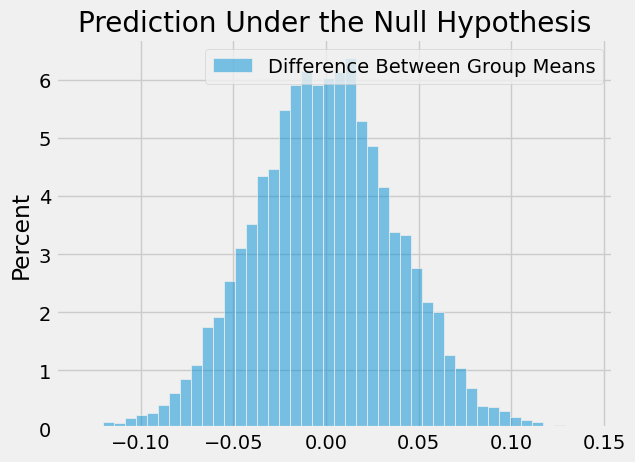

In [145]:
seaborn.histplot(data=pandas.DataFrame({'Difference Between Group Means': differences}), stat='percent')
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

Remarquez que la distribution est centrée approximativement autour de 0. Cela est logique, car sous l'hypothèse nulle, les deux groupes devraient avoir approximativement la même moyenne. Par conséquent, la différence entre les moyennes des groupes devrait se situer autour de 0.

La différence observée dans l'échantillon original est d'environ 9,27 onces, ce qui n'apparaît même pas sur l'échelle horizontale de l'histogramme. La valeur observée de la statistique et le comportement prédit de la statistique sous l'hypothèse nulle sont incohérents.

La conclusion du test est que les données favorisent l'hypothèse alternative par rapport à l'hypothèse nulle. Elles confirment l'hypothèse selon laquelle le poids moyen à la naissance des bébés nés de mères fumeuses est inférieur au poids moyen à la naissance des bébés nés de mères non fumeuses.

Si vous souhaitez calculer une valeur p empirique, n'oubliez pas que de faibles valeurs de la statistique favorisent l'hypothèse alternative.

In [146]:
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

0.0

La valeur p empirique est de 0, ce qui signifie qu'aucun des 5 000 échantillons permutés n'a donné lieu à une différence de $-0.324$ kg ou moins. Il ne s'agit que d'une approximation. La probabilité exacte d'obtenir une différence de cet ordre n'est pas de 0. Mais elle est infiniment petite, selon notre simulation, et nous pouvons donc rejeter l'hypothèse nulle.

#### Un autre test de permutation
Nous pouvons utiliser la même méthode pour comparer d'autres caractéristiques des fumeuses et des non-fumeuses, telles que leur âge. Les histogrammes des âges des deux groupes montrent que, dans l'échantillon, les mères fumeuses ont tendance à être plus jeunes.

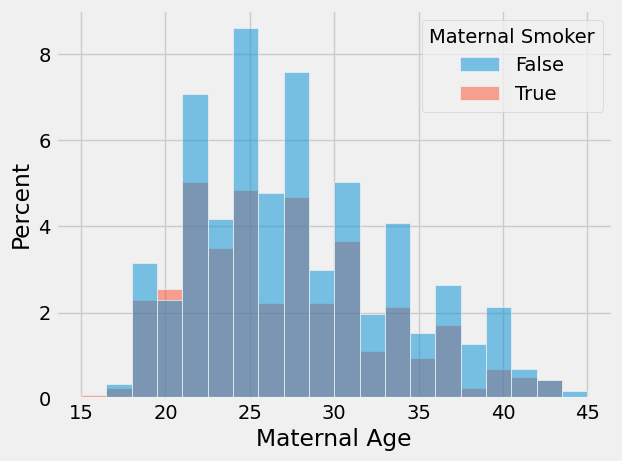

In [147]:
smoking_and_age = births[['Maternal Smoker', 'Maternal Age']]
fig=seaborn.histplot(data=smoking_and_age, x='Maternal Age', hue='Maternal Smoker', stat='percent')

La différence observée entre les âges moyens est d'environ 0,8 année.

Réécrivons le code qui a comparé les poids à la naissance afin de comparer les âges des fumeurs et des non-fumeurs.

In [148]:
def difference_of_means(table, group_label):
    '''Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean ages of the two groups'''
    reduced = table[['Maternal Age', group_label]]
    means_table = reduced.groupby(group_label).agg(mean_maternal_age=('Maternal Age', 'mean')).reset_index()
    means = means_table['mean_maternal_age']
    return means[1] - means[0]

In [149]:
observed_age_difference = difference_of_means(births, 'Maternal Smoker')
observed_age_difference

np.float64(-0.8076725017901509)

Rappelez-vous que la différence est calculée comme l'âge moyen des fumeurs moins l'âge moyen des non-fumeurs. Le signe négatif indique que les fumeurs sont en moyenne plus jeunes.

Cette différence est-elle due au hasard ou reflète-t-elle une différence sous-jacente dans la population ?

Comme précédemment, nous pouvons utiliser un test de permutation pour répondre à cette question. Si les distributions sous-jacentes des âges dans les deux groupes sont les mêmes, la distribution empirique de la différence basée sur les échantillons permutés permettra de prédire comment la statistique devrait varier en fonction du hasard.

Nous suivrons le même processus que pour toute simulation. Nous commencerons par écrire une fonction qui renvoie une valeur simulée de la différence entre les moyennes, puis nous écrirons une boucle 'for' pour simuler de nombreuses valeurs de ce type et les rassembler dans un tableau.

In [150]:
def one_simulated_difference_of_means():
    '''Returns: Difference between mean ages
    of smokers and non-smokers after shuffling labels'''
    
    # array of shuffled labels
    shuffled_labels = births.sample(len(births))['Maternal Smoker'].reset_index(drop=True)
    
    # table of ages and shuffled labels
    shuffled_table = births[['Maternal Age']].assign(
        Shuffled_Label= shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled_Label')   

In [151]:
age_differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    age_differences = np.append(age_differences, new_difference)

La différence observée se situe dans la queue de la distribution empirique des différences simulées sous l'hypothèse nulle.

Observed Difference: -0.8076725017901509


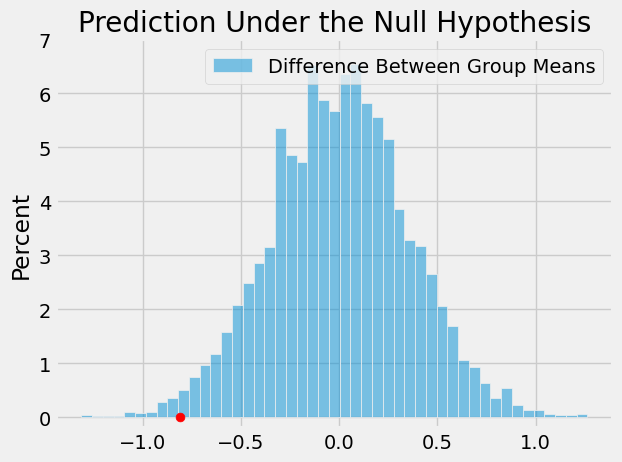

In [152]:
seaborn.histplot(data=pandas.DataFrame({'Difference Between Group Means': age_differences}),
                 stat='percent')
# Plotting parameters; you can ignore the code below
plots.ylim(-0.2, 7)
plots.scatter(observed_age_difference, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_age_difference)

Une fois de plus, la distribution empirique des différences simulées est centrée approximativement autour de 0, car la simulation se fait sous l'hypothèse nulle qu'il n'y a pas de différence entre les distributions des deux groupes.

La valeur p empirique du test est la proportion de différences simulées qui sont égales ou inférieures à la différence observée. En effet, de faibles valeurs de la différence favorisent l'hypothèse alternative selon laquelle les fumeurs étaient en moyenne plus jeunes.

In [153]:
empirical_p = np.count_nonzero(age_differences <= observed_age_difference) / 5000
empirical_p

0.0118

La valeur p empirique est d'environ 1 % et le résultat est donc statistiquement significatif. Le test confirme l'hypothèse selon laquelle les fumeuses sont en moyenne plus jeunes.

### Causalité

Nos méthodes de comparaison de deux échantillons sont très utiles pour l'analyse des expériences aléatoires contrôlées. Étant donné que les groupes traitement et contrôle sont assignés au hasard dans ces expériences, les différences entre leurs résultats peuvent être comparées à ce qui se produirait par hasard si le traitement n'avait pas d'effet du tout. Si les différences observées sont plus marquées que ce que nous pourrions prédire comme étant purement dû au hasard, nous aurons la preuve d'une *cause*. En raison de l'affectation impartiale des individus aux groupes de traitement et de contrôle, les différences entre les résultats des deux groupes peuvent être attribuées au traitement.

La clé de l'analyse des expériences aléatoires contrôlées est de comprendre exactement comment le hasard entre en jeu. Cela nous permet d'établir des hypothèses nulles et alternatives claires. Une fois cela fait, nous pouvons simplement utiliser les méthodes des sections précédentes pour compléter l'analyse.

Voyons comment procéder à l'aide d'un exemple.

#### Traiter la lombalgie chronique : un essai contrôlé randomisé
La lombalgie chez l'adulte peut être très persistante et difficile à traiter. Les méthodes courantes vont des corticostéroïdes à l'acupuncture. Un [essai contrôlé randomisé (ECR)] (https://www.ncbi.nlm.nih.gov/pubmed/11376175) a examiné l'effet de l'utilisation de la toxine botulique A (BTA) comme traitement. La toxine botulique est une protéine neurotoxique qui provoque la maladie du botulisme ; [Wikipedia](https://en.wikipedia.org/wiki/Botulinum_toxin) indique que la toxine botulique 'est la toxine la plus mortelle connue'. Il existe sept types de toxine botulique. La toxine botulique A est l'un des types qui peut provoquer des maladies chez l'homme, mais elle est également utilisée en médecine pour traiter diverses maladies musculaires. L'essai contrôlé randomisé analysé par Foster, Clapp et Jabbari en 2001 l'a examinée en tant que traitement de la lombalgie.

Trente et un patients souffrant de lombalgie ont été répartis de manière aléatoire en groupes de traitement et de contrôle, 15 dans le groupe traitement et 16 dans le groupe contrôle. Le groupe témoin a reçu une solution saline normale et les essais ont été menés en double aveugle, de sorte que ni les médecins ni les patients ne savaient dans quel groupe ils se trouvaient.

Huit semaines après le début de l'étude, neuf des 15 personnes du groupe traitement et deux des 16 personnes du groupe contrôle ont été soulagées de leur douleur (selon une définition précise utilisée par les chercheurs). Ces données figurent dans le tableau `bta` et semblent montrer que le traitement présente un avantage certain.

In [154]:
bta = pandas.read_csv(path_data + '/bta.csv')
bta.head()

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0


Voyons combien de patients ont guéri dans chaque groupe. N'oubliez pas que compter revient à additionner des zéros et des uns. La somme des 1 dans le groupe contrôle est le nombre de patients du groupe contrôle qui ont été soulagés de la douleur.

In [155]:
bta.groupby('Group').agg(sum_results=('Result', sum))

,sum_results
Group,
Control,2.0
Treatment,9.0


Puisque le comptage est la même chose que la *somme* des zéros et des uns, la *proportion* de patients ayant bénéficié d'un soulagement de la douleur est la *moyenne* des zéros et des uns. C'est la somme divisée par le nombre total de patients dans chaque groupe.

In [156]:
bta.groupby('Group').agg(mean_results=('Result', 'mean'))

,mean_results
Group,
Control,0.125
Treatment,0.600


Dans le groupe traité, 60 % des patients ont été soulagés de la douleur, contre seulement 12,5 % dans le groupe témoin. Aucun des patients n'a souffert d'effets secondaires.

Il semble donc que la toxine botulique A ait donné de meilleurs résultats que le sérum physiologique. Mais la conclusion n'est pas encore définitive. Les patients ont été répartis au hasard dans les deux groupes, de sorte que la différence pourrait être due au hasard.

Pour comprendre ce que cela signifie, il faut envisager la possibilité que, parmi les 31 patients de l'étude, certains étaient tout simplement plus aptes à se rétablir que d'autres, même sans aucune aide du traitement. Que se passerait-il si une proportion anormalement élevée de ces patients se retrouvait par hasard dans le groupe traitement ? Dans ce cas, même si le traitement n'apporte rien de plus que la solution saline dans le groupe contrôle, les résultats du groupe traitement pourraient sembler meilleurs que ceux du groupe contrôle.

Pour tenir compte de cette possibilité, commençons par établir soigneusement le modèle de hasard.

#### Résultats potentiels
Avant que les patients ne soient répartis au hasard entre les deux groupes, notre esprit imagine instinctivement deux résultats possibles pour chaque patient : le résultat que le patient obtiendrait s'il était assigné au groupe traitement et le résultat que le même patient obtiendrait s'il était assigné au groupe contrôle. C'est ce qu'on appelle les deux *résultats potentiels* du patient.

Il y a donc 31 résultats potentiels du traitement et 31 résultats potentiels du groupe contrôle. La question porte sur la distribution de ces deux ensembles de 31 résultats chacun. Sont-elles identiques ou différentes ?

Nous ne pouvons pas encore répondre à cette question, car nous n'avons pas accès à l'ensemble des 31 valeurs de chaque groupe. Nous ne voyons que 16 des résultats de contrôle potentiels, sélectionnés au hasard, et les résultats du traitement des 15 patients restants.

Voici une bonne façon de visualiser la situation. Chaque patient dispose d'un ticket à deux faces :

![Ticket bilatéral](images/causality1.png)

Après la randomisation, nous voyons la moitié droite d'un groupe de billets sélectionnés au hasard, et la moitié gauche du groupe restant.

![Demi-tickets](images/causality2.png)

La table `observed_outcomes` recueille les informations sur les résultats potentiels de chaque patient, en laissant vide la moitié non observée de chaque 'ticket'.  (Il s'agit d'une autre façon de penser au tableau `bta`, qui contient les mêmes informations).

In [157]:
observed_outcomes = pandas.read_csv(path_data + '/observed_outcomes.csv')
observed_outcomes.head()

,Group,Outcome if assigned treatment,Outcome if assigned control
0,Control,Unknown,1
1,Control,Unknown,1
2,Control,Unknown,0
3,Control,Unknown,0
4,Control,Unknown,0


#### Les hypothèses
La question est de savoir si le traitement a un effet. En ce qui concerne le tableau `observed_outcomes`, la question est de savoir si la distribution des 31 valeurs 'traitement' de la colonne 1 (y compris les valeurs inconnues) est différente de la distribution des 31 valeurs 'contrôle' de la colonne 2 (y compris les valeurs inconnues).

**Hypothèse nulle:** La distribution des 31 résultats potentiels du 'traitement' est la même que celle des 31 résultats potentiels du 'contrôle'. La toxine botulique A n'agit pas différemment de la solution saline ; la différence entre les deux échantillons est due au hasard.

**Hypothèse alternative:** La distribution des 31 résultats potentiels du 'traitement' est différente de celle des 31 résultats du contrôle. Le traitement agit différemment du contrôle.

Remarquez que l'hypothèse alternative ne précise pas que le traitement est utile, mais simplement qu'il est différent du contrôle. C'est la norme dans les études médicales, car cela ne préjuge pas de la direction que pourrait prendre le résultat. Mais vous pouvez tout à fait effectuer un test pour déterminer si le traitement est plus efficace que le contrôle. Il vous suffit d'ajuster la statistique de votre test en conséquence.

Il y a 31 résultats observés conjointement dans les deux groupes. Si l'hypothèse nulle était vraie, il importerait peu de savoir lesquels de ces 31 résultats sont qualifiés de 'traitement' et lesquels de 'contrôle'. Un sous-ensemble aléatoire de 16 des 31 valeurs pourrait être appelé 'contrôle' et les 15 autres 'traitement'.

Nous pouvons simuler cela. Nous pouvons permuter aléatoirement les 31 valeurs, les diviser en deux groupes de 16 et 15, et voir à quel point les distributions dans les deux groupes sont différentes. Comme les données sont des zéros et des uns, nous pouvons simplement voir à quel point les deux proportions sont différentes.

C'est exactement ce que nous avons fait pour les tests A/B dans la section précédente. L'échantillon A est maintenant le groupe contrôle et l'échantillon B le groupe traitement. Nous allons effectuer le test ci-dessous en montrant les détails de toutes les étapes. Vous devez confirmer qu'il s'agit des mêmes étapes que celles effectuées pour le test A/B.

#### La statistique du test
Si les proportions des deux groupes sont très différentes l'une de l'autre, nous pencherons pour l'hypothèse alternative selon laquelle les deux distributions sous-jacentes sont différentes. Notre statistique de test sera donc la distance entre les deux proportions de groupe, c'est-à-dire la valeur absolue de la différence entre elles.

Des valeurs élevées de la statistique de test favoriseront l'hypothèse alternative par rapport à l'hypothèse nulle.

Les deux proportions de groupe étant 0,6 et 0,125, la valeur observée de la statistique de test est $\big{\vert} 0,6 - 0,125 \big{\vert} = 0,475$.

In [158]:
mean_bta = bta.groupby('Group').agg(mean_results=('Result', 'mean')).reset_index()
mean_bta

,Group,mean_results
0,Control,0.125
1,Treatment,0.600


In [159]:
observed_proportions = mean_bta['mean_results']
observed_distance = abs(observed_proportions[0] - observed_proportions[1])
observed_distance

np.float64(0.475)

Comme nous l'avons fait précédemment, nous allons définir une fonction qui prend les deux arguments suivants :

- le nom du tableau de données
- l'étiquette de la colonne des étiquettes de groupe

et qui renvoie la distance entre les deux proportions des groupes.

In [160]:
def distance(table, group_label):
    reduced = table[['Result', group_label]]
    mean_reduced = reduced.groupby(group_label).agg(mean_results=('Result', 'mean')).reset_index()
    proportions = mean_reduced['mean_results']
    return abs(proportions[1] - proportions[0])

In [161]:
distance(bta, 'Group')

np.float64(0.475)

#### Prédire la statistique sous l'hypothèse nulle
Nous pouvons simuler les résultats sous l'hypothèse nulle, pour voir comment la statistique de notre test devrait apparaître si l'hypothèse nulle est vraie.

##### Générer une valeur de la statistique
La simulation suit exactement le même processus que celui utilisé dans la section précédente. Nous commençons par permuter aléatoirement les étiquettes de tous les groupes, puis nous attachons les étiquettes mélangées aux résultats 0/1.

In [162]:
shuffled_labels = bta.sample(len(bta))['Group'].reset_index(drop=True)

In [163]:
bta_with_shuffled_labels = bta.assign(Shuffled_Label=shuffled_labels)
bta_with_shuffled_labels.head()

,Group,Result,Shuffled_Label
0,Control,1.0,Control
1,Control,1.0,Treatment
2,Control,0.0,Treatment
3,Control,0.0,Control
4,Control,0.0,Treatment


Nous pouvons maintenant trouver la distance entre les deux proportions après que les étiquettes des groupes ont été mélangées.

In [164]:
distance(bta_with_shuffled_labels, 'Shuffled_Label')

np.float64(0.041666666666666685)

Cette distance est très différente de celle qui sépare les deux proportions initiales.

In [165]:
distance(bta_with_shuffled_labels, 'Group')

np.float64(0.475)

##### Test de permutation
Si nous mélangions à nouveau les étiquettes, quelle serait la différence entre les nouvelles distances ? Pour répondre à cette question, nous allons définir une fonction qui simule une valeur de la distance sous l'hypothèse de tirages aléatoires de la même distribution sous-jacente. Nous rassemblerons ensuite 20 000 valeurs simulées dans un tableau.

Vous pouvez constater que nous faisons exactement ce que nous avons fait dans nos exemples précédents du test de permutation.

In [166]:
def one_simulated_distance():
    shuffled_labels = bta.sample(len(bta))['Group'].reset_index(drop=True)
    shuffled_table = bta[['Result']].assign(Shuffled_Label=shuffled_labels)
    return distance(shuffled_table, 'Shuffled_Label') 

In [167]:
# /!\ Tourne pendant environ 1 minute
distances = np.array([])

repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

#### Conclusion du test
Le tableau `distances` contient 20 000 valeurs de notre statistique de test simulées sous l'hypothèse nulle. Voici leur histogramme empirique ainsi que la valeur observée de la statistique. Pour trouver la valeur P du test, rappelez-vous que les grandes valeurs de la distance favorisent l'hypothèse alternative.

Observed Distance 0.475


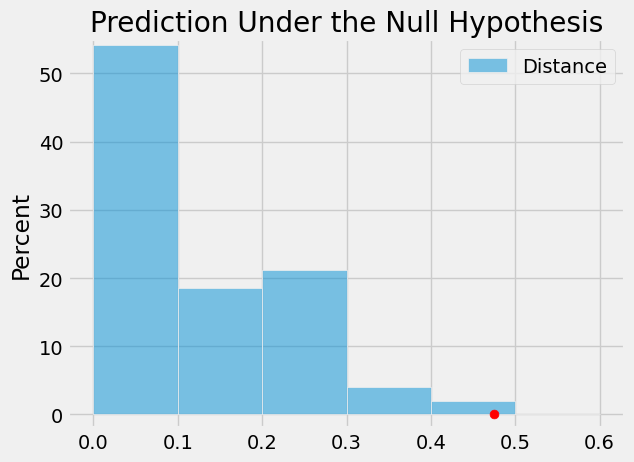

In [168]:
seaborn.histplot(data=pandas.DataFrame({'Distance': distances}),
                 bins = np.arange(0, 0.7, 0.1), stat='percent')
# Plotting parameters; you can ignore the code below
plots.ylim(-2, 55)
plots.scatter(observed_distance, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)

Pour trouver la valeur p empirique numériquement, nous devons trouver la proportion de statistiques simulées qui sont égales ou supérieures à la statistique observée.

In [169]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_p

0.00865

Il s'agit d'une petite valeur p. La statistique observée se trouve dans la queue de l'histogramme empirique de la statistique de test générée sous l'hypothèse nulle.

Le résultat est statistiquement significatif. Le test favorise l'hypothèse alternative par rapport à l'hypothèse nulle. Les données confirment l'hypothèse selon laquelle le traitement a un effet.

L'étude rapporte une valeur P de 0,009, soit 0,9 %, ce qui n'est pas loin de notre valeur empirique.

#### Causalité
Étant donné que les essais ont été randomisés, le test prouve que le traitement est *à l'origine* de la différence. L'affectation aléatoire des patients aux deux groupes garantit qu'il n'y a pas de variable confusionnelle susceptible d'affecter la conclusion de la causalité.

Si le traitement n'avait pas été attribué au hasard, notre test indiquerait toujours une *association* entre le traitement et l'évolution des douleurs dorsales chez nos 31 patients.  Mais attention : sans randomisation, cette association n'impliquerait pas que le traitement ait provoqué un changement dans les résultats des douleurs dorsales.  Par exemple, si les patients eux-mêmes avaient choisi d'administrer ou non le traitement, peut-être que les patients souffrant le plus de douleurs seraient plus susceptibles de choisir le traitement *et* plus susceptibles d'éprouver une certaine réduction de la douleur, même sans médicament.  La douleur préexistante serait alors un *facteur de confusion* dans l'analyse.

#### Une méta-analyse

Bien que l'essai contrôlé randomisé apporte la preuve que le traitement à la toxine botulique A a aidé les patients, une étude portant sur 31 patients n'est pas suffisante pour établir l'efficacité d'un traitement médical. Cela n'est pas seulement dû à la petite taille de l'échantillon.  Les résultats présentés dans cette section sont valables pour les 31 patients de l'étude, mais nous nous intéressons en réalité à la population de *tous les patients possibles*.

En 2011, un groupe de chercheurs a réalisé une [méta-analyse] (https://www.ncbi.nlm.nih.gov/pubmed/21249702) des études sur le traitement. En d'autres termes, ils ont recensé toutes les études disponibles sur ces traitements de la lombalgie et ont résumé les résultats obtenus.

Plusieurs études ont été réalisées, mais peu d'entre elles ont pu être incluses d'une manière scientifiquement valable : 'Nous avons exclu les données de dix-neuf études en raison de l'absence de randomisation, de données incomplètes ou non publiées. Il ne restait plus que trois essais contrôlés randomisés, dont l'un est celui que nous avons étudié dans cette section. La méta-analyse lui a attribué l'évaluation la plus élevée parmi toutes les études (LBP signifie lombalgie) : 'Nous avons identifié trois études qui ont examiné les mérites de la BoNT pour la lombalgie, mais une seule présentait un faible risque de biais et évaluait des patients souffrant de lombalgie non spécifique (N = 31).'

En résumé, la méta-analyse conclut : 'Il existe des preuves de faible qualité que les injections de BoNT améliorent la douleur, la fonction ou les deux, mieux que les injections de solution saline, et des preuves de très faible qualité qu'elles sont meilleures que l'acupuncture ou les injections de stéroïdes. ...  Il est très probable que des recherches supplémentaires aient un impact important sur l'estimation de l'effet et sur la confiance que nous lui accordons. Les futurs essais devraient normaliser les populations de patients, les protocoles de traitement et les groupes de comparaison, recruter davantage de participants et inclure des résultats à long terme, une analyse coût-bénéfice et la pertinence clinique des résultats.

Il faut beaucoup de travail pour établir qu'un traitement médical a un effet bénéfique. Savoir analyser les essais contrôlés randomisés est un élément crucial de ce travail. Maintenant que vous savez le faire, vous êtes bien placé pour aider les professions médicales et autres à établir des relations de cause à effet.

### Deflategate
Le 18 janvier 2015, les Indianapolis Colts et les New England Patriots ont disputé le match de championnat de la Conférence de football américain (AFC) afin de déterminer laquelle de ces deux équipes participerait au Super Bowl. Après le match, des allégations ont été formulées selon lesquelles les ballons des Patriots n'avaient pas été gonflés autant que l'exigeait la réglementation ; ils étaient plus souples. Cela pourrait être un avantage, car les ballons plus souples pourraient être plus faciles à attraper.

Pendant plusieurs semaines, le monde du football américain a été envahi par les accusations, les démentis, les théories et les soupçons : la presse a qualifié le sujet de Deflategate, en référence au scandale politique du Watergate dans les années 1970. La National Football League (NFL) a commandé une analyse indépendante. Dans cet exemple, nous effectuerons notre propre analyse des données.

La pression est souvent mesurée en livres par pouce carré (psi). Les règles de la NFL stipulent que les ballons de jeu doivent être gonflés pour avoir une pression comprise entre 12,5 et 13,5 psi. Chaque équipe joue avec 12 ballons. Les équipes ont la responsabilité de maintenir la pression dans leurs propres ballons, mais les officiels du match inspectent les ballons. Avant le début du match de l'AFC, tous les ballons des Patriots étaient à une pression d'environ 12,5 psi. La plupart des ballons des Colts étaient à environ 13,0 psi. Toutefois, ces données d'avant-match n'ont pas été enregistrées.

Au cours du deuxième quart-temps, les Colts ont intercepté un ballon des Patriots. Sur la ligne de touche, ils ont mesuré la pression du ballon et ont déterminé qu'elle était inférieure au seuil de 12,5 psi. Ils en ont rapidement informé les officiels.

À la mi-temps, tous les ballons de jeu ont été ramassés pour être inspectés. Deux officiels, Clete Blakeman et Dyrol Prioleau, ont mesuré la pression dans chacun des ballons.

Voici les données. Chaque ligne correspond à un ballon. La pression est mesurée en psi. Le ballon des Patriots qui avait été intercepté par les Colts n'a pas été inspecté à la mi-temps. La plupart des ballons des Colts ne l'ont pas été non plus - les officiels ont simplement manqué de temps et ont dû céder les ballons pour le début de la seconde mi-temps.

In [170]:
football_initial = pandas.read_csv(path_data + '/deflategate.csv')
football_initial.head()

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45


Pour chacune des 15 balles inspectées, les deux fonctionnaires ont obtenu des résultats différents. Il n'est pas rare que des mesures répétées sur un même objet donnent des résultats différents, surtout lorsque les mesures sont effectuées par des personnes différentes. Nous attribuerons donc à chaque ballon la moyenne des deux mesures effectuées sur ce ballon.

In [171]:
football_initial['Combined'] = ((football_initial['Blakeman']+football_initial['Prioleau'])/2)
football = football_initial.drop(columns=['Blakeman', 'Prioleau'])
football.head()

,Team,Combined
0,Patriots,11.650
1,Patriots,11.025
2,Patriots,11.325
3,Patriots,10.850
4,Patriots,11.275


À première vue, il semble évident que les ballons des Patriots étaient à une pression inférieure à celle des ballons des Colts. Un certain dégonflement étant normal au cours d'un match, les analystes indépendants ont décidé de calculer la baisse de pression à partir du début du match. Rappelons que les ballons des Patriots avaient tous commencé à une pression d'environ 12,5 psi, et ceux des Colts à une pression d'environ 13,0 psi. Par conséquent, la baisse de pression pour les ballons des Patriots a été calculée comme suit : 12,5 moins la pression à la mi-temps, et la baisse de pression pour les ballons des Colts était de 13,0 moins la pression à la mi-temps.

Nous pouvons calculer la baisse de pression pour chaque ballon en commençant par créer un tableau des valeurs de départ. Pour cela, nous aurons besoin d'un tableau composé de 11 valeurs dont chacune vaut 12,5, et d'un autre tableau composé de quatre valeurs dont chacune vaut 13. Nous utiliserons la fonction NumPy `np.ones`, qui prend un nombre comme argument et renvoie un tableau de ce nombre d'éléments, dont chacun vaut 1.

In [172]:
np.ones(11)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [173]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

La chute de pression pour chaque football est la différence entre la pression de départ et la mesure de la pression combinée.

In [174]:
drop = start - football['Combined']
football['Pressure Drop'] = drop
football.head()

,Team,Combined,Pressure Drop
0,Patriots,11.650,0.850
1,Patriots,11.025,1.475
2,Patriots,11.325,1.175
3,Patriots,10.850,1.650
4,Patriots,11.275,1.225


Il semble que les chutes des Patriots aient été plus importantes que celles des Colts. Regardons la baisse moyenne dans chacun des deux groupes. Nous n'avons plus besoin des scores combinés.

In [175]:
means = football.groupby('Team').agg(mean_pressure=('Pressure Drop', 'mean')).reset_index()
means

,Team,mean_pressure
0,Colts,0.468750
1,Patriots,1.202273


La baisse moyenne pour les Patriots était d'environ 1,2 psi contre 0,47 psi pour les Colts.

La question qui se pose maintenant est de savoir pourquoi les ballons des Patriots ont subi une baisse de pression plus importante, en moyenne, que les ballons des Colts. Serait-ce dû au hasard ?

#### Les hypothèses
Comment le hasard intervient-il ici ? Rien n'a été choisi au hasard. Mais nous pouvons créer un modèle de hasard en émettant l'hypothèse que les 11 drops des Patriots ressemblent à un échantillon aléatoire de 11 drops sur les 15, les drops des Colts étant les quatre restants. Il s'agit d'un modèle de hasard complètement spécifié dans le cadre duquel nous pouvons simuler des données. Il s'agit donc de l'**hypothèse nulle**.

Pour l'alternative, nous pouvons considérer que les drops des Patriots sont trop importants, en moyenne, pour ressembler à un échantillon aléatoire tiré de tous les drops.

#### Statistique de test
Une statistique naturelle est la différence entre les deux chutes moyennes, que nous calculerons comme 'chute moyenne pour les Patriots - chute moyenne pour les Colts'. Des valeurs élevées de cette statistique favoriseront l'hypothèse alternative.

In [176]:
observed_means =means['mean_pressure']

observed_difference = observed_means[1] - observed_means[0]
observed_difference

np.float64(0.733522727272728)

Cette différence positive reflète le fait que la baisse de pression moyenne des ballons des Patriots a été plus importante que celle des Colts.

Comme nous l'avons fait dans la section précédente, nous allons écrire une fonction pour calculer la différence entre les chutes moyennes dans les deux groupes. La fonction `différence_de_moyennes` prend deux arguments :

- le nom du tableau de données
- l'étiquette de la colonne contenant les étiquettes des deux groupes

Elle renvoie la différence entre les chutes moyennes des deux groupes. Nous calculerons la différence comme étant les baisses des Patriots moins les baisses des Colts, comme précédemment.

In [177]:
def difference_of_means(table, group_label):
    reduced = table[['Pressure Drop', group_label]]
    means_table = reduced.groupby(group_label).agg(mean_pressure=('Pressure Drop', 'mean')).reset_index()
    means = means_table['mean_pressure']
    return means[1] - means[0]

In [178]:
difference_of_means(football, 'Team')

np.float64(0.733522727272728)

C'est la même valeur que celle que nous avons trouvée plus tôt comme `différence_observée`.

#### Prévoir la statistique sous l'hypothèse nulle
Si l'hypothèse nulle était vraie, les ballons de football étiquetés Patriots et ceux étiquetés Colts n'auraient pas d'importance. Les distributions des deux ensembles de gouttes seraient identiques. Nous pouvons simuler cela en mélangeant au hasard les étiquettes des équipes.

In [179]:
shuffled_labels = football.sample(len(football))['Team'].reset_index(drop=True)
original_and_shuffled = football.assign(Shuffled_Label=shuffled_labels)
original_and_shuffled.head()

,Team,Combined,Pressure Drop,Shuffled_Label
0,Patriots,11.650,0.850,Patriots
1,Patriots,11.025,1.475,Patriots
2,Patriots,11.325,1.175,Colts
3,Patriots,10.850,1.650,Patriots
4,Patriots,11.275,1.225,Patriots


Comment se comparent les moyennes de tous les groupes ?

In [180]:
difference_of_means(original_and_shuffled, 'Shuffled_Label')

np.float64(0.4437500000000003)

In [181]:
difference_of_means(original_and_shuffled, 'Team')

np.float64(0.733522727272728)

Les valeurs moyennes de chute des deux équipes sont plus proches lorsque les étiquettes des équipes sont attribuées de manière aléatoire aux ballons qu'elles ne l'étaient pour les deux groupes effectivement utilisés dans le jeu.

#### Test de permutation
Il est temps de passer à une étape qui nous est désormais familière. Nous allons simuler à plusieurs reprises la statistique de test sous l'hypothèse nulle.

Nous simulerons la statistique du test sous l'hypothèse nulle en permutant plusieurs fois les ballons de football et en attribuant des ensembles aléatoires aux deux équipes.

Comme d'habitude, nous commencerons par écrire une fonction `one_simulated_difference` qui renvoie une valeur simulée de la différence entre les chutes de pression moyennes des groupes étiquetés Patriots et Colts après avoir permuté aléatoirement les étiquettes des équipes des ballons de football.

In [182]:
def one_simulated_difference():
    shuffled_labels = football.sample(len(football))['Team'].reset_index(drop=True)
    shuffled_table = football[['Pressure Drop']].assign(Shuffled_Label=shuffled_labels)
    return difference_of_means(shuffled_table, 'Shuffled_Label')   

Nous pouvons maintenant utiliser une boucle `for` et cette fonction pour créer un tableau `differences` qui contient 10 000 valeurs de la statistique de test simulée sous l'hypothèse nulle.

In [183]:
# /!\ Tourne pendant environ 1 min
differences = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

#### Conclusion du test
Pour calculer la valeur P empirique, il est important de rappeler l'hypothèse alternative, à savoir que les chutes des Patriots sont trop importantes pour être le résultat de la seule variation du hasard.

Des chutes plus importantes pour les Patriots favorisent l'hypothèse alternative. La valeur p est donc la probabilité (calculée sous l'hypothèse nulle) d'obtenir une statistique de test égale à notre valeur observée de 0,733522727272728 ou supérieure.

La figure ci-dessous illustre ce calcul. Il s'agit de la distribution empirique de la statistique de test sous l'hypothèse nulle, la statistique observée étant indiquée en rouge sur l'axe horizontal et la zone correspondant à la valeur p étant ombrée en doré.

Observed Difference: 0.733522727272728


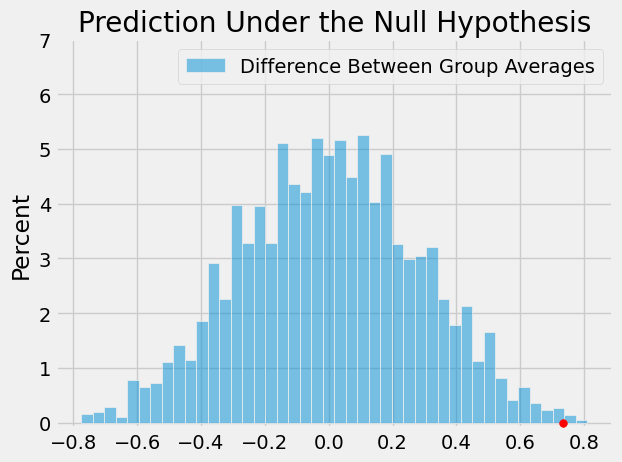

In [184]:
seaborn.histplot(data=pandas.DataFrame({'Difference Between Group Averages': differences}),
                 stat='percent')
plots.ylim(-0.1, 7)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

À l'œil, la valeur p semble assez faible. Nous pouvons le confirmer par un calcul.

In [185]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 10000
empirical_p

0.0032

Comme dans les exemples précédents de ce test, la majeure partie de la distribution est centrée autour de 0. Sous l'hypothèse nulle, les drops des Patriots sont un échantillon aléatoire de l'ensemble des 15 drops, et il en va de même pour ceux des Colts. Par conséquent, les deux séries de drops devraient être à peu près égales en moyenne, et leur différence devrait donc se situer autour de 0.

Mais la valeur observée de la statistique de test est très éloignée du cœur de la distribution. Selon tout seuil raisonnable de ce qui est 'petit', la valeur P empirique est petite. Nous finissons donc par rejeter l'hypothèse nulle du hasard et concluons que les baisses enregistrées par les Patriots étaient trop importantes pour refléter uniquement des variations dues au hasard.

L'équipe d'enquête indépendante a analysé les données de plusieurs manières différentes, en tenant compte des lois de la physique. Le rapport final indique ce qui suit,

> '[L]a chute de pression moyenne des ballons de jeu des Patriots a dépassé la chute de pression moyenne des ballons des Colts de 0,45 à 1,02 psi, en fonction de diverses hypothèses possibles concernant les jauges utilisées, et en supposant une pression initiale de 12,5 psi pour les ballons des Patriots et de 13,0 pour les ballons des Colts.'
>
> -- *Rapport d'enquête commandé par la NFL concernant le match de championnat de l'AFC du 18 janvier 2015*

Notre analyse montre une chute de pression moyenne d'environ 0,73 psi, ce qui est proche du centre de l'intervalle '0,45 à 1,02 psi' et donc cohérent avec l'analyse officielle.

N'oubliez pas que notre test d'hypothèses n'établit pas la raison pour laquelle la différence n'est pas due au hasard. L'établissement de la causalité est généralement plus complexe que l'exécution d'un test d'hypothèses.

Mais la question la plus importante dans le monde du football concernait le lien de causalité : il s'agissait de savoir si la baisse excessive de la pression dans les ballons des Patriots était délibérée. Si vous êtes curieux de connaître la réponse donnée par les enquêteurs, voici le [rapport complet] (https://nfllabor.files.wordpress.com/2015/05/investigative-and-expert-reports-re-footballs-used-during-afc-championsh.pdf).

# Crédits

Ce cours est inspiré du cours data8 donné à UC Berkeley et en ré-utilise avec certaines modifications une partie des matériaux (ces matériaux sont généreusement mis à disposition publiquement sous licence Creative Commons avec attribution, consultez [https://www.data8.org](https://www.data8.org) pour plus d'informations.